# Paper Visualizations

This notebook generates publication-ready visualizations for the research paper.

**Input Files:**
- `data/results/phase1_openjij_parameters.xlsx` - QUBO parameter optimization results
- `data/results/phase2_openjij_parameters.xlsx` - OpenJij annealing parameter optimization results
- `data/results/pipeline_experiment_results.csv` - Importance metrics comparison results

## Setup: Imports and Configuration

In [1]:
# Add project root to Python path
import sys
from pathlib import Path

project_root = Path.cwd().parent.parent
sys.path.insert(0, str(project_root))

print(f"✓ Project root: {project_root}")

✓ Project root: c:\Users\AUC\Desktop\Thesis\Quantum-Optimization-In-AP-Selection


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set global scale factor for all plot elements
SCALE_FACTOR = 1.8  # Adjust this to scale all elements (e.g., 1.5 = 150%, 2.0 = 200%)

# Set publication-quality plotting defaults
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = int(12 * SCALE_FACTOR)
plt.rcParams['axes.linewidth'] = 2 * SCALE_FACTOR
plt.rcParams['lines.linewidth'] = 3 * SCALE_FACTOR
plt.rcParams['lines.markersize'] = 8 * SCALE_FACTOR
plt.rcParams['xtick.major.width'] = 2 * SCALE_FACTOR
plt.rcParams['ytick.major.width'] = 2 * SCALE_FACTOR
plt.rcParams['xtick.major.size'] = 6 * SCALE_FACTOR
plt.rcParams['ytick.major.size'] = 6 * SCALE_FACTOR
plt.rcParams['grid.linewidth'] = 1.5 * SCALE_FACTOR
plt.rcParams['legend.fontsize'] = int(11 * SCALE_FACTOR)
plt.rcParams['axes.labelsize'] = int(13 * SCALE_FACTOR)
plt.rcParams['axes.titlesize'] = int(14 * SCALE_FACTOR)

sns.set_style('whitegrid')

print("✓ All libraries imported successfully")
print(f"✓ Publication-quality plotting configured (DPI=300, Scale={SCALE_FACTOR}x)")

✓ All libraries imported successfully
✓ Publication-quality plotting configured (DPI=300, Scale=1.8x)


## Load Data

In [3]:
# Define paths
results_dir = project_root / 'data' / 'results'
phase1_file = results_dir / 'phase1_openjij_parameters.xlsx'
phase2_file = results_dir / 'phase2_openjij_parameters.xlsx'
pipeline_file = results_dir / 'pipeline_experiment_results.csv'
output_dir = results_dir / 'visualizations' / 'paper'
output_dir.mkdir(parents=True, exist_ok=True)

print("Loading benchmark results...")

# Load Phase 1 results
if not phase1_file.exists():
    raise FileNotFoundError(f"Phase 1 file not found: {phase1_file}")
phase1_df = pd.read_excel(phase1_file)
print(f"✓ Loaded Phase 1 results: {len(phase1_df)} configurations")

# Load Phase 2 results
if not phase2_file.exists():
    raise FileNotFoundError(f"Phase 2 file not found: {phase2_file}")
phase2_df = pd.read_excel(phase2_file)
print(f"✓ Loaded Phase 2 results: {len(phase2_df)} configurations")

# Load importance metrics comparison results
if not pipeline_file.exists():
    raise FileNotFoundError(f"Pipeline results file not found: {pipeline_file}")
pipeline_df = pd.read_csv(pipeline_file)
print(f"✓ Loaded pipeline results: {len(pipeline_df)} configurations")

print(f"\n✓ Output directory: {output_dir}")

Loading benchmark results...
✓ Loaded Phase 1 results: 96 configurations
✓ Loaded Phase 2 results: 144 configurations
✓ Loaded pipeline results: 4 configurations

✓ Output directory: c:\Users\AUC\Desktop\Thesis\Quantum-Optimization-In-AP-Selection\data\results\visualizations\paper


In [4]:
# ============================================================================
# DATA QUALITY REPORT AND SUMMARY STATISTICS
# ============================================================================

print("\n" + "="*80)
print("DATA QUALITY REPORT")
print("="*80)

# Phase 1 Summary
print("\n--- PHASE 1: QUBO PARAMETERS ---")
print(f"Configurations: {len(phase1_df)}")
print(f"Missing values:\n{phase1_df.isnull().sum()}")
print(f"\nPerformance Metrics:")
print(f"  Mean 3D Error: {phase1_df['mean_3d_error_m'].min():.2f}m (best) to {phase1_df['mean_3d_error_m'].max():.2f}m (worst)")
print(f"  Floor Accuracy: {phase1_df['floor_accuracy_0'].min():.2%} to {phase1_df['floor_accuracy_0'].max():.2%}")
print(f"\nBest configuration:")
best_phase1 = phase1_df.sort_values('mean_3d_error_m').iloc[0]
print(f"  k={int(best_phase1['k'])}, alpha={best_phase1['alpha']}, penalty={best_phase1['penalty']}")
print(f"  Mean Error: {best_phase1['mean_3d_error_m']:.2f}m")
print(f"  Floor Accuracy: {best_phase1['floor_accuracy_0']:.2%}")



print("\n" + "="*80)


DATA QUALITY REPORT

--- PHASE 1: QUBO PARAMETERS ---
Configurations: 96
Missing values:
k                    0
alpha                0
penalty              0
num_aps_selected     0
qubo_time_s          0
mean_3d_error_m      0
median_3d_error_m    0
floor_accuracy_0     0
floor_accuracy_1     0
floor_accuracy_2     0
dtype: int64

Performance Metrics:
  Mean 3D Error: 13.16m (best) to 27.58m (worst)
  Floor Accuracy: 51.14% to 83.06%

Best configuration:
  k=20, alpha=0.9, penalty=1.5
  Mean Error: 13.16m
  Floor Accuracy: 65.47%



In [5]:
# Phase 2 Summary
print("\n--- PHASE 2: OPENJIJ PARAMETERS ---")
print(f"Configurations (finite TTS): {len(phase2_finite)}")
print(f"Configurations (infinite TTS): {len(phase2_df) - len(phase2_finite)}")
print(f"\nPerformance Metrics:")
print(f"  TTS: {phase2_finite['tts_s'].min():.4f}s (best) to {phase2_finite['tts_s'].max():.4f}s (worst)")
print(f"  Success Rate: {phase2_finite['success_rate'].min():.2%} to {phase2_finite['success_rate'].max():.2%}")
print(f"  Mean 3D Error: {phase2_finite['mean_3d_error_m'].min():.2f}m to {phase2_finite['mean_3d_error_m'].max():.2f}m")
print(f"\nBest configuration (by TTS):")
best_phase2 = phase2_finite.sort_values('tts_s').iloc[0]
print(f"  sweeps={int(best_phase2['num_sweeps'])}, reads={int(best_phase2['num_reads'])}, beta={best_phase2['beta']}, gamma={best_phase2['gamma']}")
print(f"  TTS: {best_phase2['tts_s']:.4f}s, Success Rate: {best_phase2['success_rate']:.2%}")

# Importance Methods Summary
print("\n--- IMPORTANCE METHODS COMPARISON ---")
print(k20_df[['Importance_Method', 'Median_3D_Error_m', 'Floor_Accuracy_Exact_Pct']].to_string(index=False))
print(f"\nBest method (by Median Error): {k20_df.sort_values('Median_3D_Error_m').iloc[0]['Importance_Method']}")
print(f"Best method (by Floor Accuracy): {k20_df.sort_values('Floor_Accuracy_Exact_Pct', ascending=False).iloc[0]['Importance_Method']}")


--- PHASE 2: OPENJIJ PARAMETERS ---


NameError: name 'phase2_finite' is not defined

In [6]:
# ============================================================================
# DATA PREPROCESSING
# ============================================================================

# 1. Filter Phase 2 data to include only configurations with finite TTS
print("\nFiltering Phase 2 data...")
phase2_finite = phase2_df[np.isfinite(phase2_df['tts_s'])].copy()
print(f"  Filtered rows: {len(phase2_finite)}")
print(f"  Removed rows with infinite TTS: {len(phase2_df) - len(phase2_finite)}")
print(f"  TTS range: {phase2_finite['tts_s'].min():.4f}s to {phase2_finite['tts_s'].max():.4f}s")

# 2. Filter pipeline data for k=20 only
print("\nPipeline: Filtering for k=20 configurations...")
k20_df = pipeline_df.copy()

# Filter to only show Entropy, Variance, Max, and Average
selected_methods = ['Entropy', 'Variance', 'Max', 'Average']
print(f"  Filtered methods: {k20_df['Importance_Method'].tolist()}")

# Convert to percentages
k20_df['Floor_Accuracy_Exact_Pct'] = k20_df['Floor_Accuracy_0'] * 100
k20_df['Floor_Accuracy_Plus1_Pct'] = k20_df['Floor_Accuracy_1'] * 100

print("\n✓ Data preprocessing complete")


Filtering Phase 2 data...
  Filtered rows: 144
  Removed rows with infinite TTS: 0
  TTS range: 0.1471s to 305.4221s

Pipeline: Filtering for k=20 configurations...
  Filtered methods: ['ENTROPY', 'VARIANCE', 'MAX', 'AVERAGE']

✓ Data preprocessing complete


---
# Phase 1: QUBO Parameter Optimization


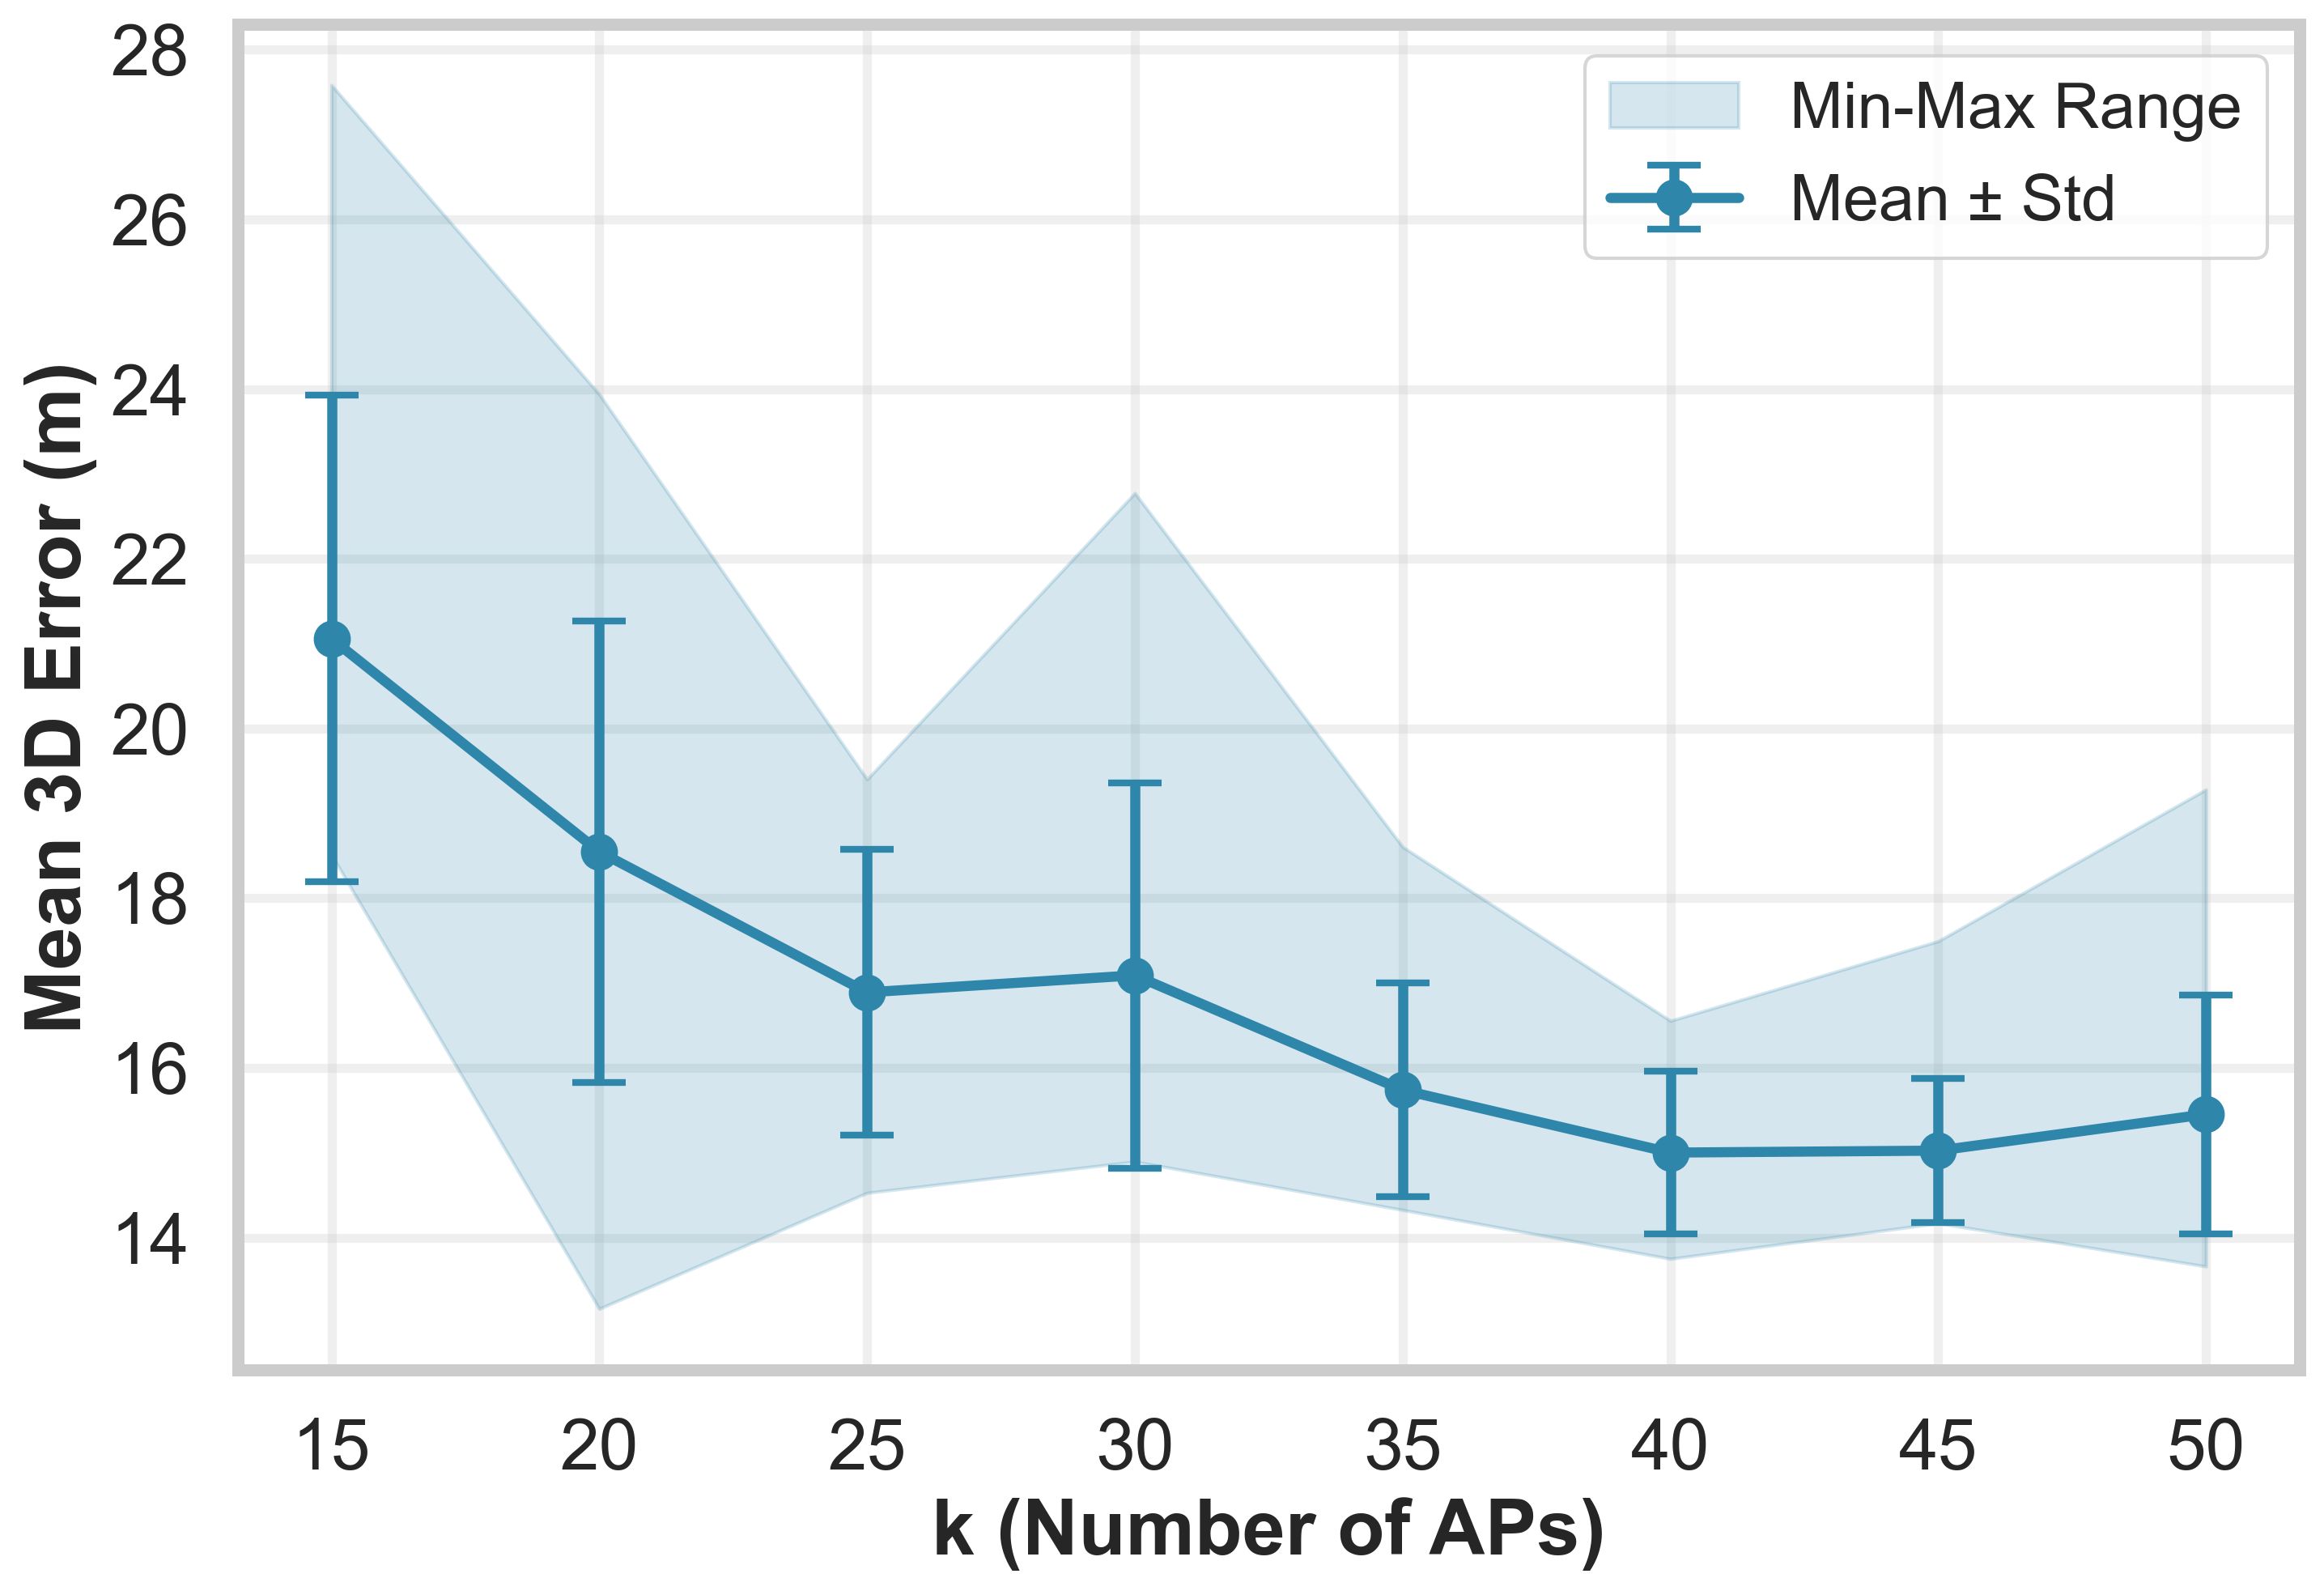

✓ Figure 1 saved: fig1_k_vs_error.png (with error bars)


In [7]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate with error bars (mean ± std) and min/max range
grouped = phase1_df.groupby('k').agg({
    'mean_3d_error_m': ['mean', 'std', 'min', 'max']
}).reset_index()
grouped.columns = ['k', 'mean', 'std', 'min', 'max']

# Plot with error bars
ax.errorbar(grouped['k'], grouped['mean'], yerr=grouped['std'],
            marker='o', linewidth=3, capsize=8, capthick=2, 
            color='#2E86AB', markersize=10, label='Mean ± Std')

# Add shaded region for min/max range
ax.fill_between(grouped['k'], grouped['min'], grouped['max'],
                alpha=0.2, color='#2E86AB', label='Min-Max Range')

ax.set_xlabel('k (Number of APs)', fontweight='bold')
ax.set_ylabel('Mean 3D Error (m)', fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'fig1_k_vs_error.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 1 saved: fig1_k_vs_error.png (with error bars)")

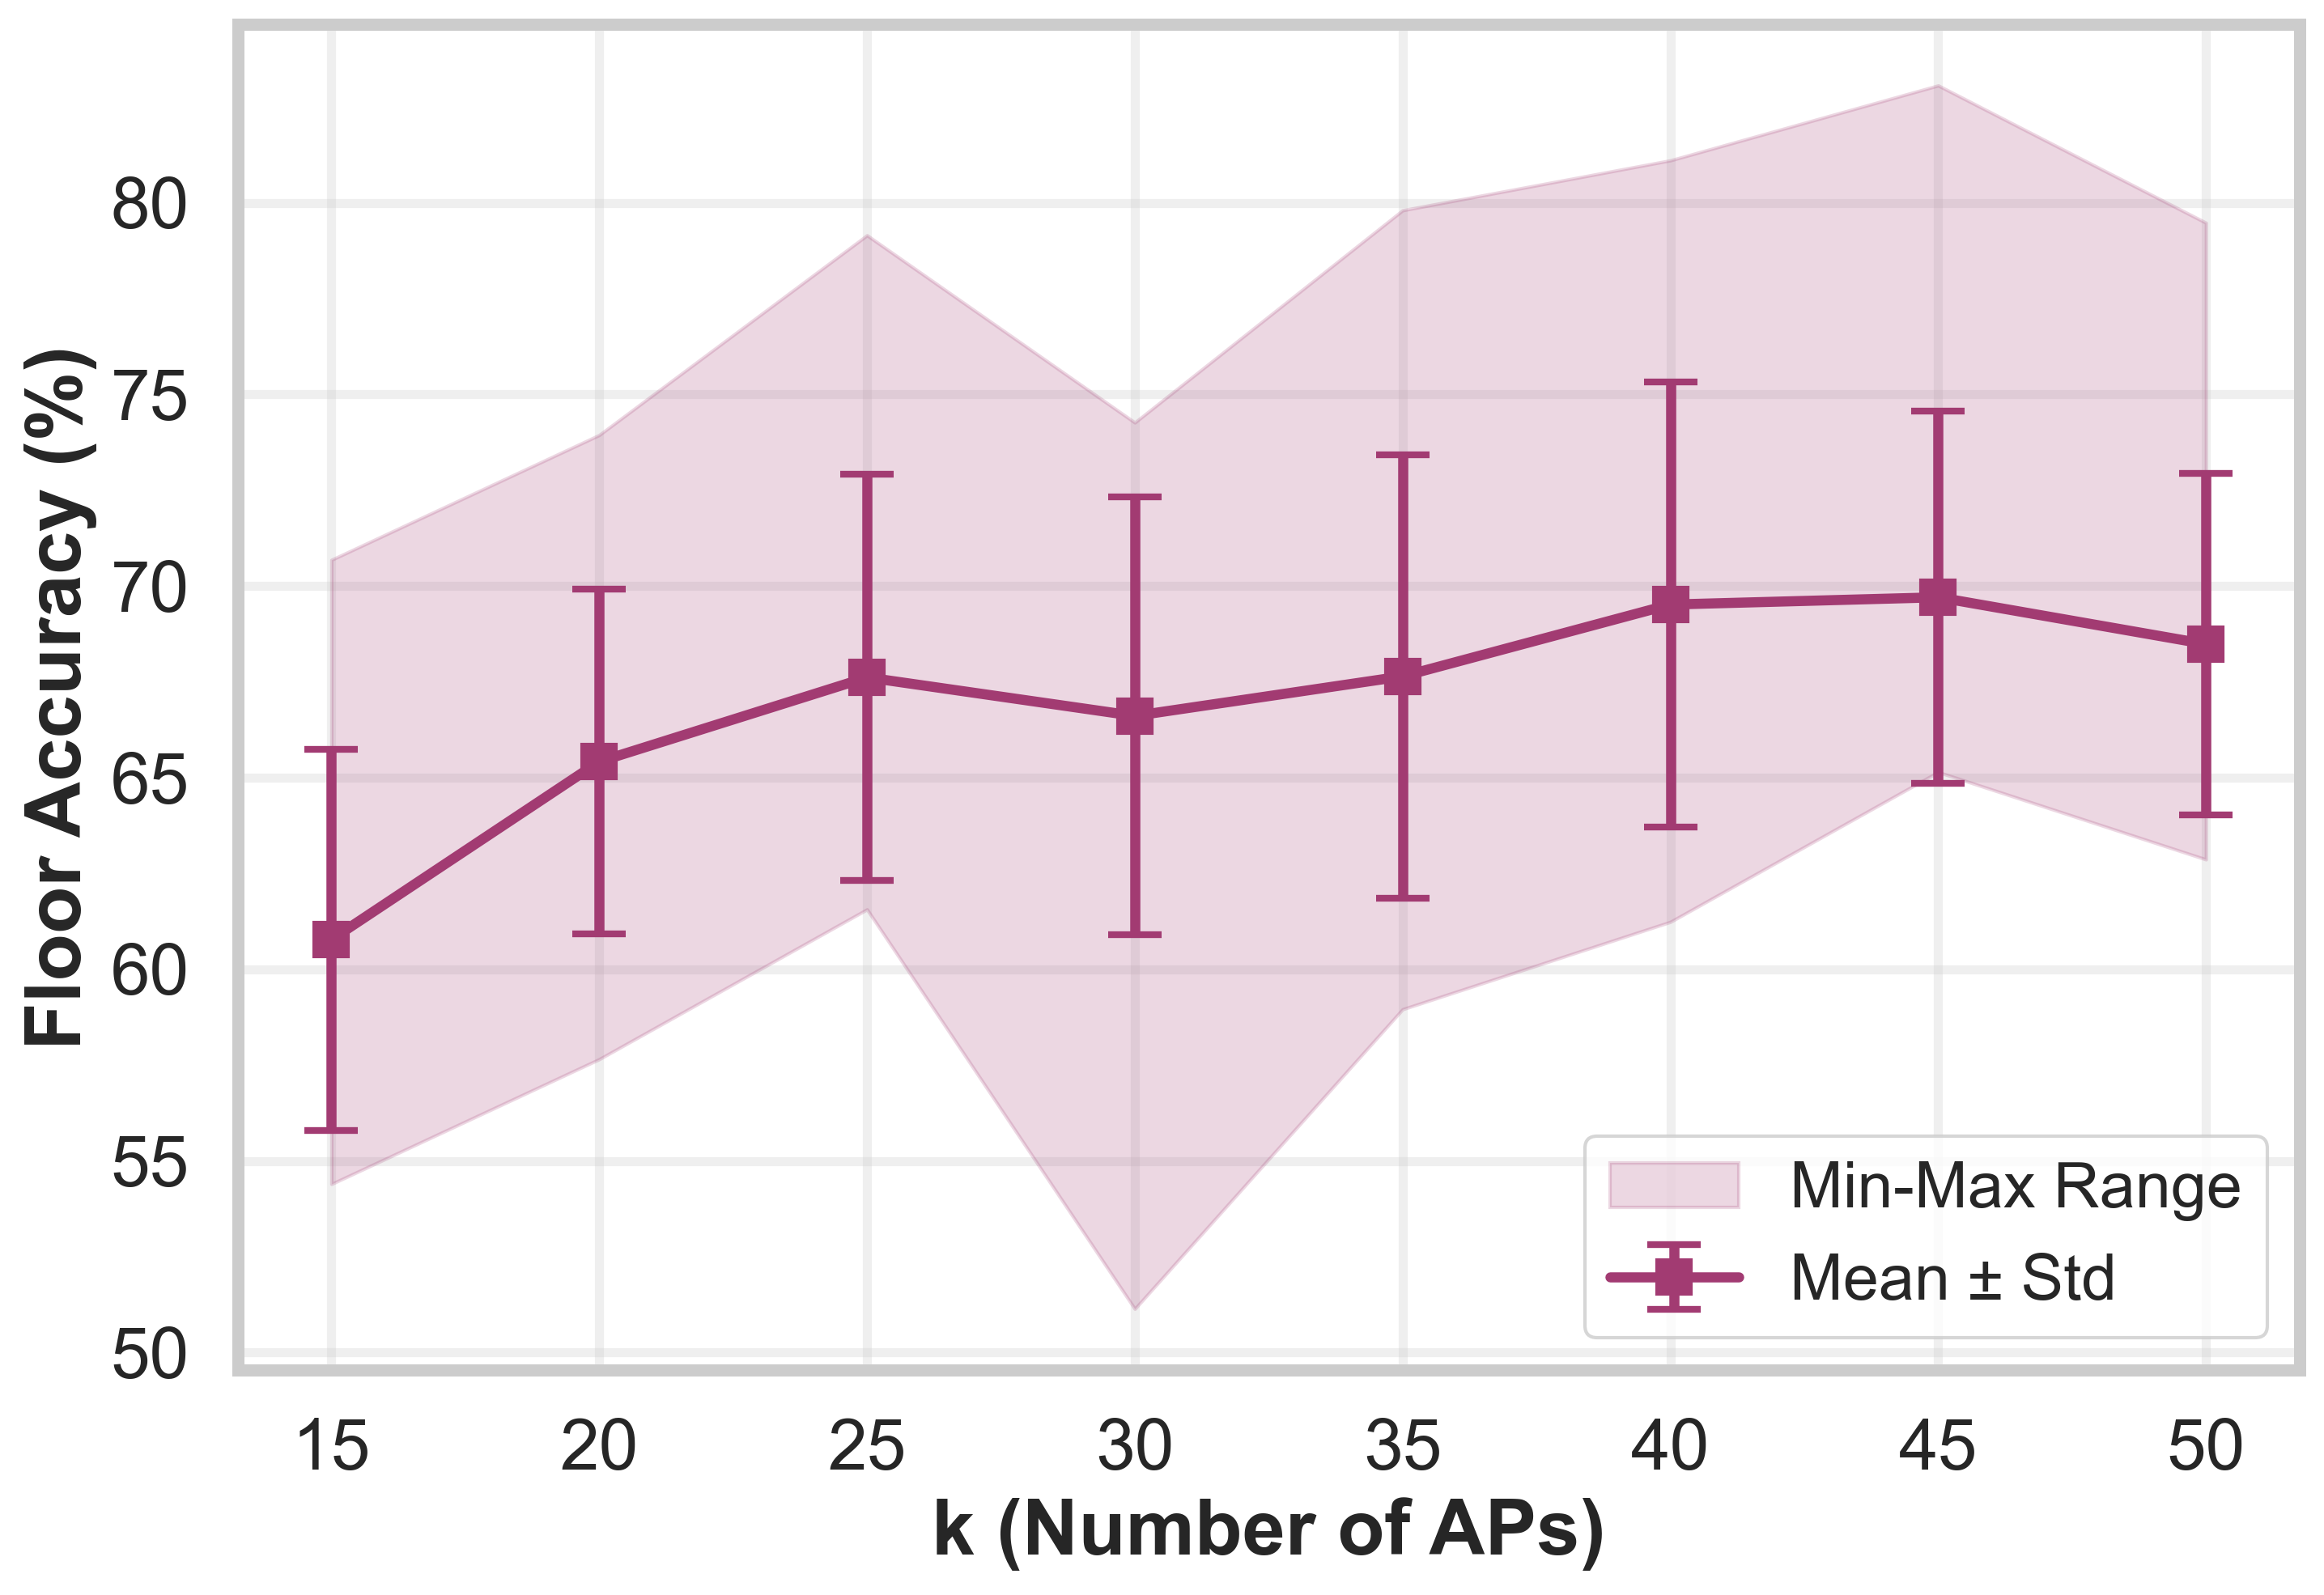

✓ Figure 2 saved: k_vs_floor_acc.png (with error bars)


In [8]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate with error bars
grouped = phase1_df.groupby('k').agg({
    'floor_accuracy_0': ['mean', 'std', 'min', 'max']
}).reset_index()
grouped.columns = ['k', 'mean', 'std', 'min', 'max']
grouped['mean_pct'] = grouped['mean'] * 100
grouped['std_pct'] = grouped['std'] * 100
grouped['min_pct'] = grouped['min'] * 100
grouped['max_pct'] = grouped['max'] * 100

# Plot with error bars
ax.errorbar(grouped['k'], grouped['mean_pct'], yerr=grouped['std_pct'],
            marker='s', linewidth=3, capsize=8, capthick=2, 
            color='#A23B72', markersize=10, label='Mean ± Std')

# Add shaded region for min/max range
ax.fill_between(grouped['k'], grouped['min_pct'], grouped['max_pct'],
                alpha=0.2, color='#A23B72', label='Min-Max Range')

ax.set_xlabel('k (Number of APs)', fontweight='bold')
ax.set_ylabel('Floor Accuracy (%)', fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'k_vs_floor_acc.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 2 saved: k_vs_floor_acc.png (with error bars)")

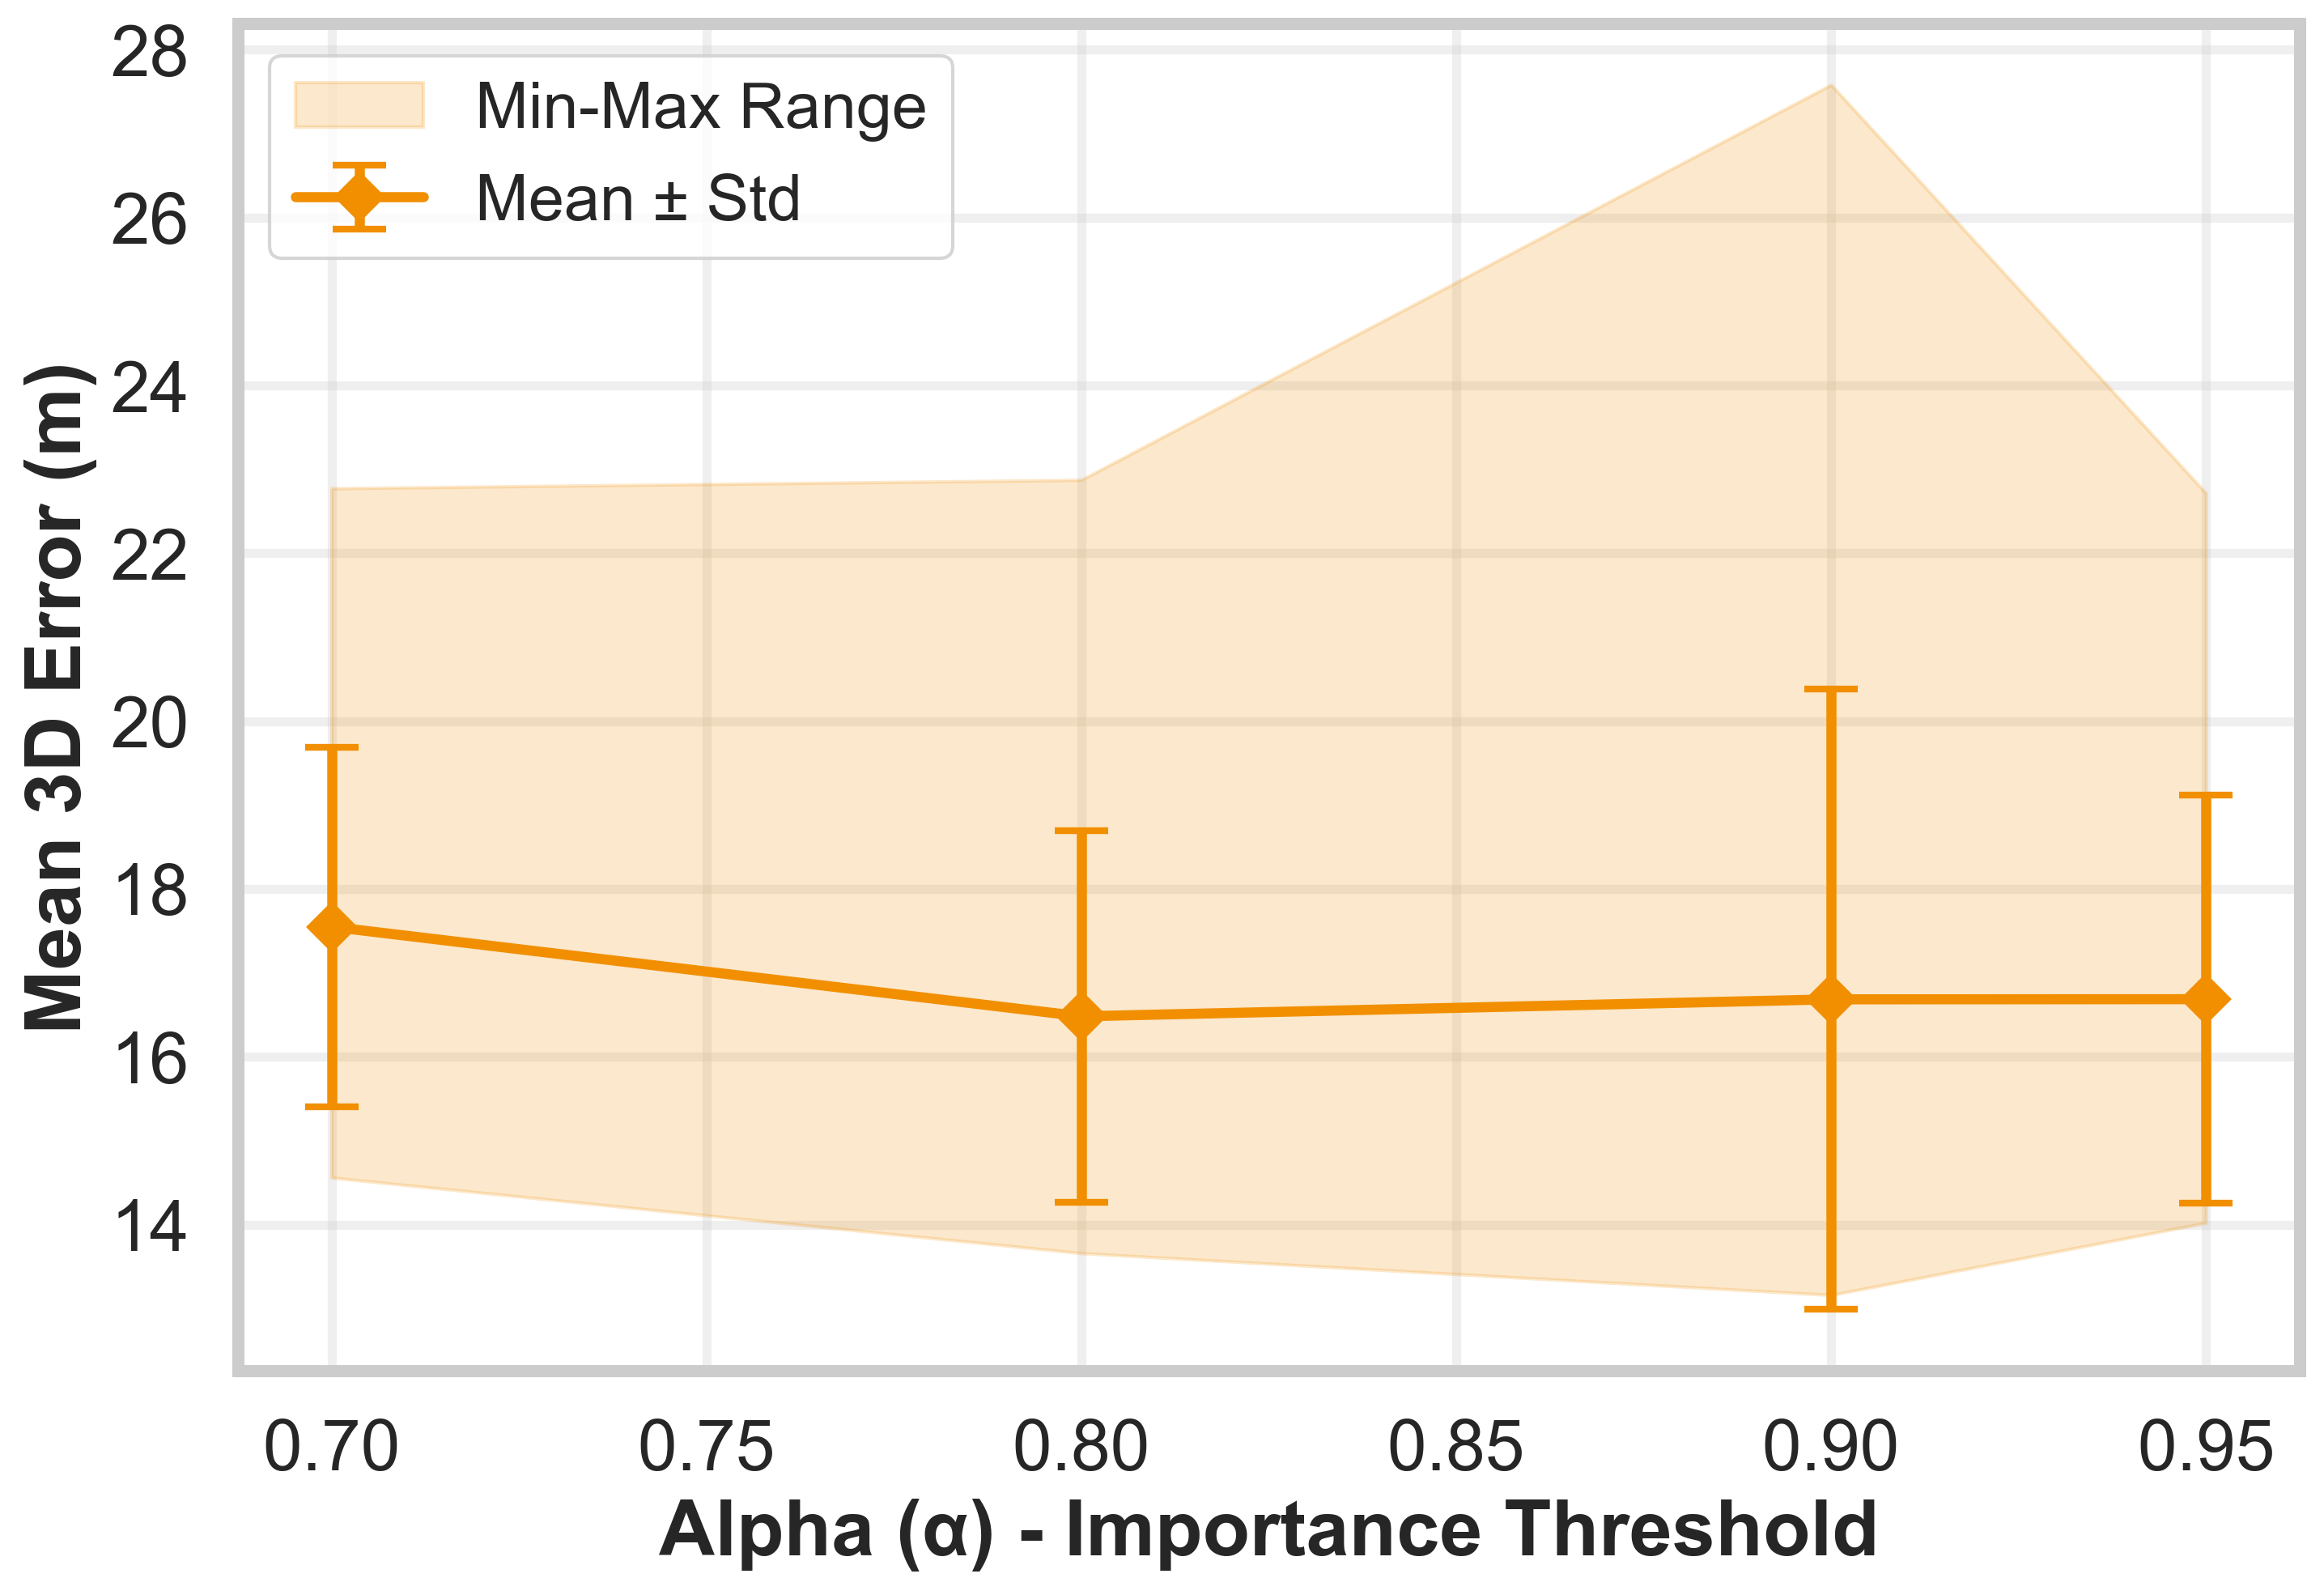

✓ Figure 3 saved: alpha_vs_error.png (with error bars)


In [23]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate with error bars
grouped = phase1_df.groupby('alpha').agg({
    'mean_3d_error_m': ['mean', 'std', 'min', 'max']
}).reset_index()
grouped.columns = ['alpha', 'mean', 'std', 'min', 'max']

# Plot with error bars
ax.errorbar(grouped['alpha'], grouped['mean'], yerr=grouped['std'],
            marker='D', linewidth=3, capsize=8, capthick=2, 
            color='#F18F01', markersize=10, label='Mean ± Std')

# Add shaded region for min/max range
ax.fill_between(grouped['alpha'], grouped['min'], grouped['max'],
                alpha=0.2, color='#F18F01', label='Min-Max Range')

ax.set_xlabel('Alpha (α) - Importance Threshold', fontweight='bold')
ax.set_ylabel('Mean 3D Error (m)', fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'alpha_vs_error.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 3 saved: alpha_vs_error.png (with error bars)")

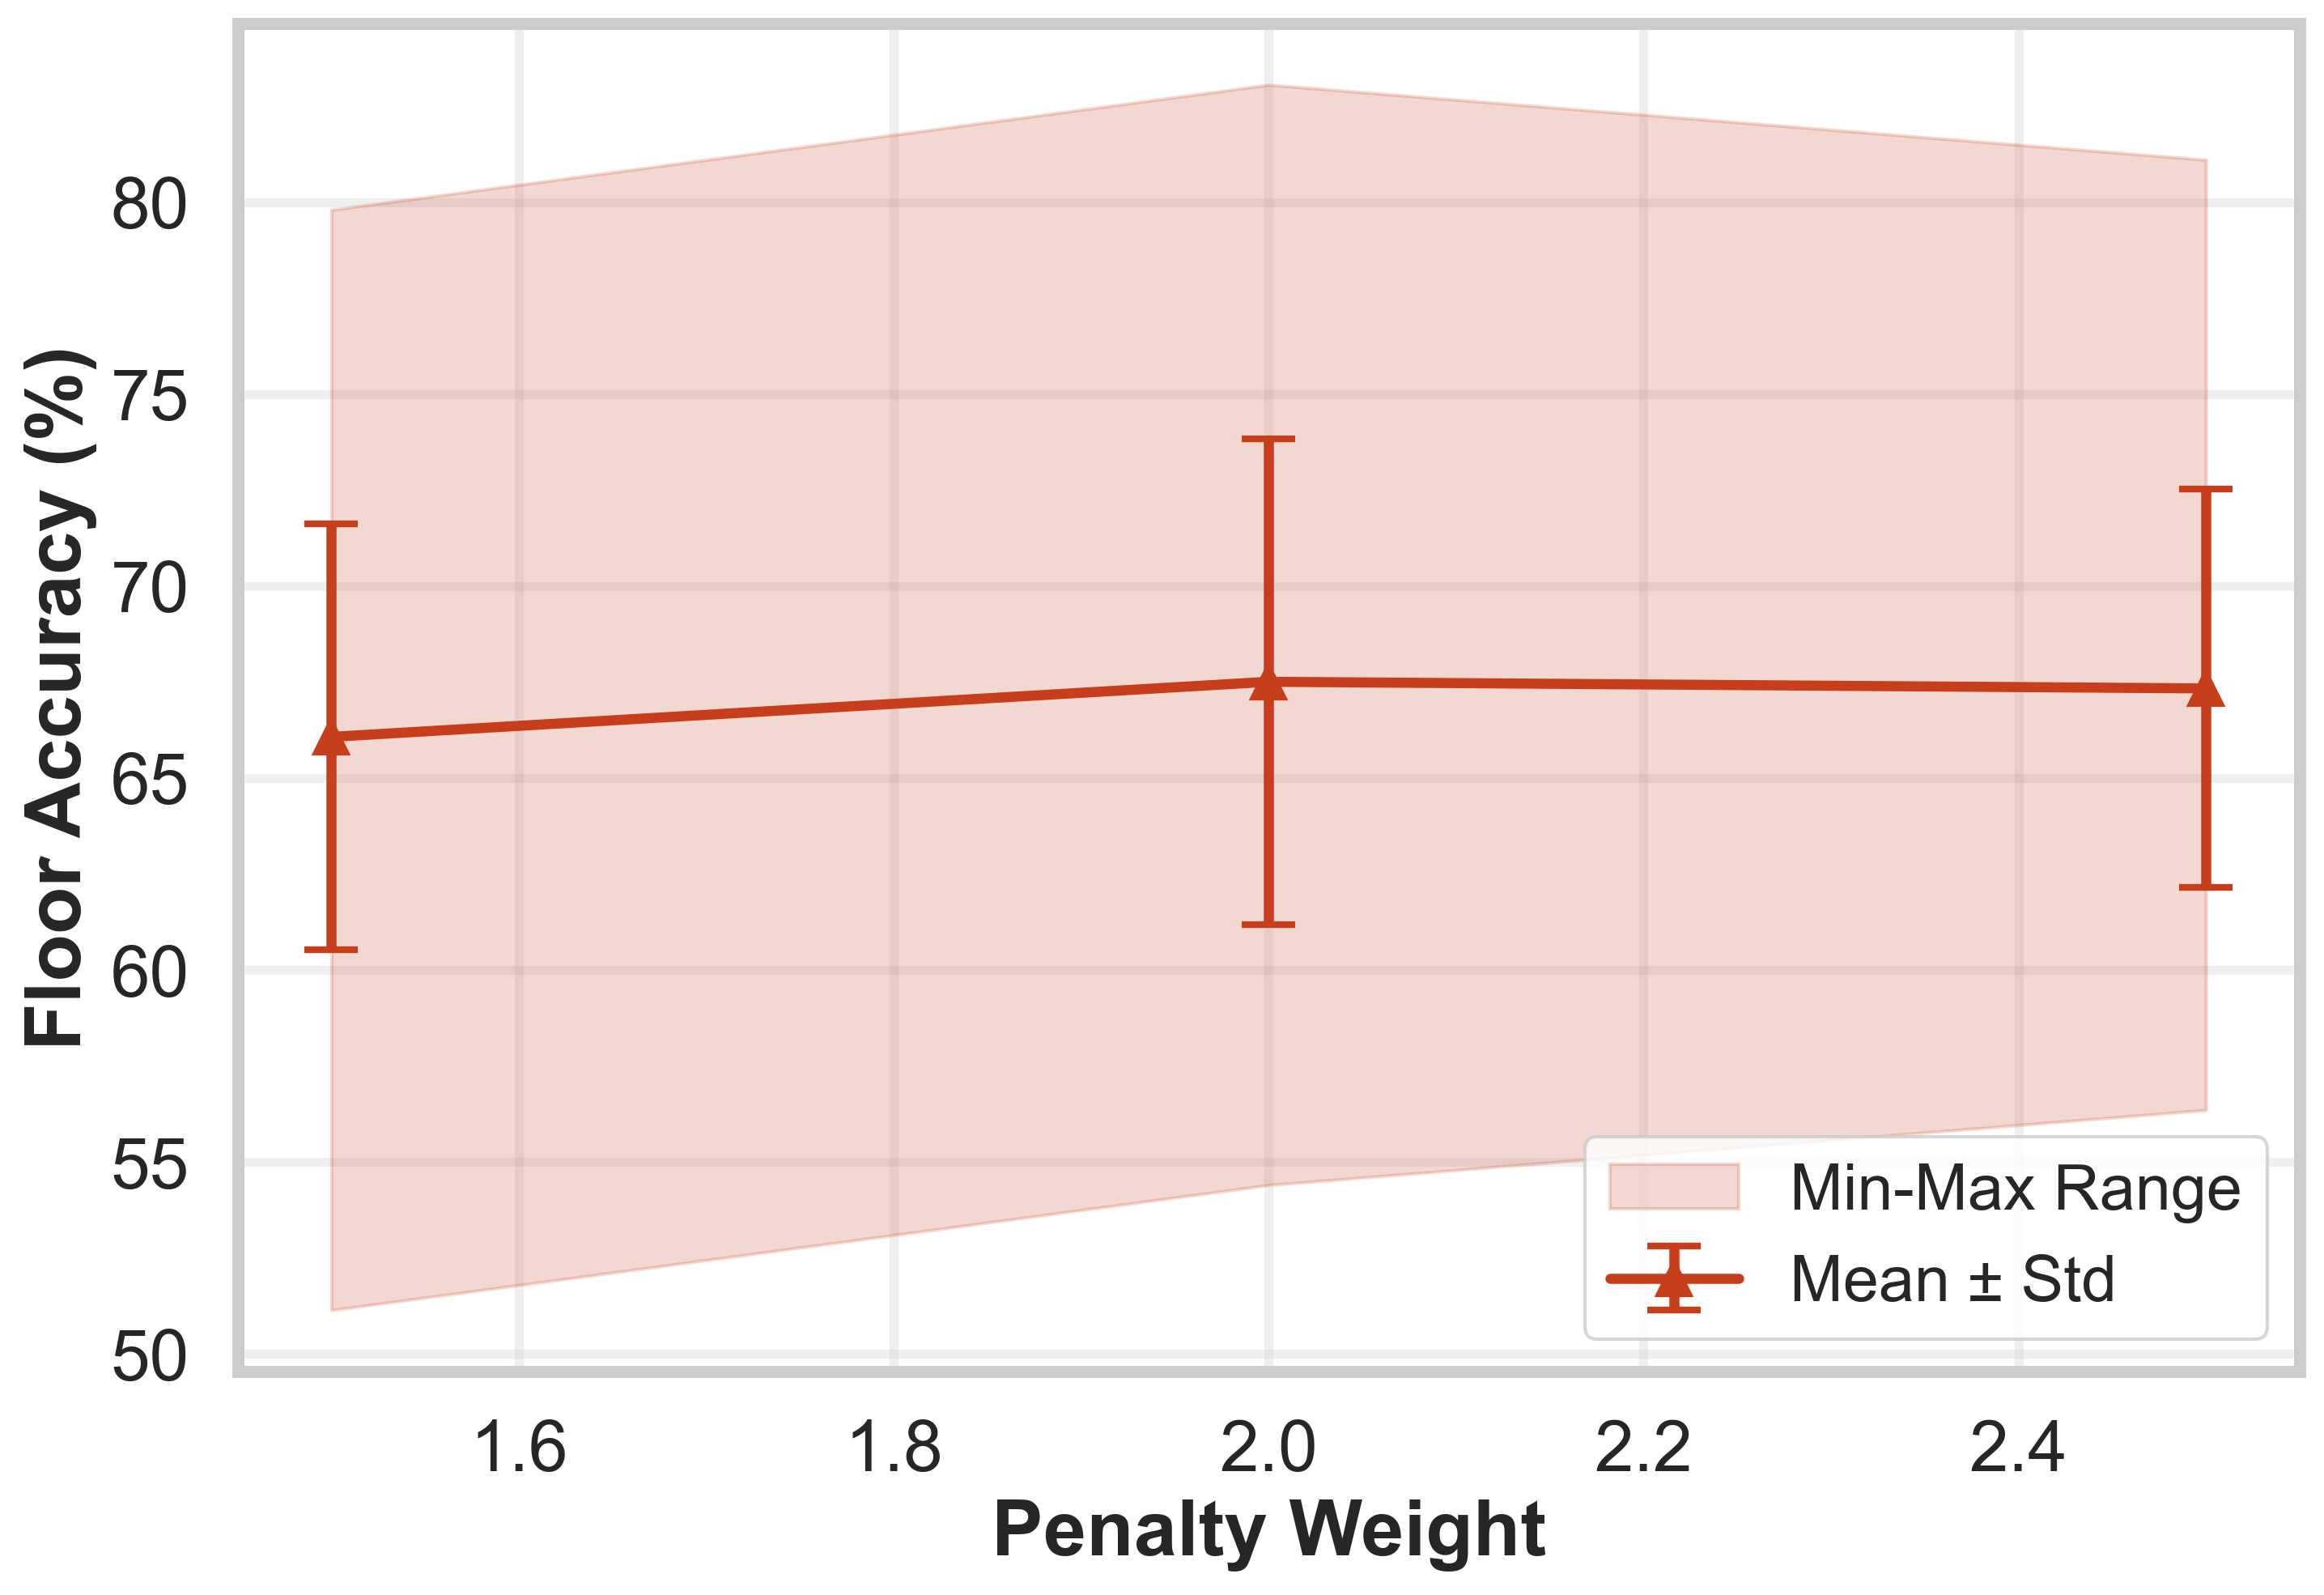

✓ Figure 4 saved: penalty_vs_floor_acc.png (with error bars)


In [10]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate with error bars
grouped = phase1_df.groupby('penalty').agg({
    'floor_accuracy_0': ['mean', 'std', 'min', 'max']
}).reset_index()
grouped.columns = ['penalty', 'mean', 'std', 'min', 'max']
grouped['mean_pct'] = grouped['mean'] * 100
grouped['std_pct'] = grouped['std'] * 100
grouped['min_pct'] = grouped['min'] * 100
grouped['max_pct'] = grouped['max'] * 100

# Plot with error bars
ax.errorbar(grouped['penalty'], grouped['mean_pct'], yerr=grouped['std_pct'],
            marker='^', linewidth=3, capsize=8, capthick=2, 
            color='#C73E1D', markersize=10, label='Mean ± Std')

# Add shaded region for min/max range
ax.fill_between(grouped['penalty'], grouped['min_pct'], grouped['max_pct'],
                alpha=0.2, color='#C73E1D', label='Min-Max Range')

ax.set_xlabel('Penalty Weight', fontweight='bold')
ax.set_ylabel('Floor Accuracy (%)', fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'penalty_vs_floor_acc.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 4 saved: penalty_vs_floor_acc.png (with error bars)")

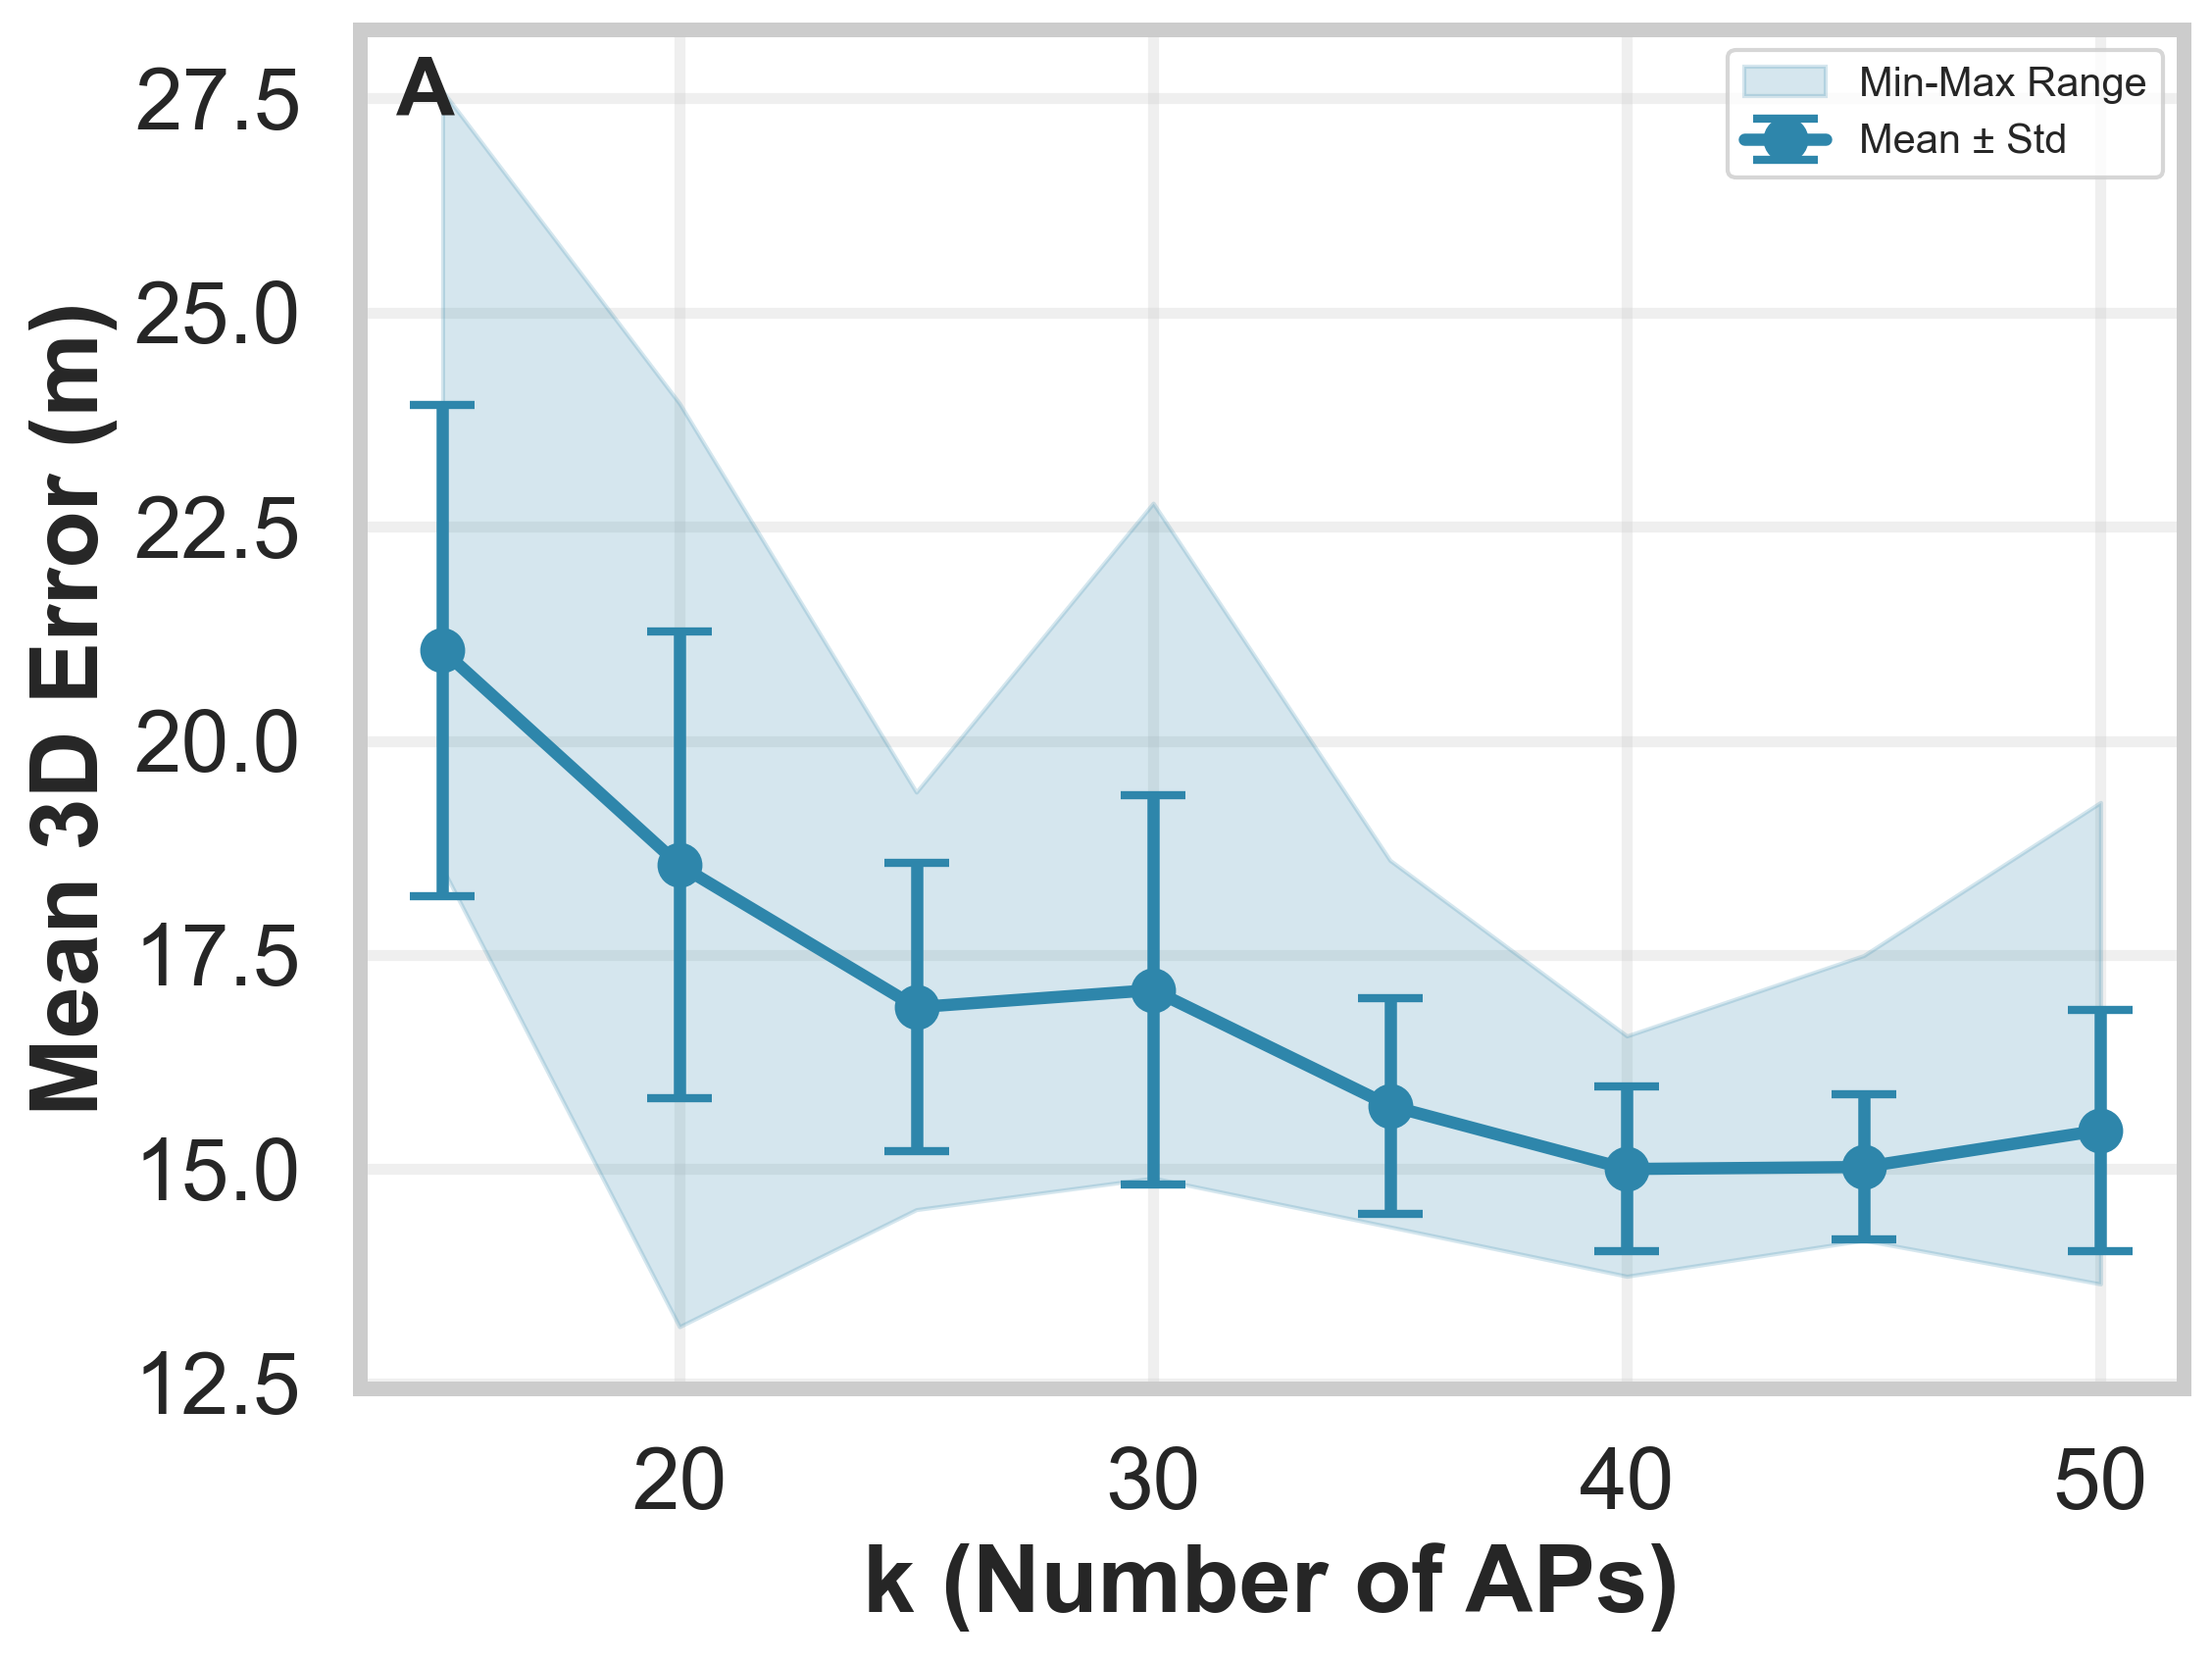

In [11]:
# Panel A: Error vs k
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

grouped = phase1_df.groupby('k').agg({
    'mean_3d_error_m': ['mean', 'std', 'min', 'max']
}).reset_index()
grouped.columns = ['k', 'mean', 'std', 'min', 'max']

ax1.errorbar(
    grouped['k'], grouped['mean'], 
    yerr=grouped['std'], marker='o',
    linewidth=3, capsize=8, capthick=2, 
    color='#2E86AB', markersize=10, label='Mean ± Std'
)

ax1.fill_between(
    grouped['k'], grouped['min'], grouped['max'],
    alpha=0.2, color='#2E86AB', label='Min-Max Range'
)

ax1.set_xlabel('k (Number of APs)', fontweight='bold')
ax1.set_ylabel('Mean 3D Error (m)', fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.text(0.02, 0.98, 'A', transform=ax1.transAxes,
         fontsize=20, fontweight='bold', va='top')

plt.savefig(output_dir / 'Error vs k.png', dpi=300, bbox_inches='tight')
plt.show()


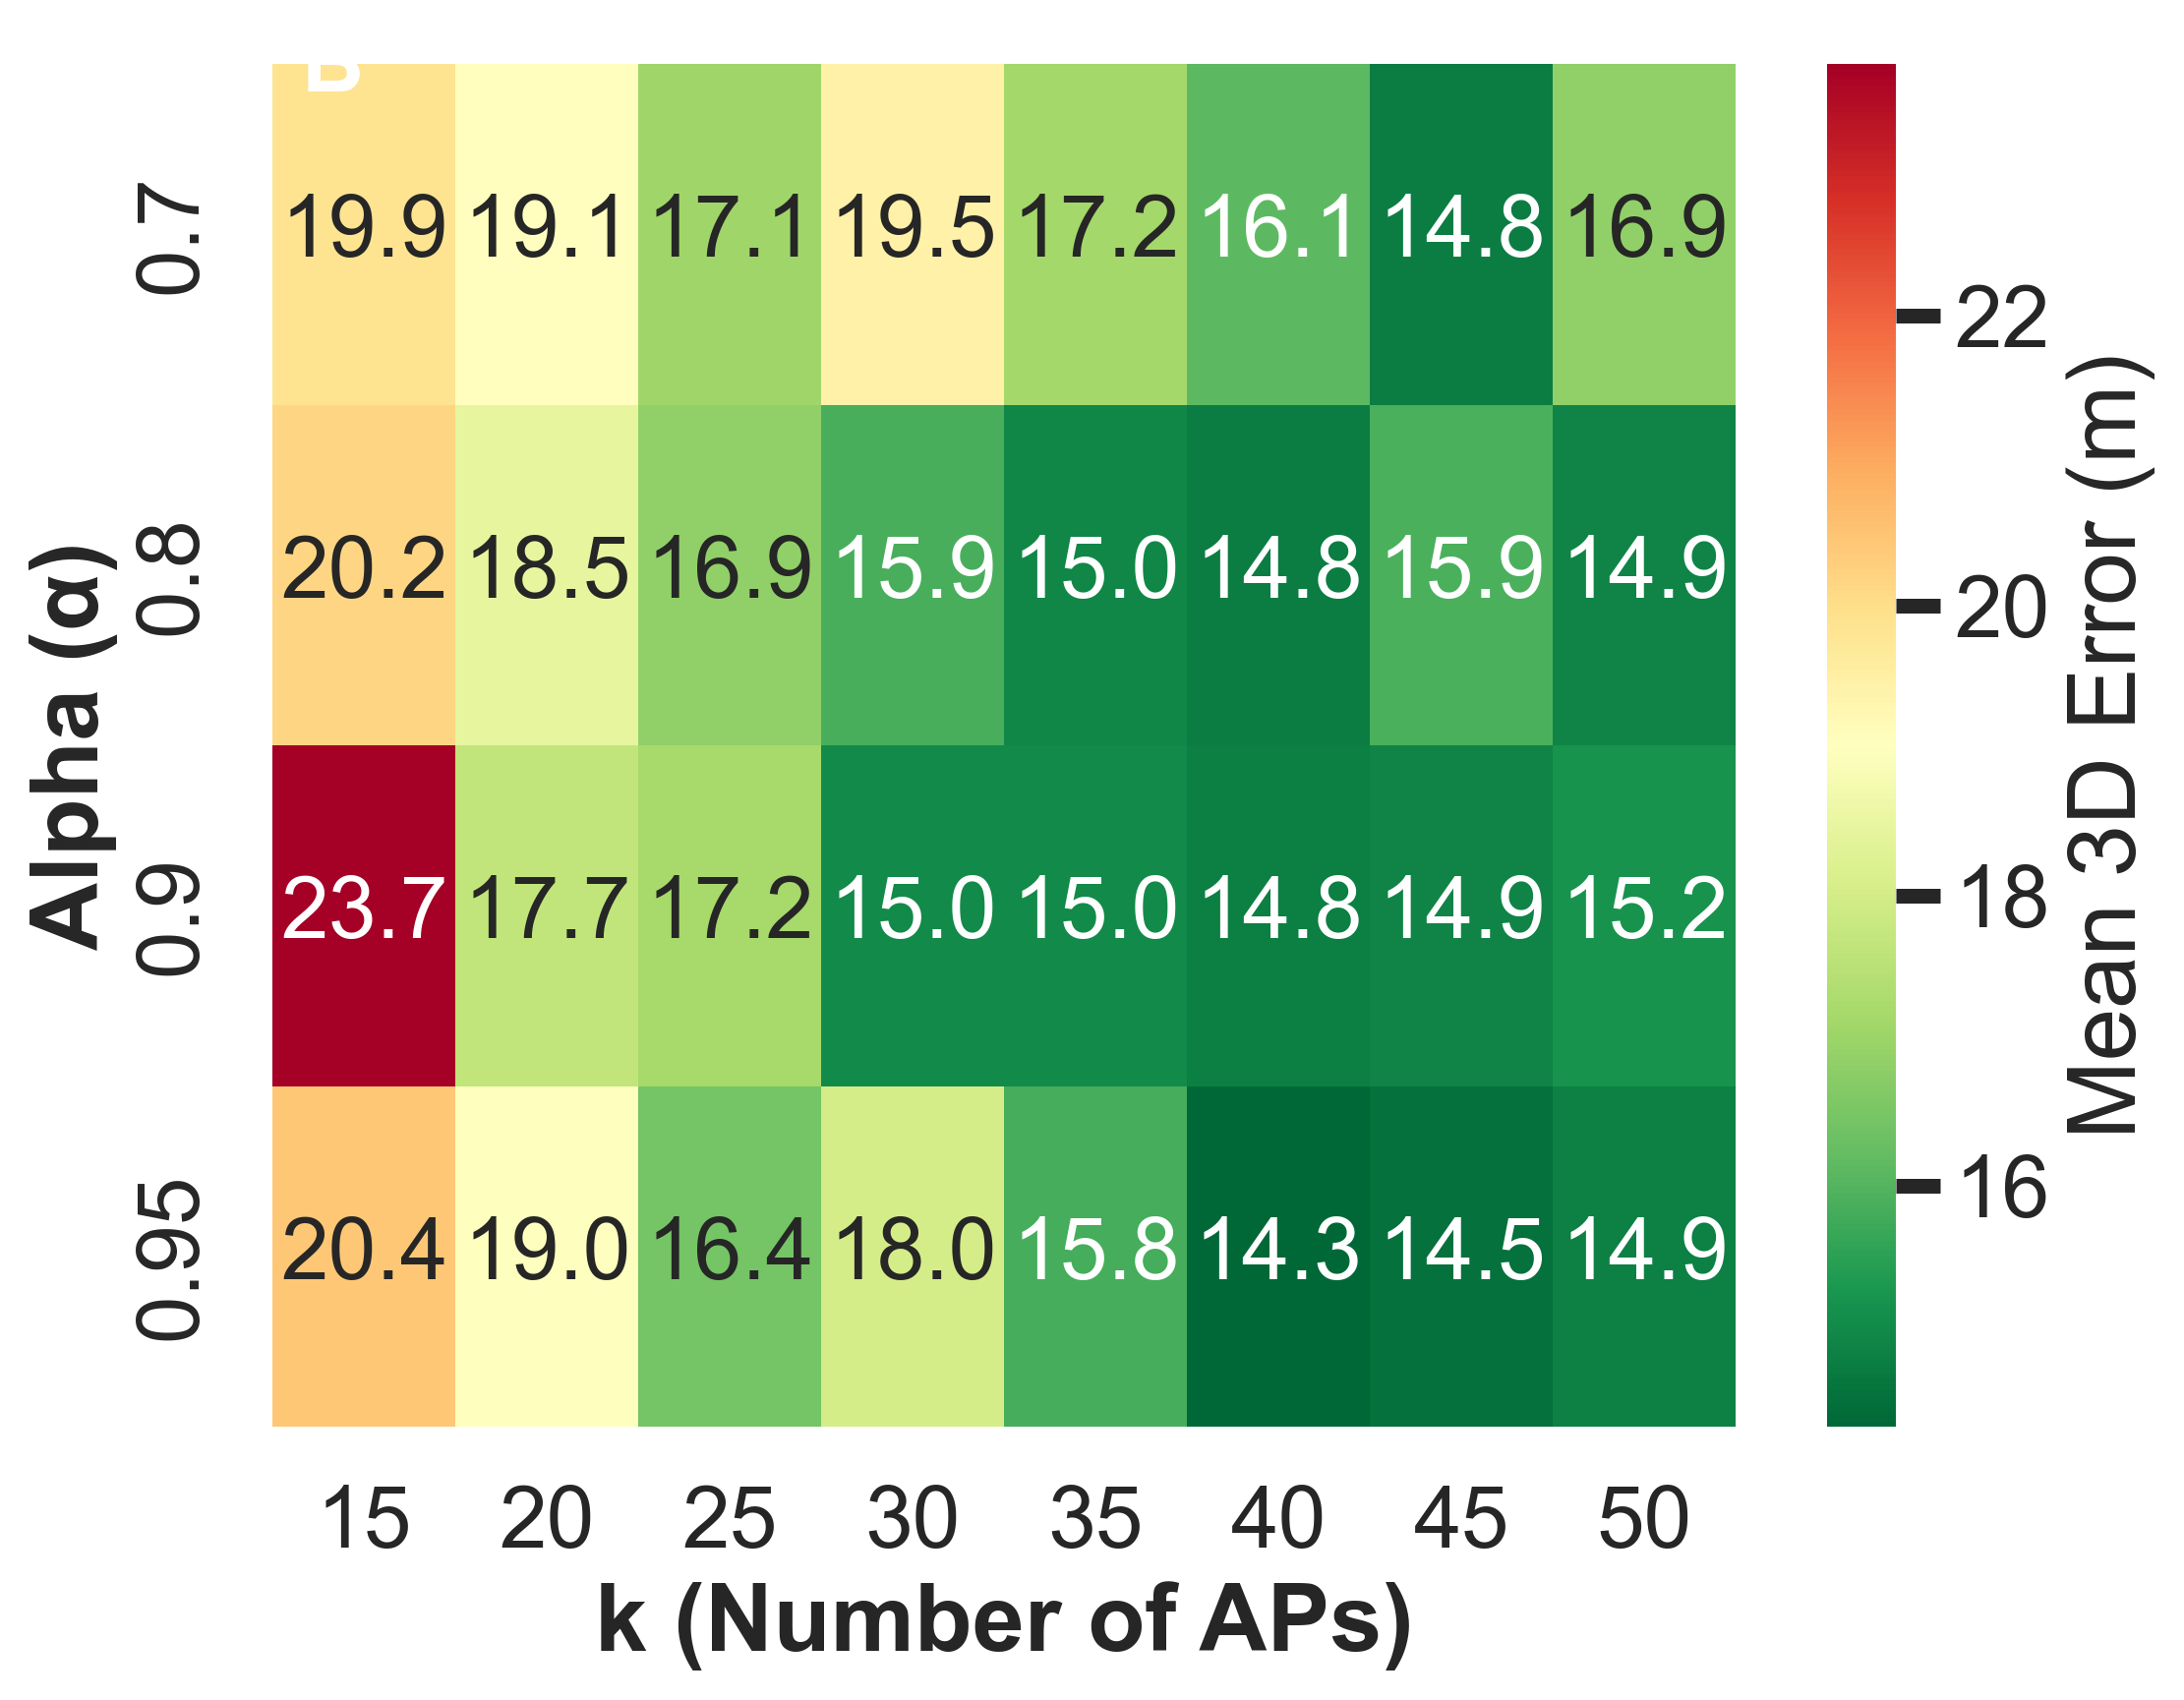

In [12]:
# Panel B: Heatmap k × α
fig = plt.figure(figsize=(8, 6))
ax2 = fig.add_subplot(111)

pivot = phase1_df.pivot_table(
    values='mean_3d_error_m', index='alpha', columns='k', aggfunc='mean'
)

sns.heatmap(
    pivot, annot=True, fmt='.1f', cmap='RdYlGn_r',
    ax=ax2, cbar_kws={'label': 'Mean 3D Error (m)'},
    vmin=pivot.min().min(), vmax=pivot.max().max()
)

ax2.set_xlabel('k (Number of APs)', fontweight='bold')
ax2.set_ylabel('Alpha (α)', fontweight='bold')

ax2.text(0.02, 0.98, 'B', transform=ax2.transAxes,
         fontweight='bold', color='white')

plt.savefig(output_dir / 'Error_vs_k_png', dpi=300, bbox_inches='tight')
plt.show()


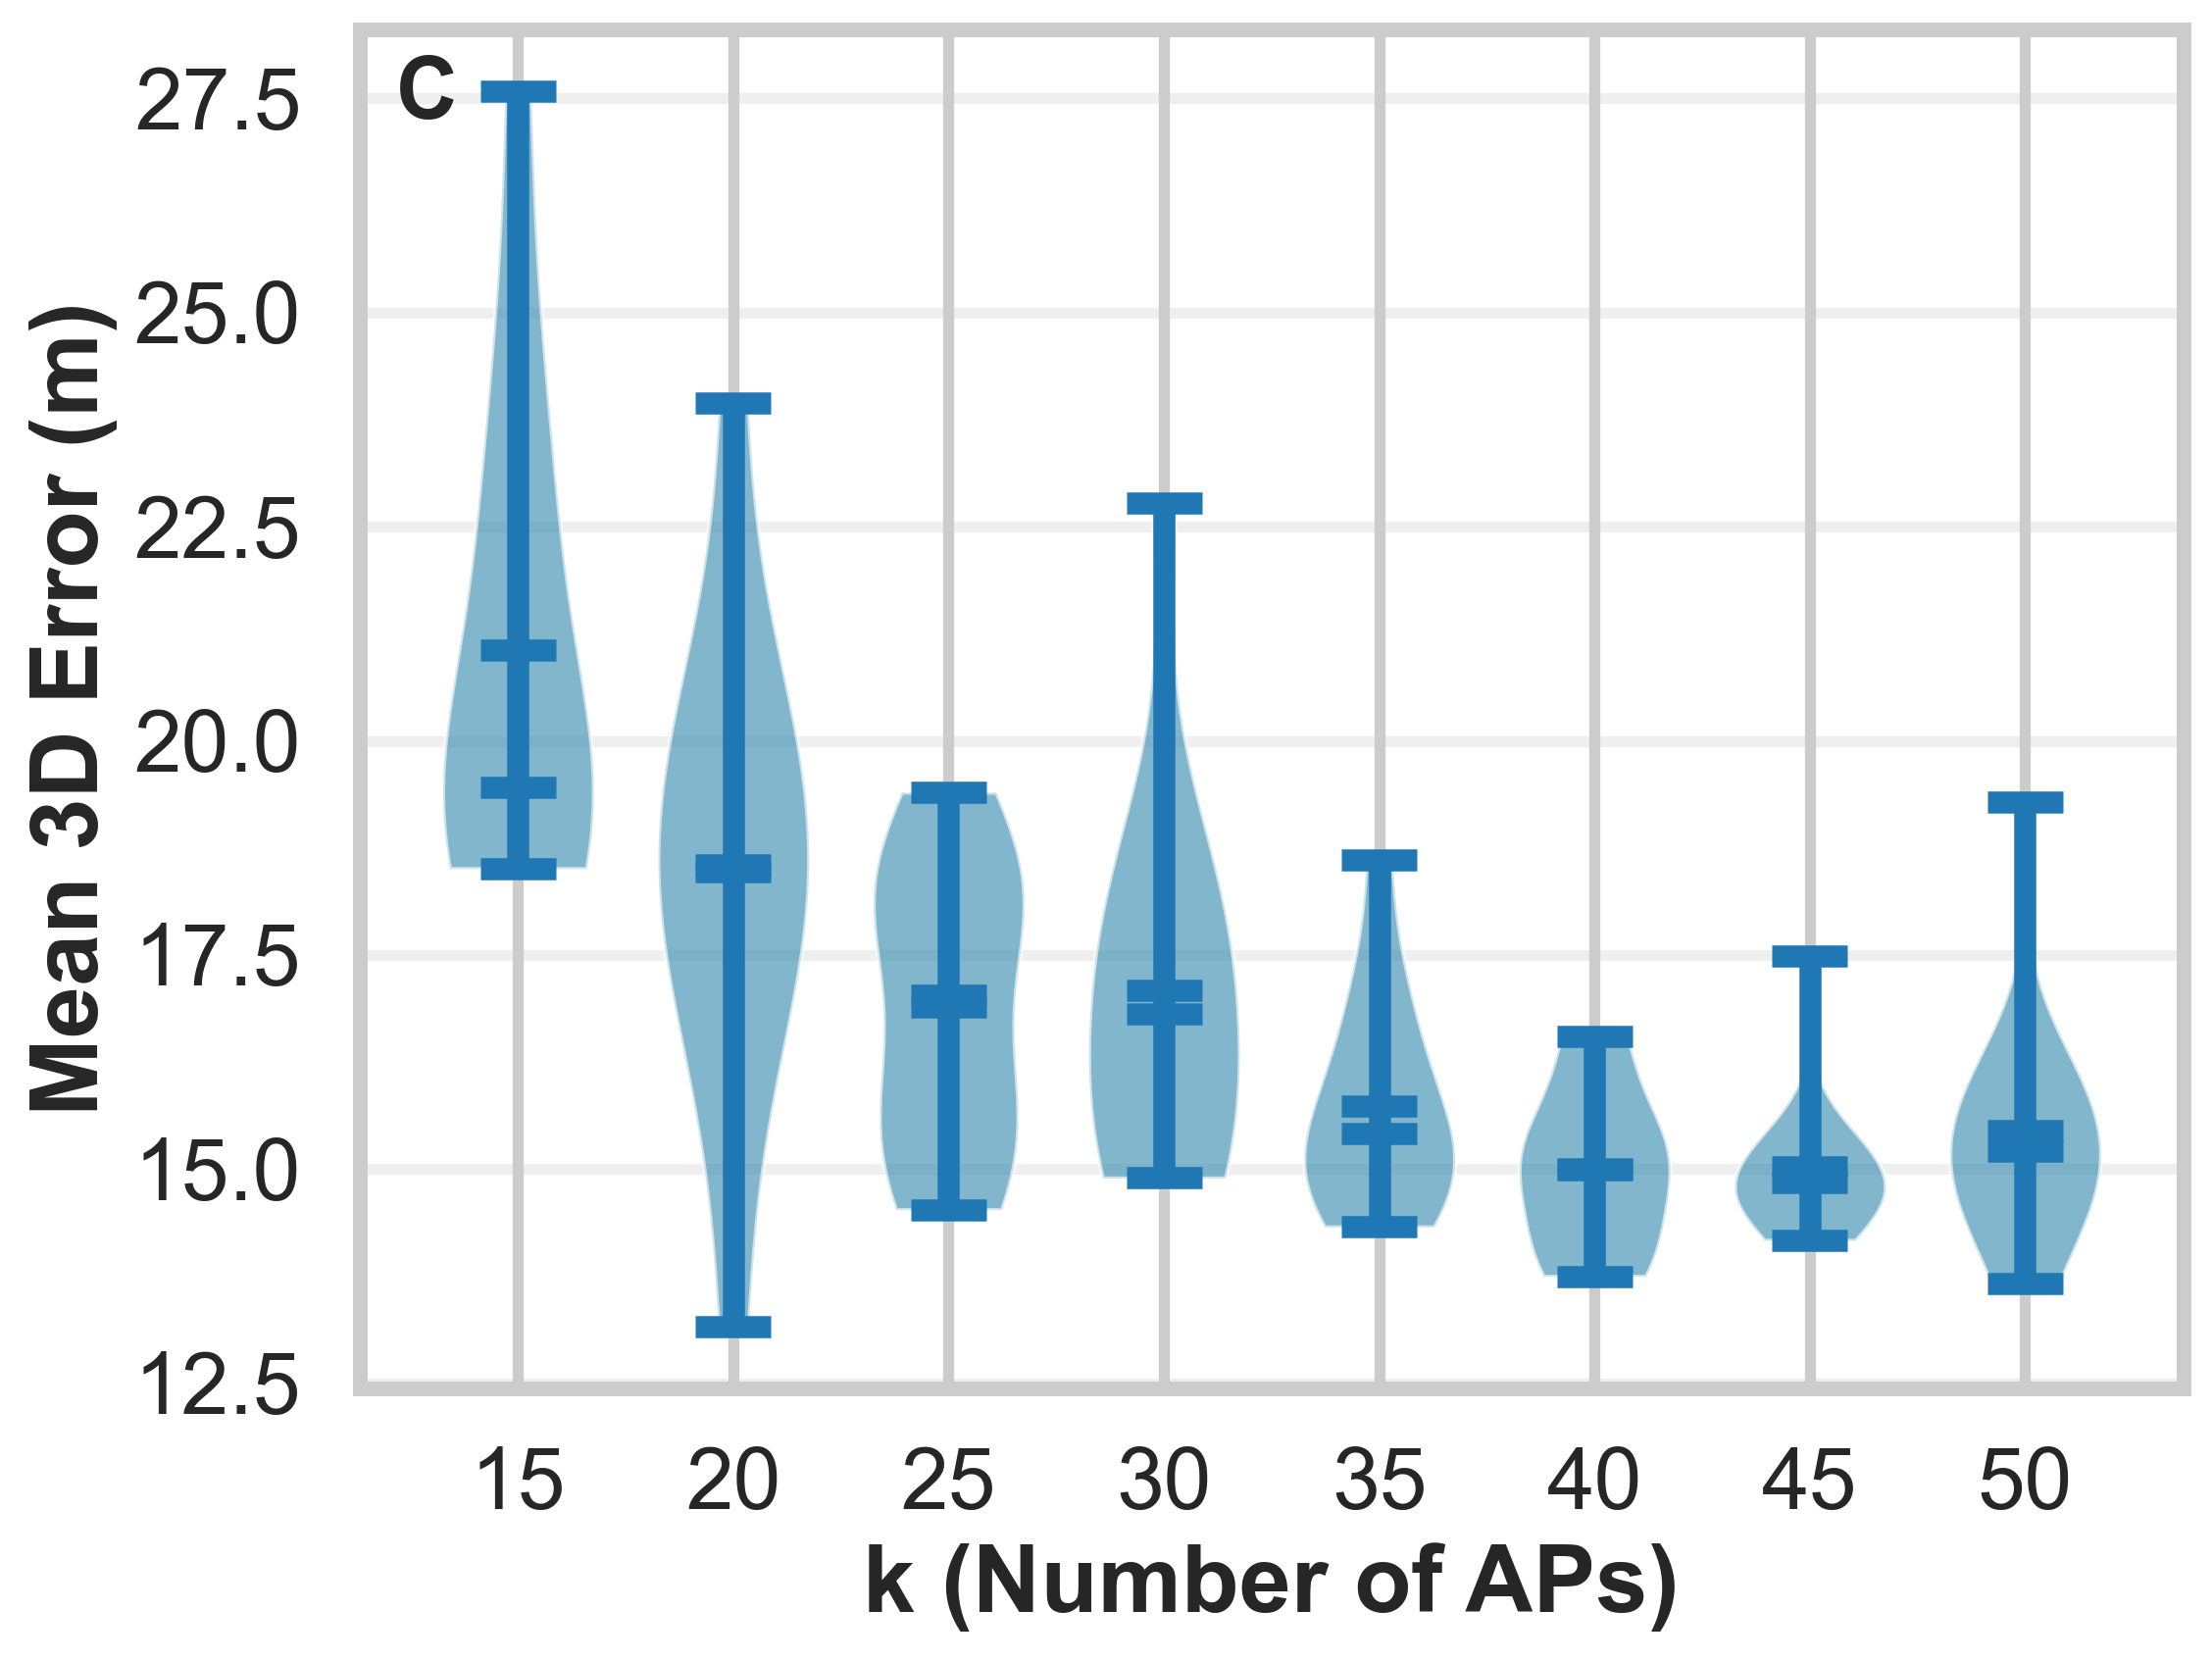

In [13]:
# Panel C: Violin plot
fig = plt.figure(figsize=(8, 6))
ax3 = fig.add_subplot(111)

k_values = sorted(phase1_df['k'].unique())
data_violin = [
    phase1_df[phase1_df['k'] == k]['mean_3d_error_m'].values
    for k in k_values
]

parts = ax3.violinplot(
    data_violin, positions=range(len(k_values)),
    showmeans=True, showmedians=True, widths=0.7
)

for pc in parts['bodies']:
    pc.set_facecolor('#2E86AB')
    pc.set_alpha(0.6)

ax3.set_xticks(range(len(k_values)))
ax3.set_xticklabels(k_values)
ax3.set_xlabel('k (Number of APs)', fontweight='bold')
ax3.set_ylabel('Mean 3D Error (m)', fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

ax3.text(0.02, 0.98, 'C', transform=ax3.transAxes,
         fontweight='bold', va='top')

plt.savefig(output_dir / 'Error_vs_k_violin', dpi=300, bbox_inches='tight')
plt.show()


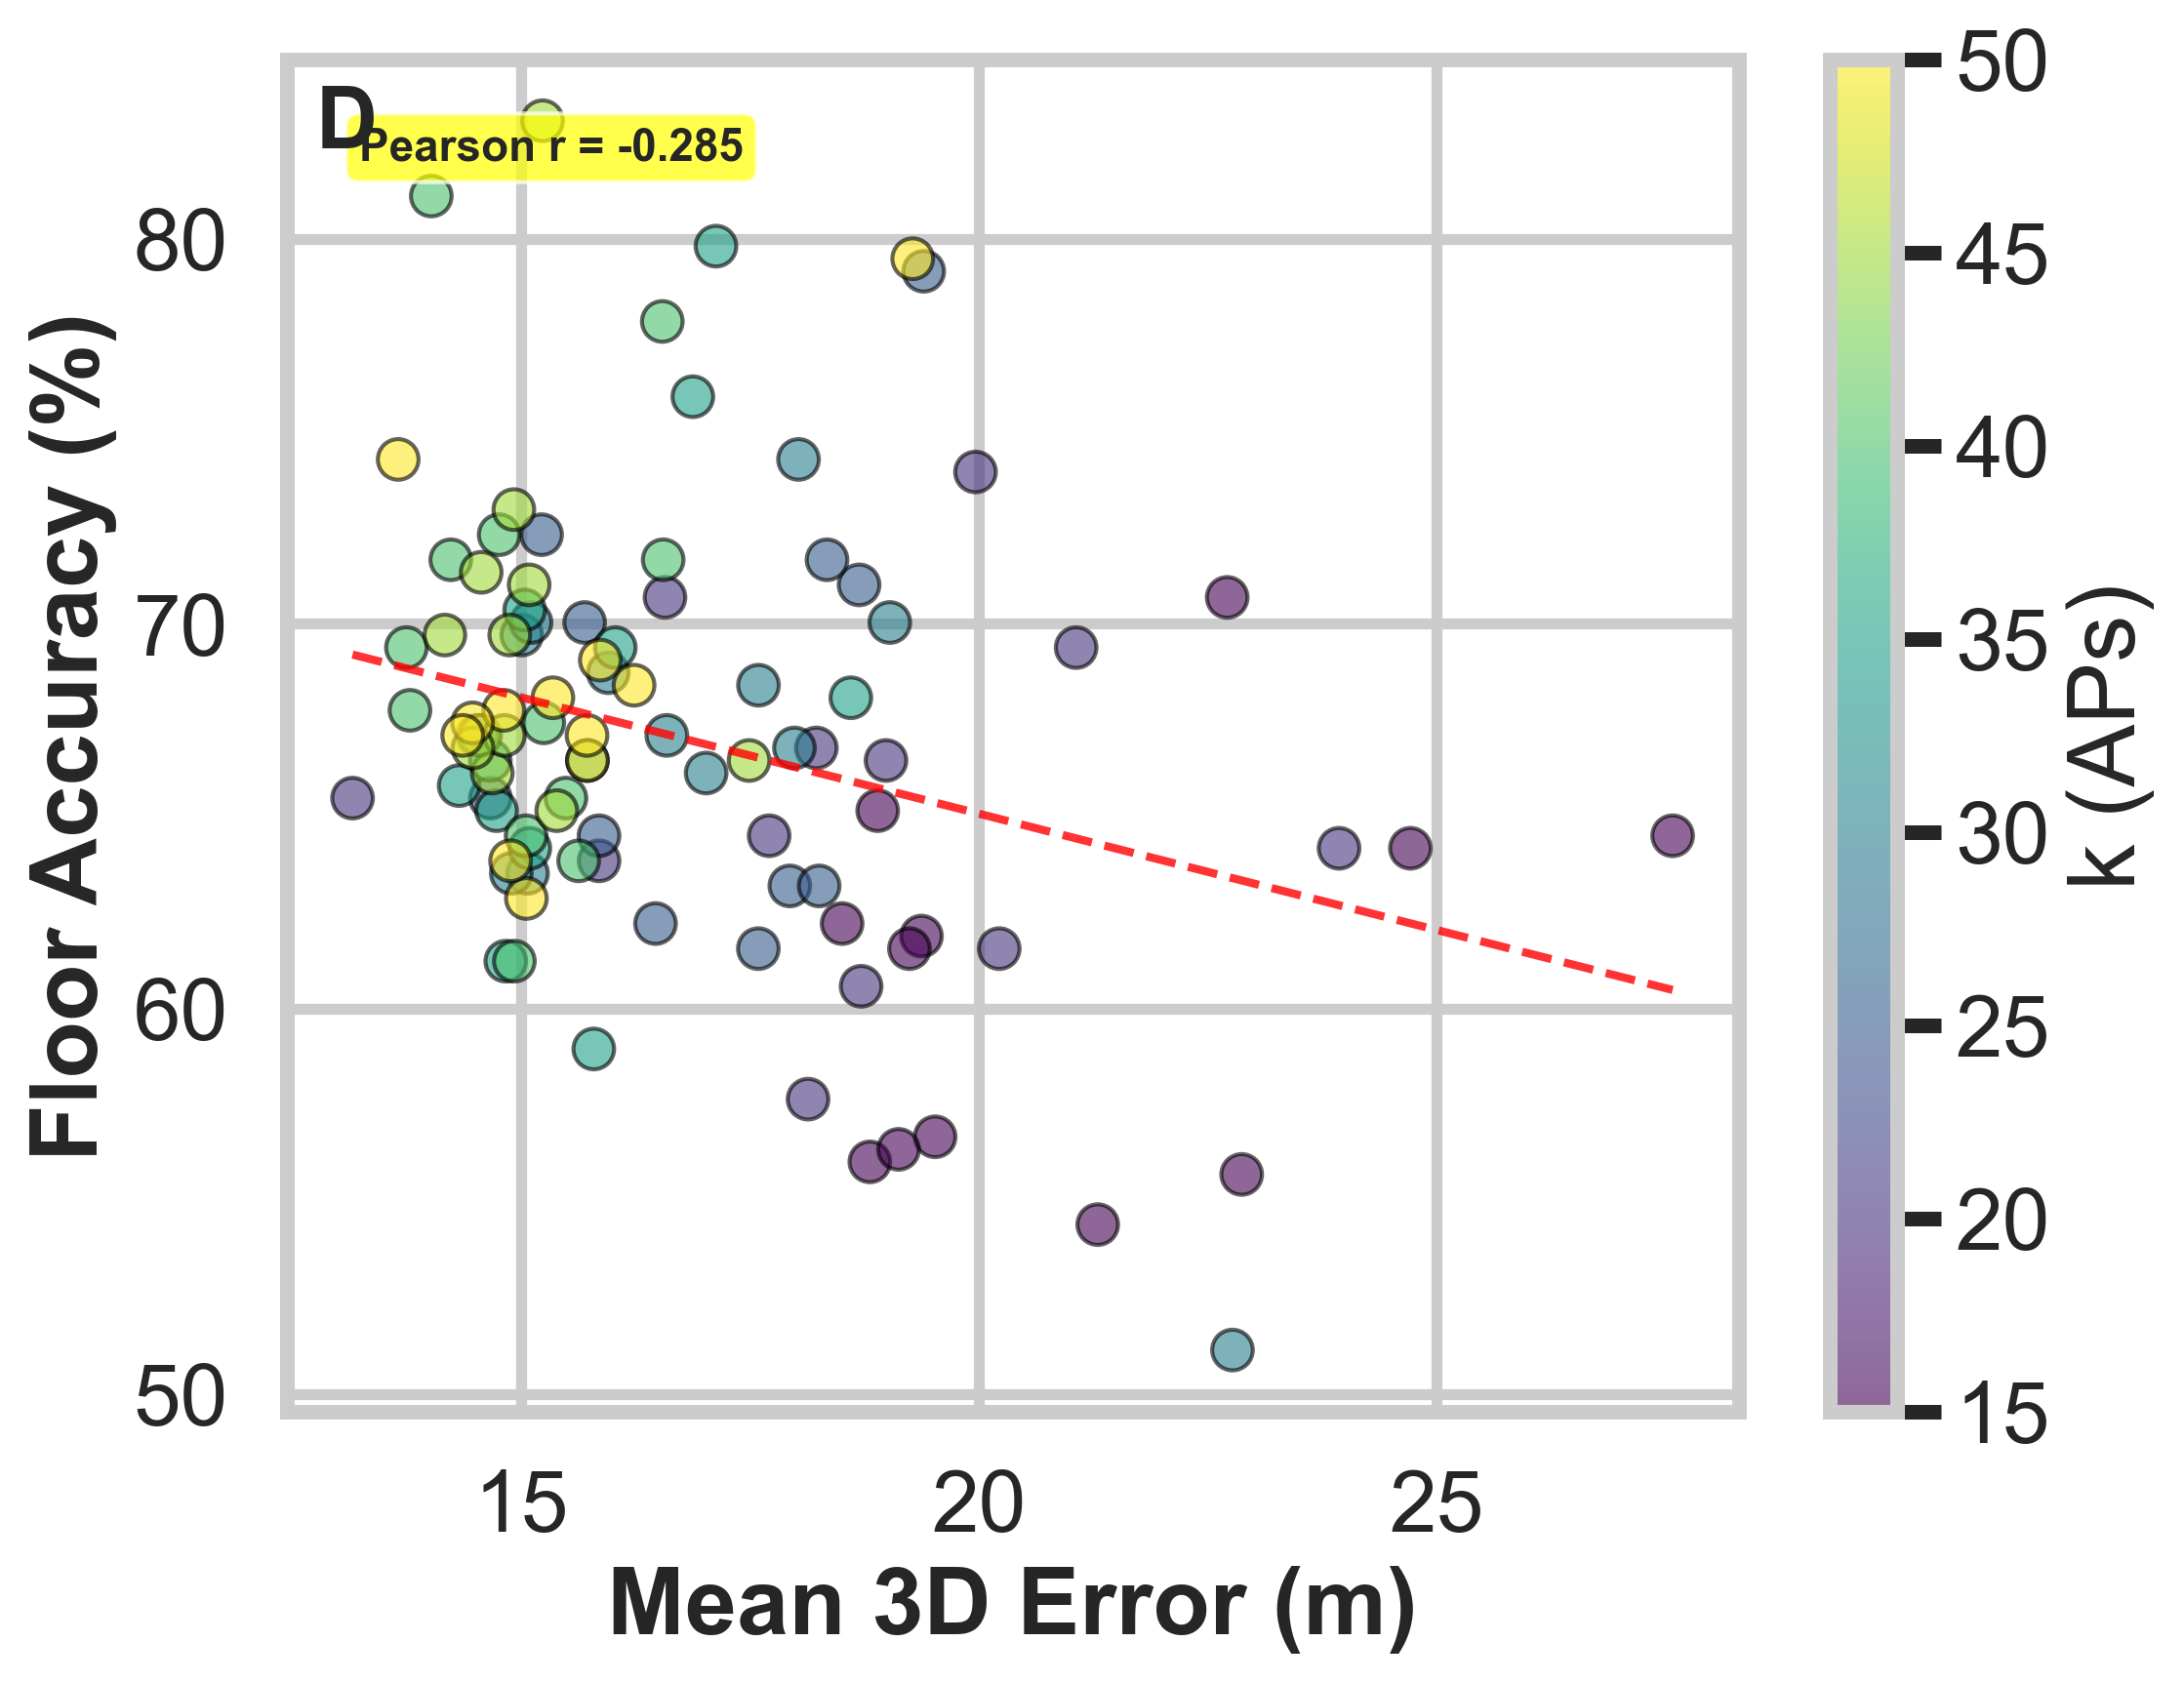

In [14]:
# Panel D: Scatter correlation
fig = plt.figure(figsize=(8, 6))
ax4 = fig.add_subplot(111)

scatter = ax4.scatter(
    phase1_df['mean_3d_error_m'],
    phase1_df['floor_accuracy_0'] * 100,
    c=phase1_df['k'], cmap='viridis',
    s=100, alpha=0.6, edgecolors='black', linewidths=1
)

# Regression line
z = np.polyfit(
    phase1_df['mean_3d_error_m'], phase1_df['floor_accuracy_0'] * 100, 1
)
p = np.poly1d(z)
x_line = np.linspace(
    phase1_df['mean_3d_error_m'].min(),
    phase1_df['mean_3d_error_m'].max(), 100
)
ax4.plot(x_line, p(x_line), "r--", linewidth=2, alpha=0.8)

# Correlation
corr = phase1_df['mean_3d_error_m'].corr(phase1_df['floor_accuracy_0'])
ax4.text(
    0.05, 0.95, f'Pearson r = {corr:.3f}',
    transform=ax4.transAxes,
    fontsize=11, fontweight='bold', va='top',
    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7)
)

ax4.set_xlabel('Mean 3D Error (m)', fontweight='bold')
ax4.set_ylabel('Floor Accuracy (%)', fontweight='bold')

plt.colorbar(scatter, ax=ax4, label='k (APs)')
ax4.text(0.02, 0.98, 'D', transform=ax4.transAxes,
        fontweight='bold', va='top')

plt.savefig(output_dir / 'floor_acc_mean_3d_error_scatter', dpi=300, bbox_inches='tight')
plt.show()


---
# Phase 2: OpenJij Annealing Parameter Optimization

Impact of quantum annealing parameters on performance and efficiency.

## Figure 5: Number of Sweeps vs Time-to-Solution (TTS)

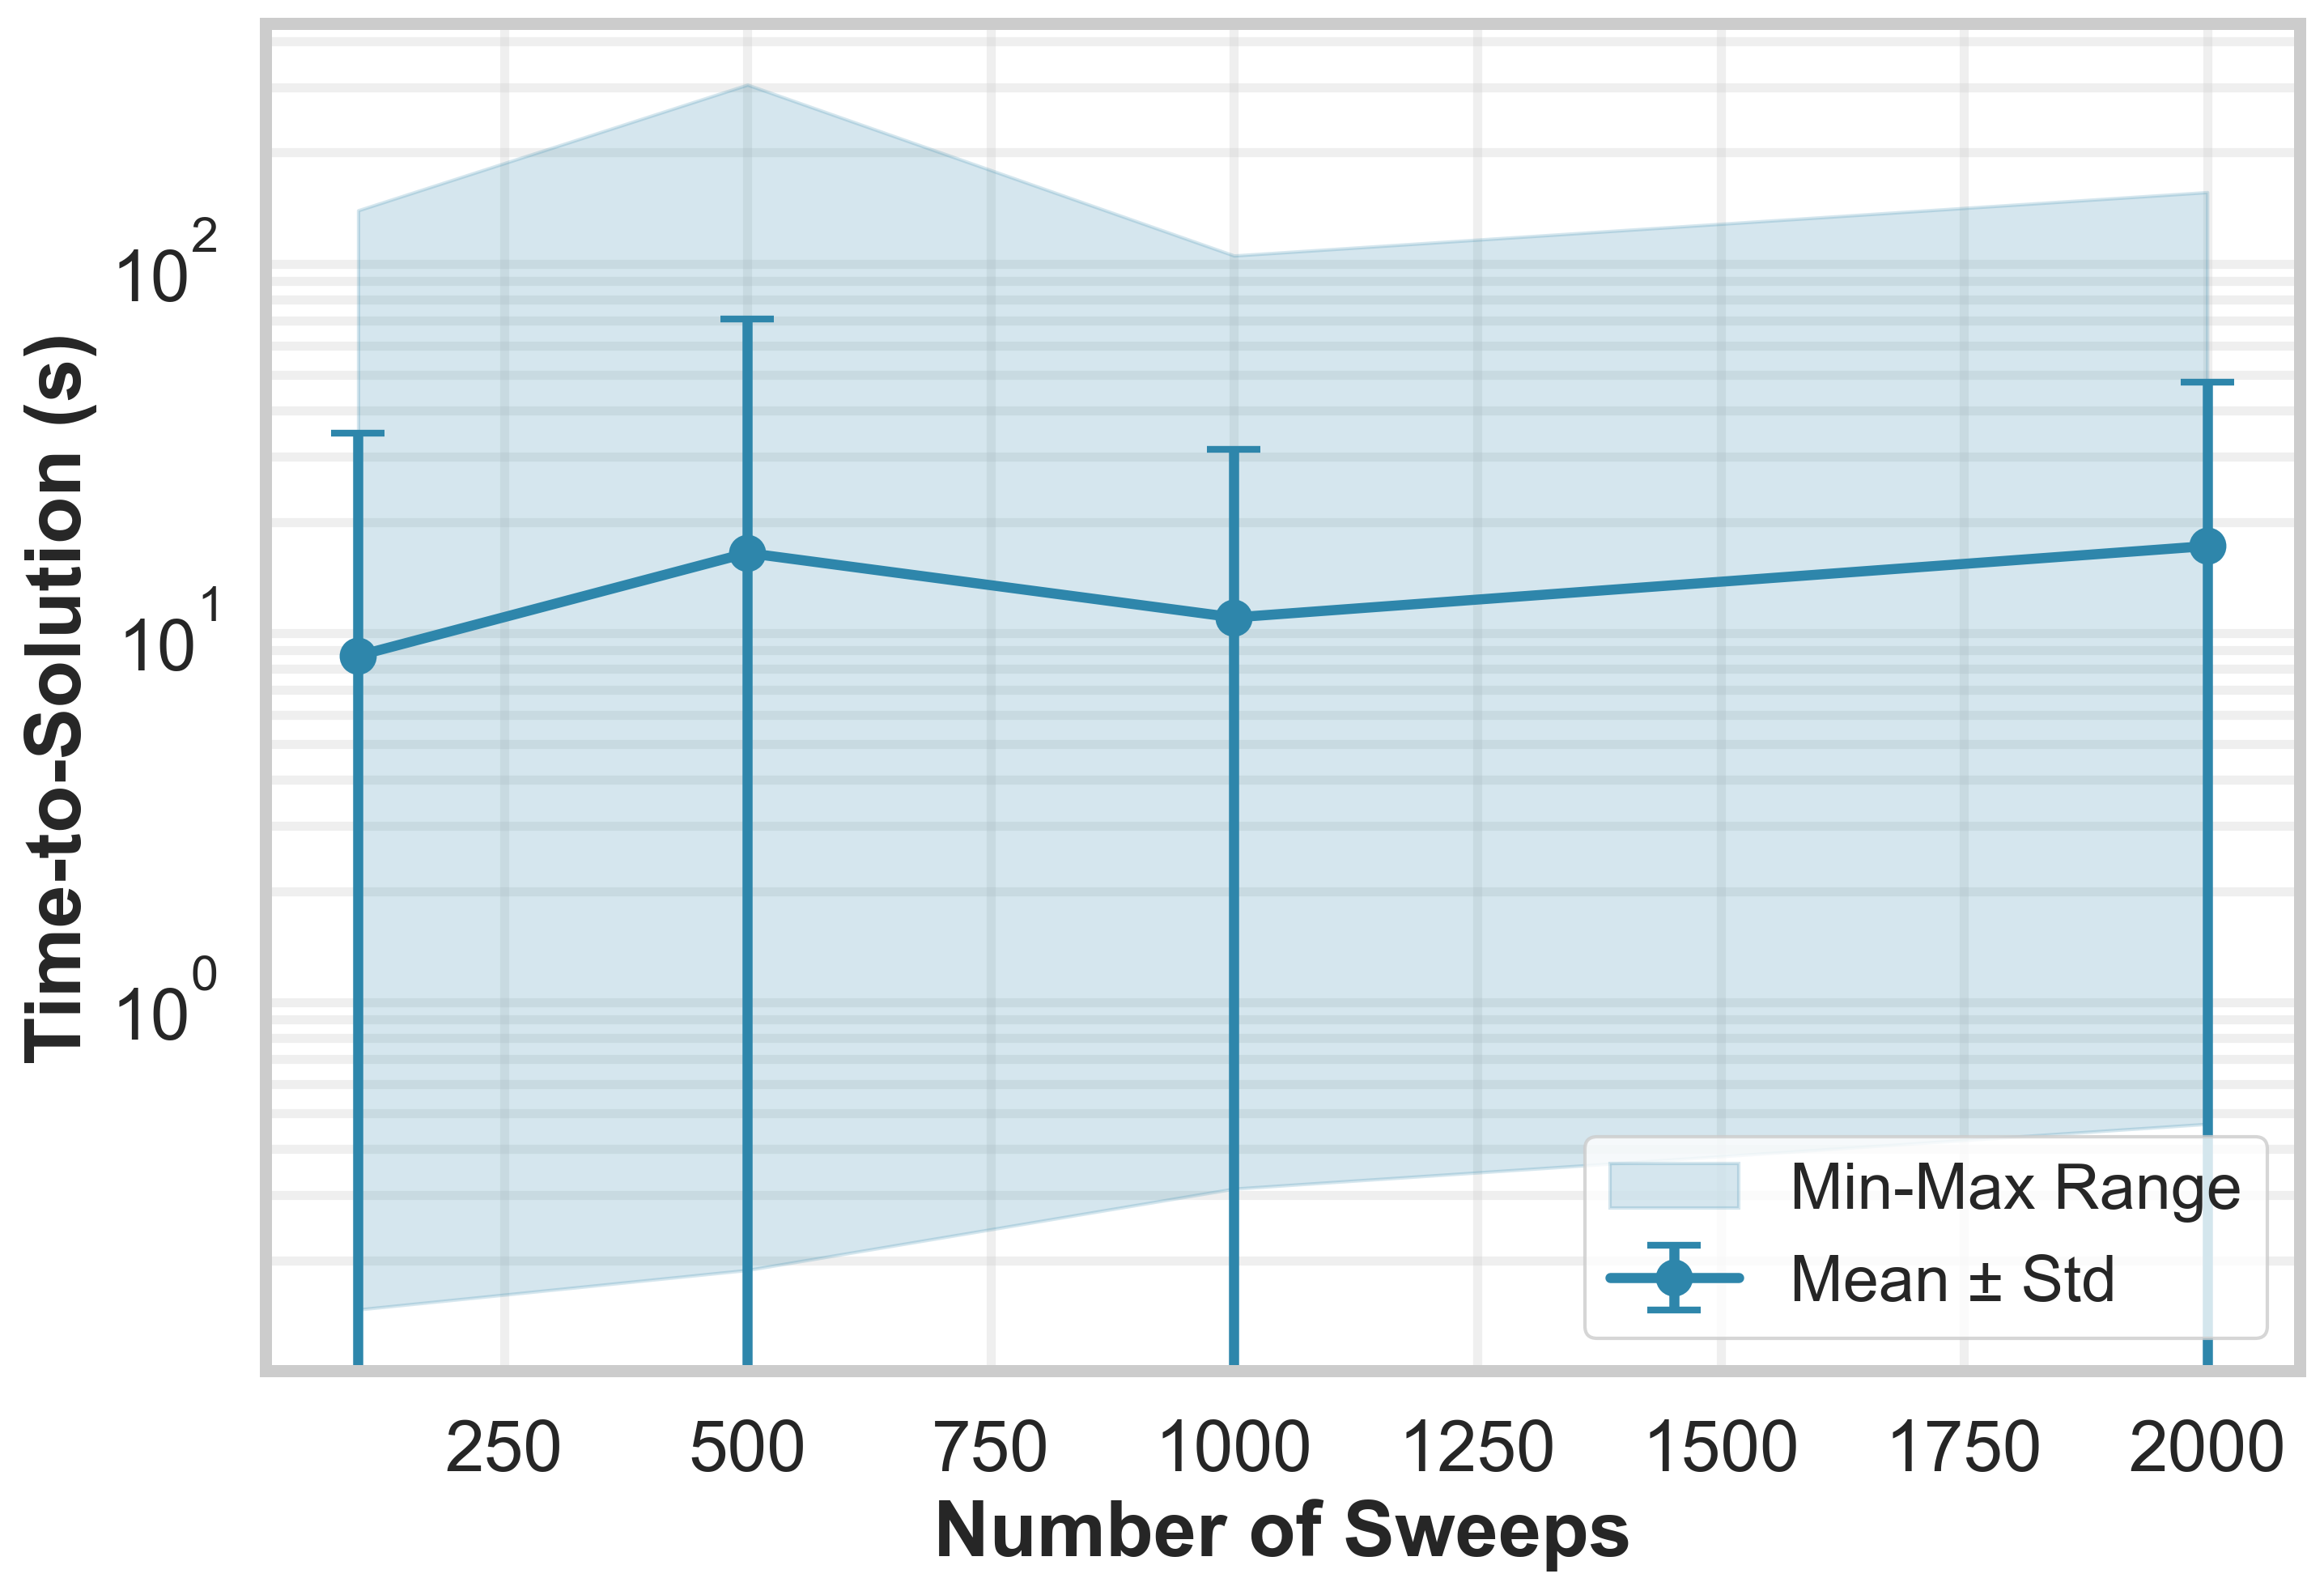

✓ Figure 5 saved: sweeps_vs_tts.png (with error bars)


In [15]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate with error bars
grouped = phase2_finite.groupby('num_sweeps').agg({
    'tts_s': ['mean', 'std', 'min', 'max']
}).reset_index()
grouped.columns = ['num_sweeps', 'mean', 'std', 'min', 'max']

# Plot with error bars (log scale)
ax.errorbar(grouped['num_sweeps'], grouped['mean'], yerr=grouped['std'],
            marker='o', linewidth=3, capsize=8, capthick=2, 
            color='#2E86AB', markersize=10, label='Mean ± Std')

# Add shaded region for min/max range
ax.fill_between(grouped['num_sweeps'], grouped['min'], grouped['max'],
                alpha=0.2, color='#2E86AB', label='Min-Max Range')

ax.set_xlabel('Number of Sweeps', fontweight='bold')
ax.set_ylabel('Time-to-Solution (s)', fontweight='bold')
ax.set_yscale('log')
ax.legend(loc='best')
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig(output_dir / 'sweeps_vs_tts.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 5 saved: sweeps_vs_tts.png (with error bars)")

## Figure 6: Number of Reads vs Success Rate

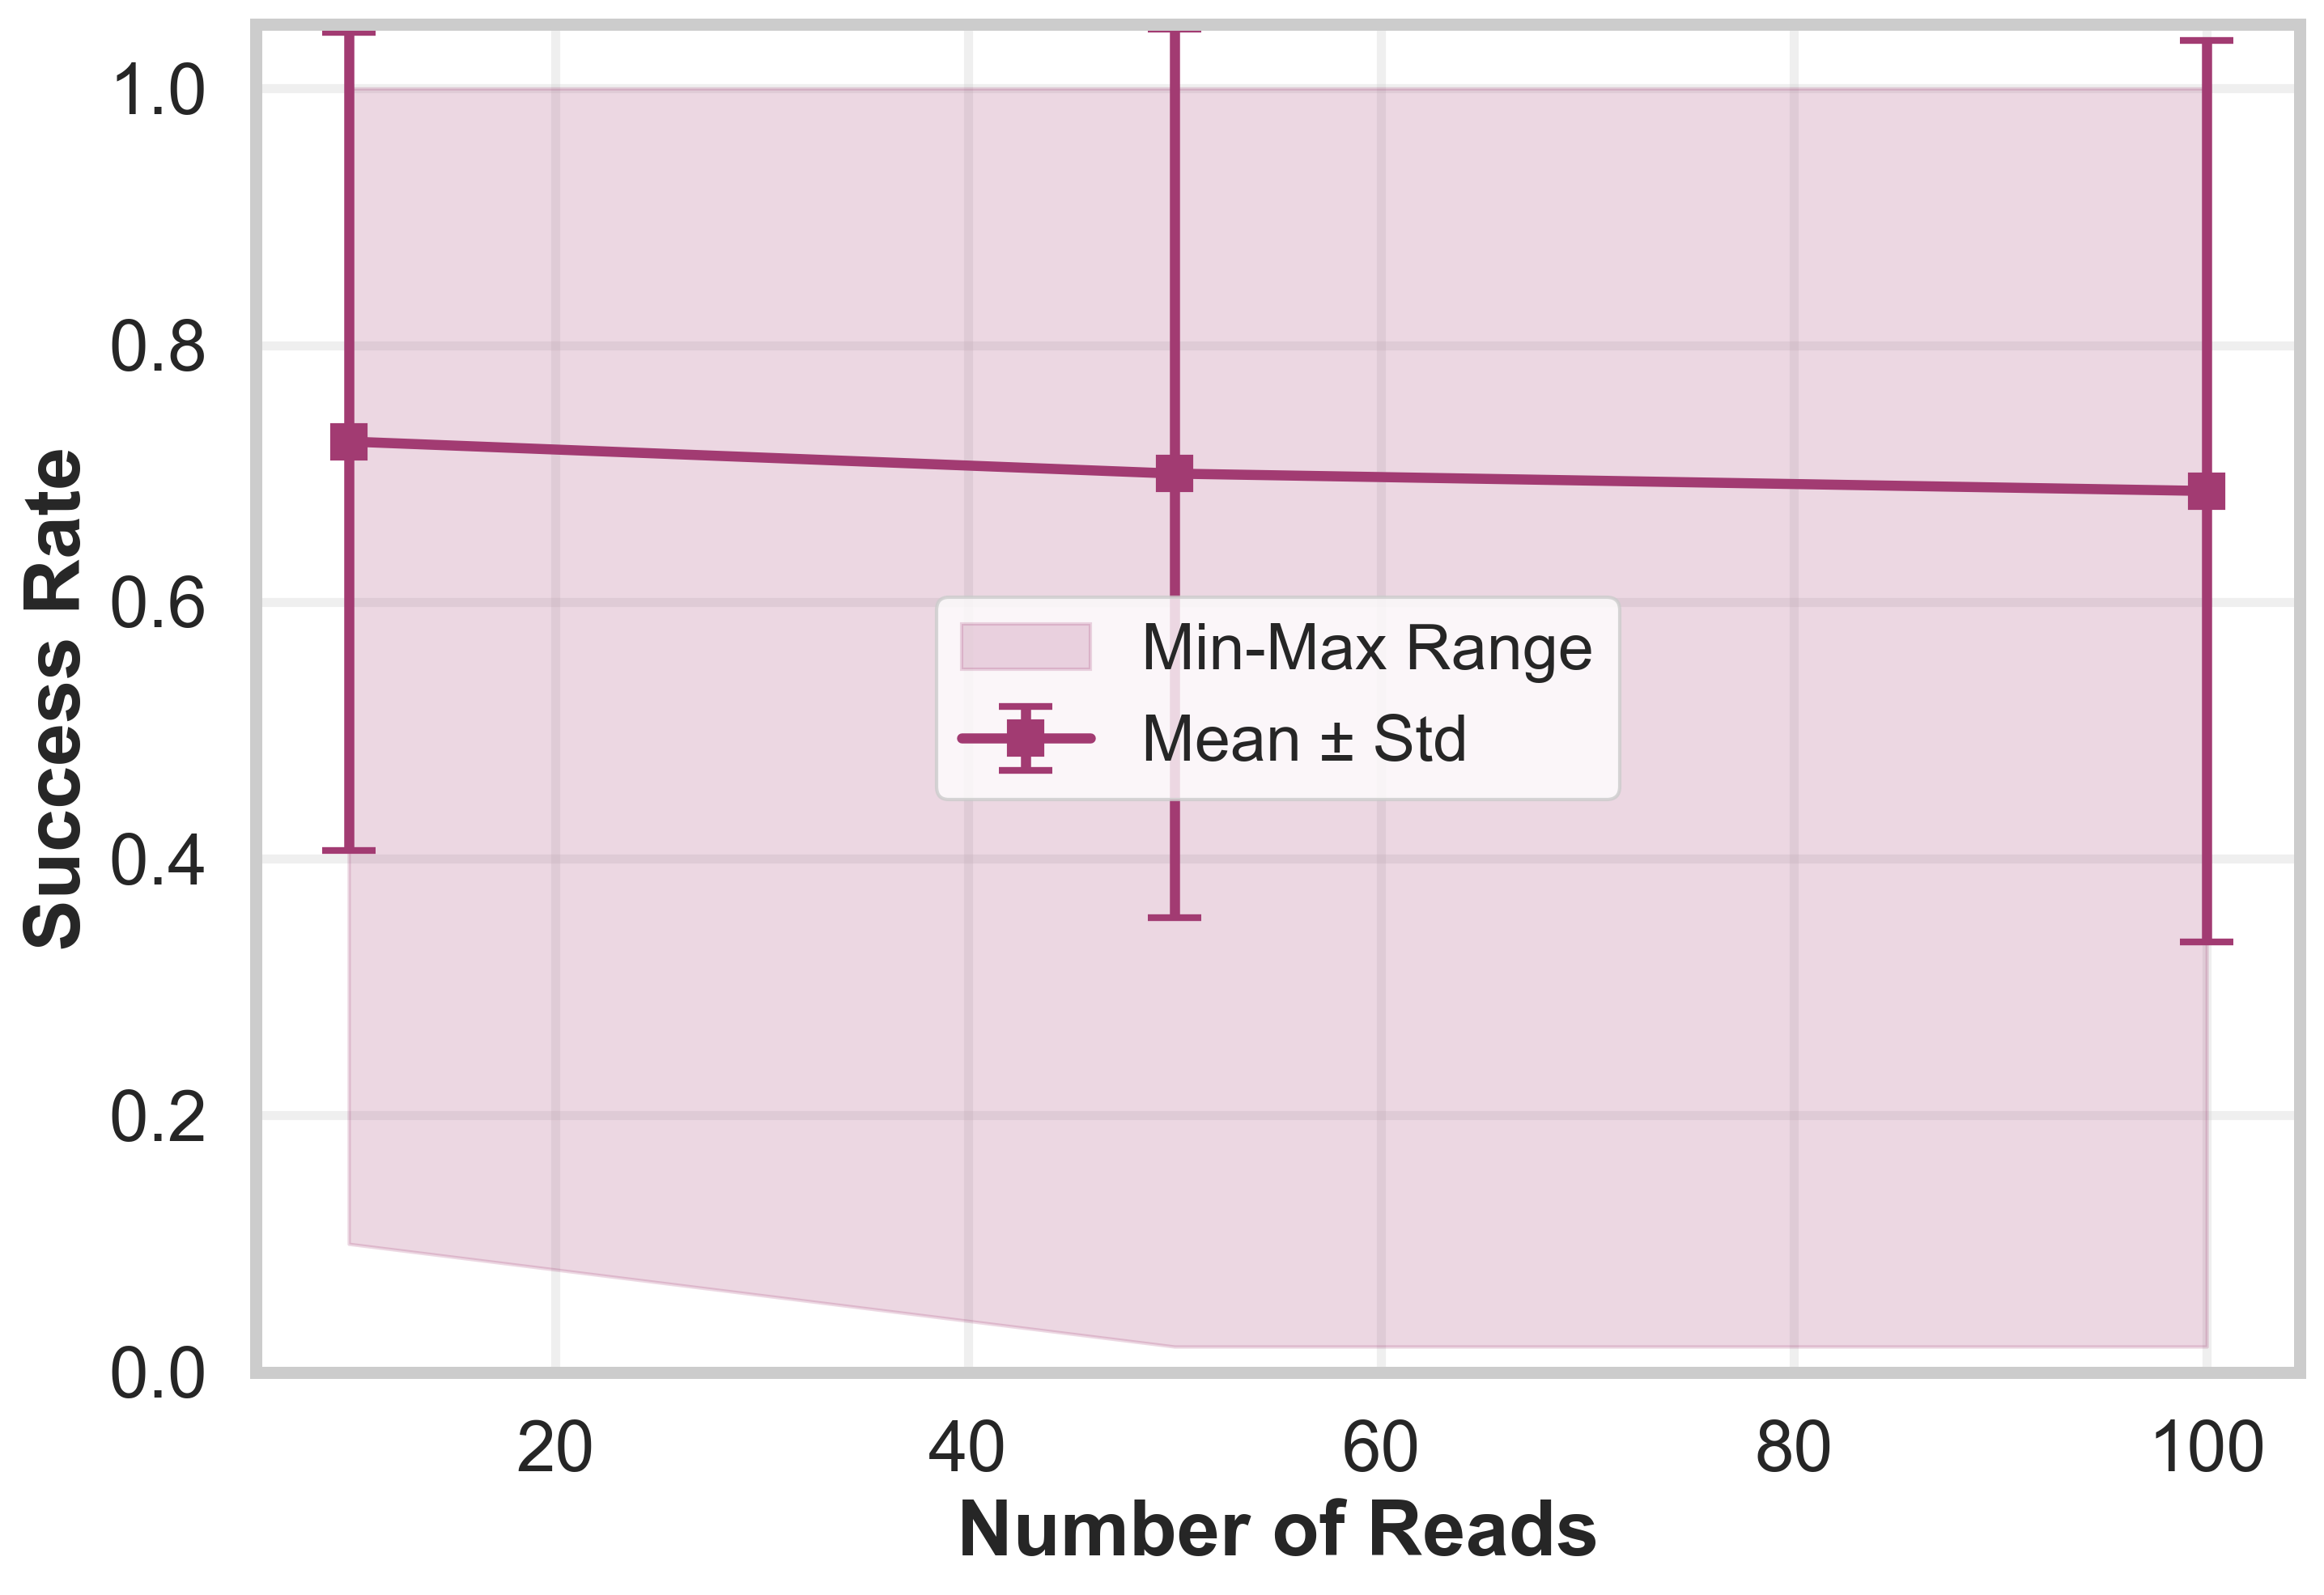

✓ Figure 6 saved: reads_vs_success.png (with error bars)


In [16]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate with error bars
grouped = phase2_finite.groupby('num_reads').agg({
    'success_rate': ['mean', 'std', 'min', 'max']
}).reset_index()
grouped.columns = ['num_reads', 'mean', 'std', 'min', 'max']

# Plot with error bars
ax.errorbar(grouped['num_reads'], grouped['mean'], yerr=grouped['std'],
            marker='s', linewidth=3, capsize=8, capthick=2, 
            color='#A23B72', markersize=10, label='Mean ± Std')

# Add shaded region for min/max range
ax.fill_between(grouped['num_reads'], grouped['min'], grouped['max'],
                alpha=0.2, color='#A23B72', label='Min-Max Range')

ax.set_xlabel('Number of Reads', fontweight='bold')
ax.set_ylabel('Success Rate', fontweight='bold')
ax.set_ylim([0, 1.05])
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'reads_vs_success.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 6 saved: reads_vs_success.png (with error bars)")

## Figure 7: Beta (Inverse Temperature) vs Mean 3D Error

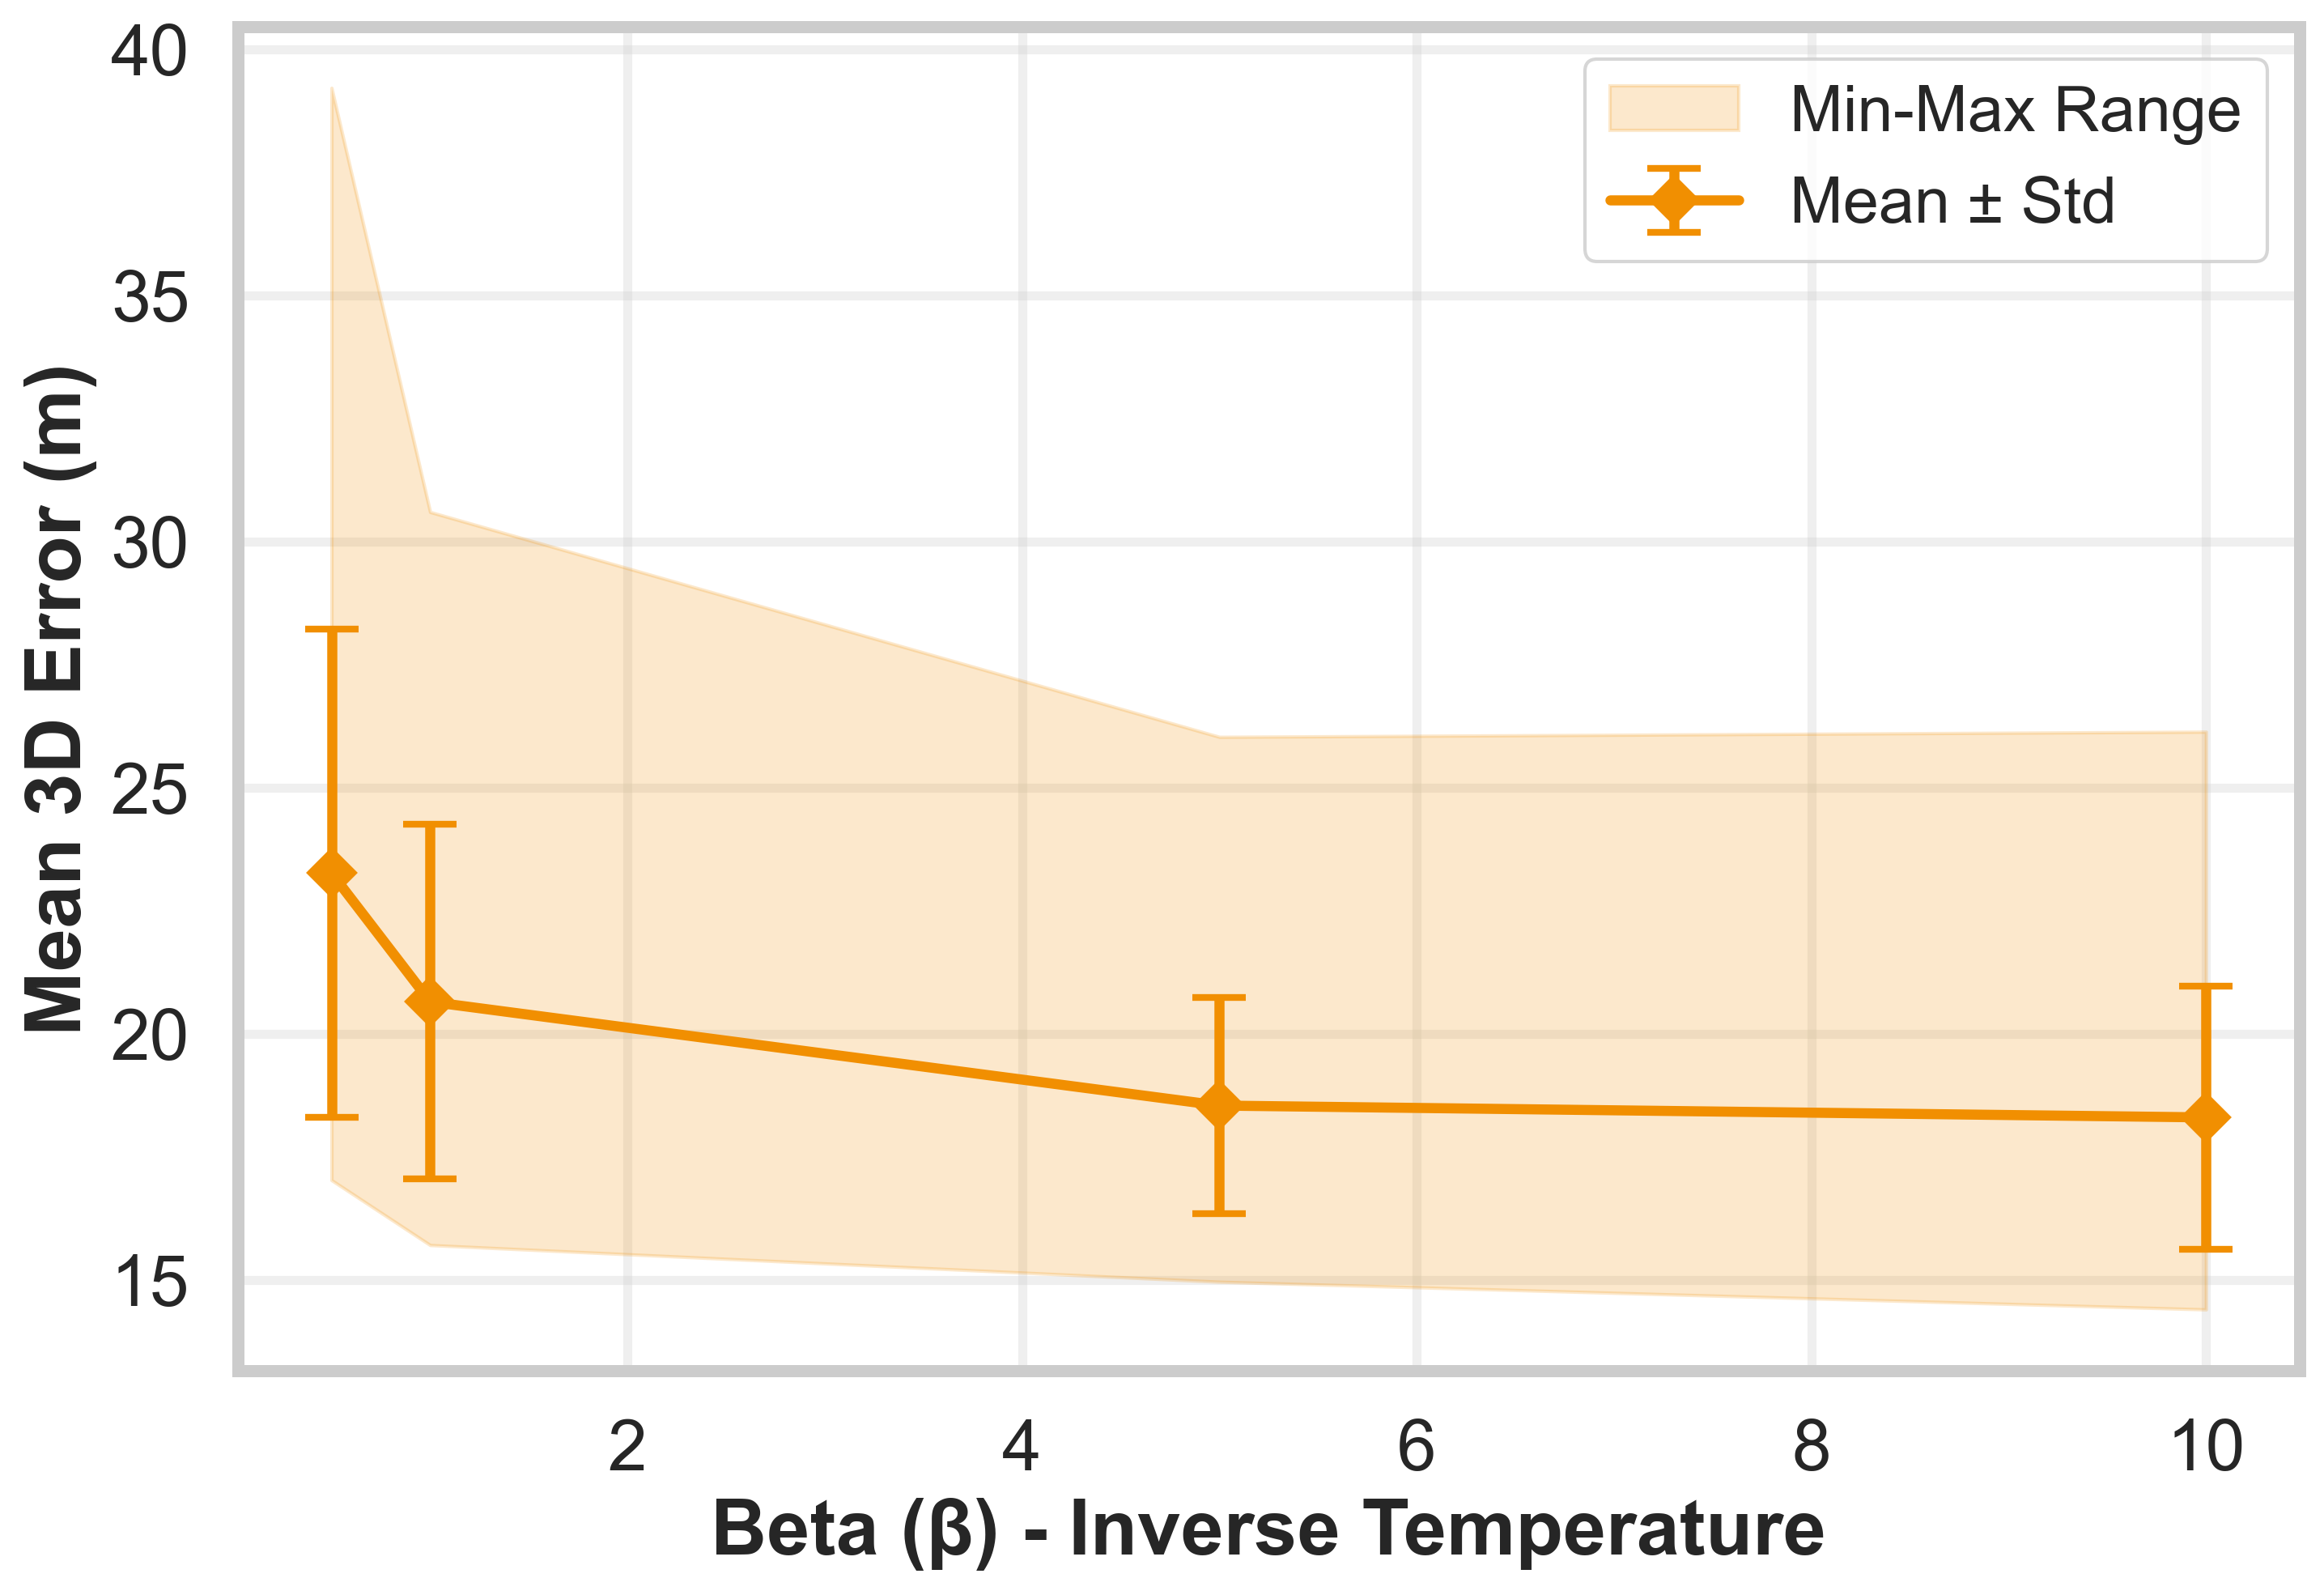

✓ Figure 7 saved: beta_vs_error.png (with error bars)


In [17]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate with error bars
grouped = phase2_finite.groupby('beta').agg({
    'mean_3d_error_m': ['mean', 'std', 'min', 'max']
}).reset_index()
grouped.columns = ['beta', 'mean', 'std', 'min', 'max']

# Plot with error bars
ax.errorbar(grouped['beta'], grouped['mean'], yerr=grouped['std'],
            marker='D', linewidth=3, capsize=8, capthick=2, 
            color='#F18F01', markersize=10, label='Mean ± Std')

# Add shaded region for min/max range
ax.fill_between(grouped['beta'], grouped['min'], grouped['max'],
                alpha=0.2, color='#F18F01', label='Min-Max Range')

ax.set_xlabel('Beta (β) - Inverse Temperature', fontweight='bold')
ax.set_ylabel('Mean 3D Error (m)',fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'beta_vs_error.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 7 saved: beta_vs_error.png (with error bars)")

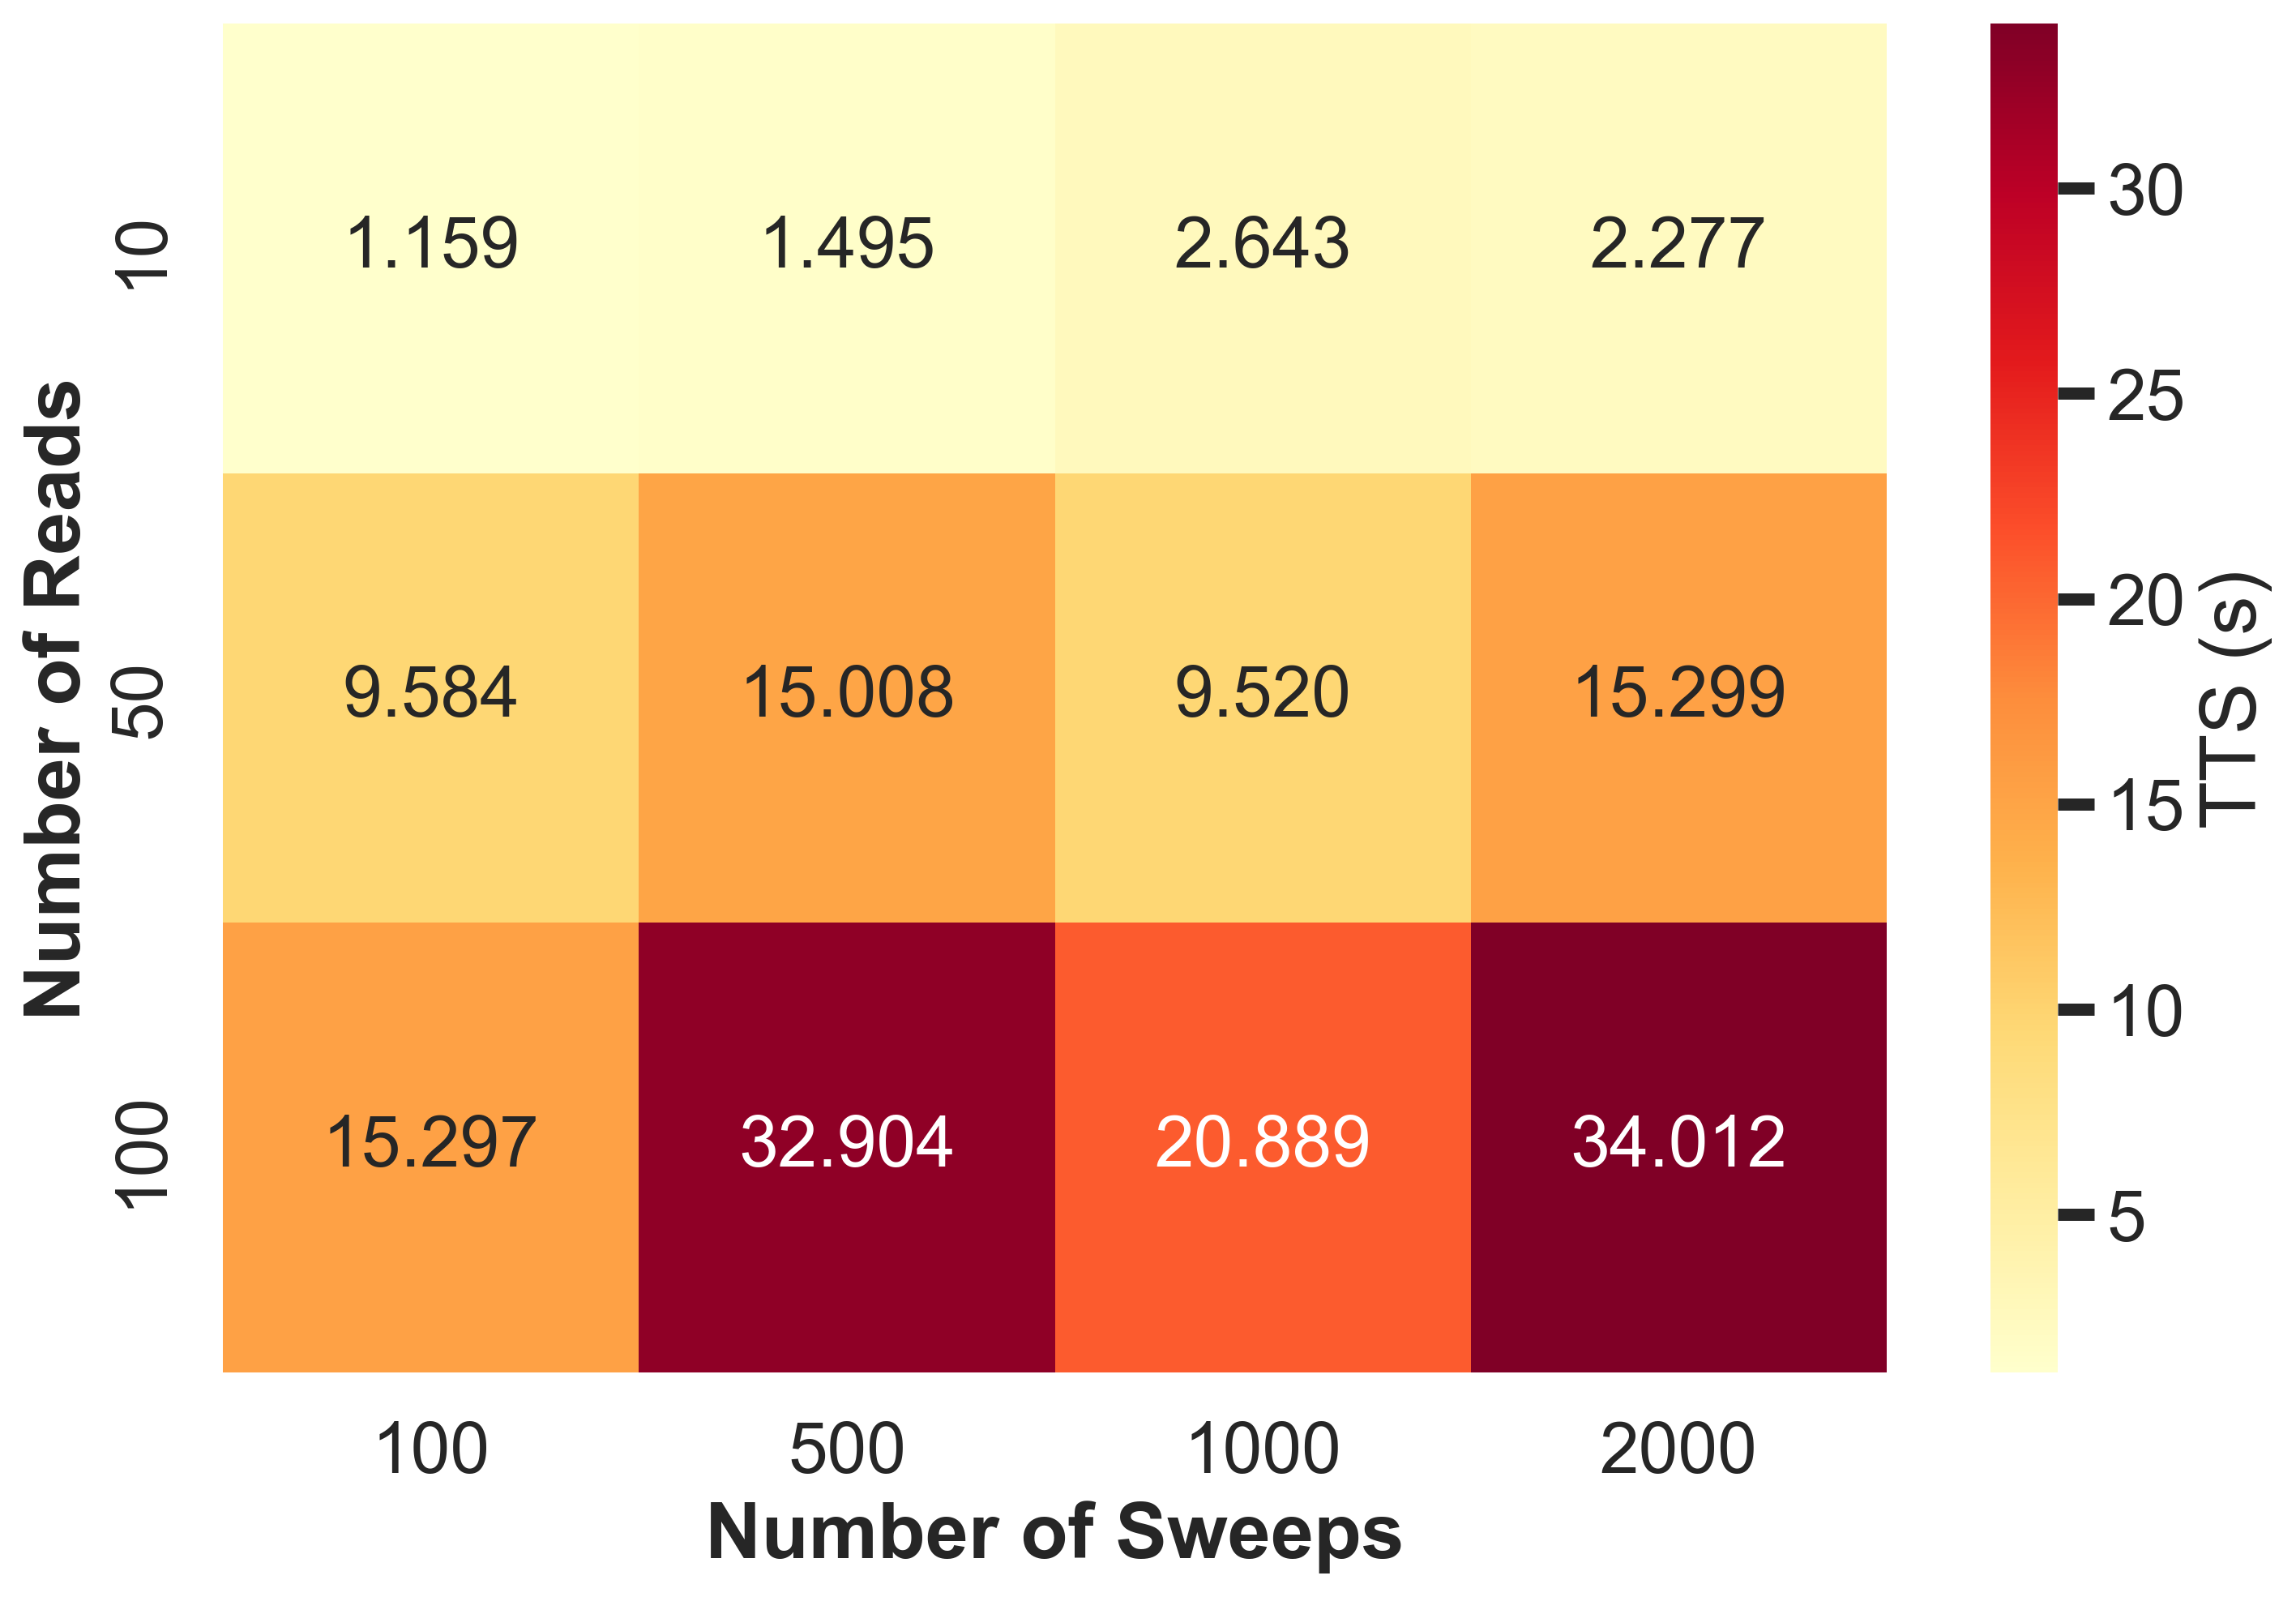

✓ Heatmap 1 saved: heatmap1_tts_sweeps_reads.png


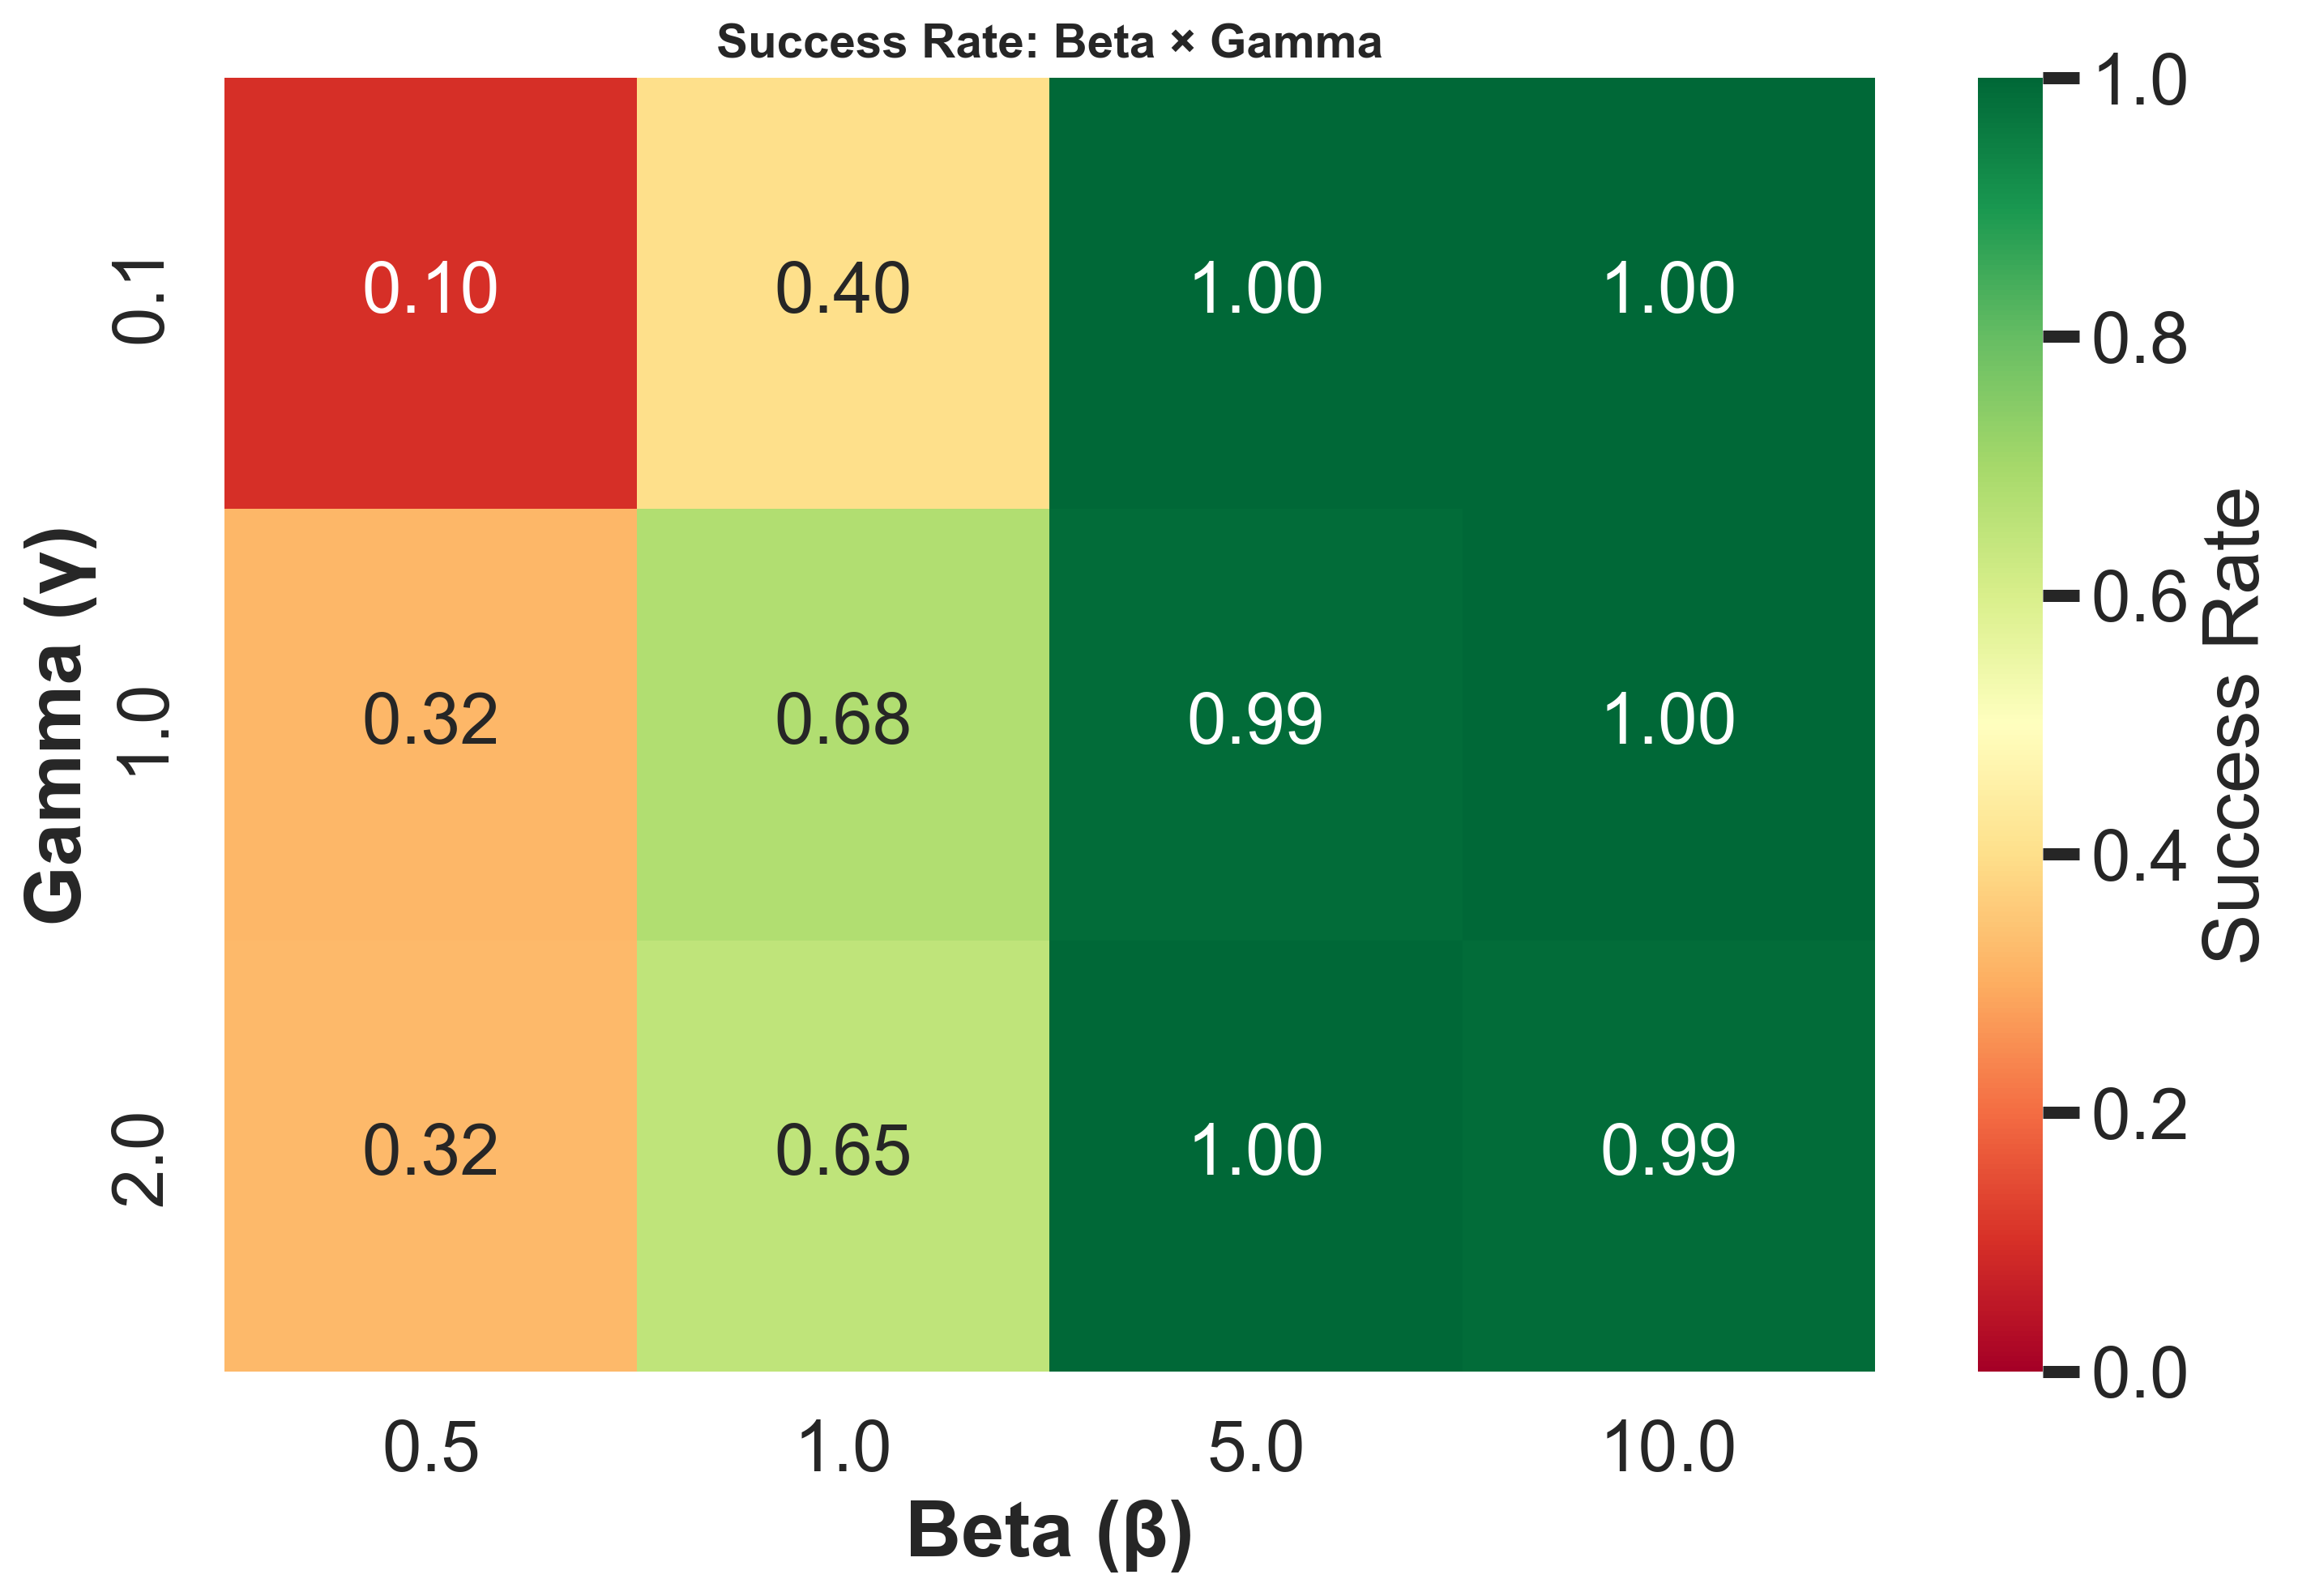

✓ Heatmap 2 saved: heatmap2_success_beta_gamma.png


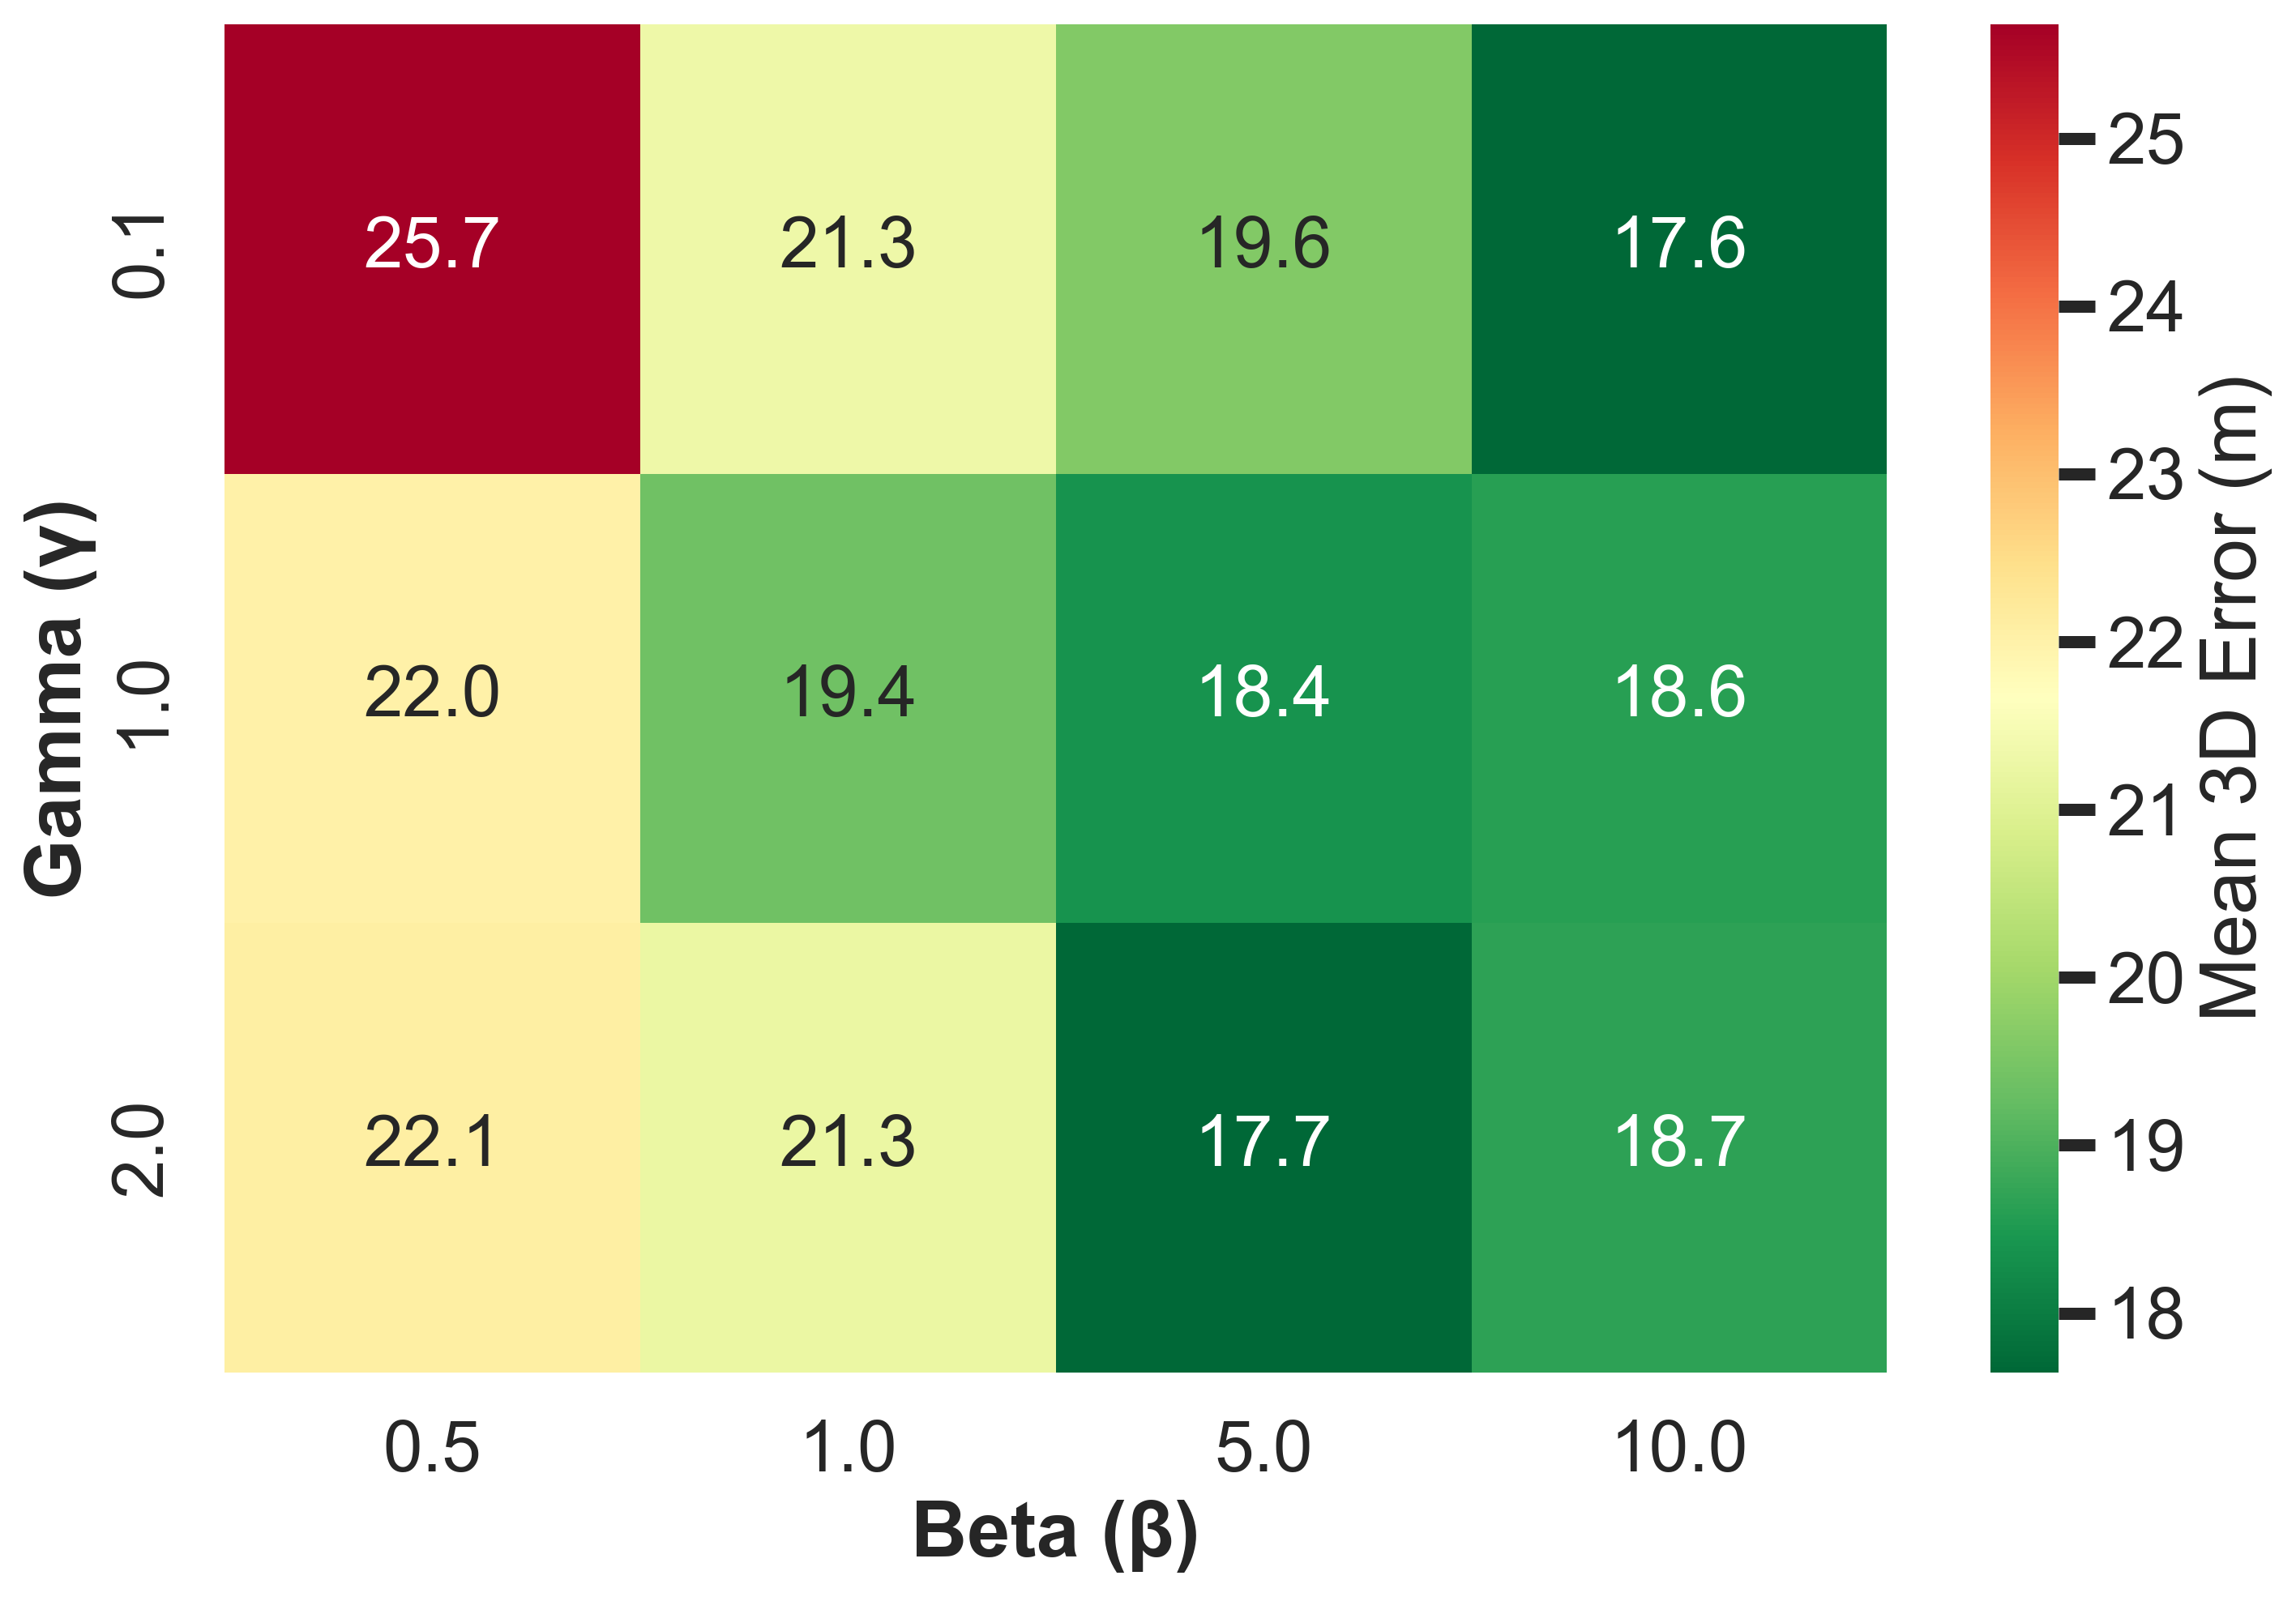

✓ Heatmap 3 saved: heatmap3_error_beta_gamma.png


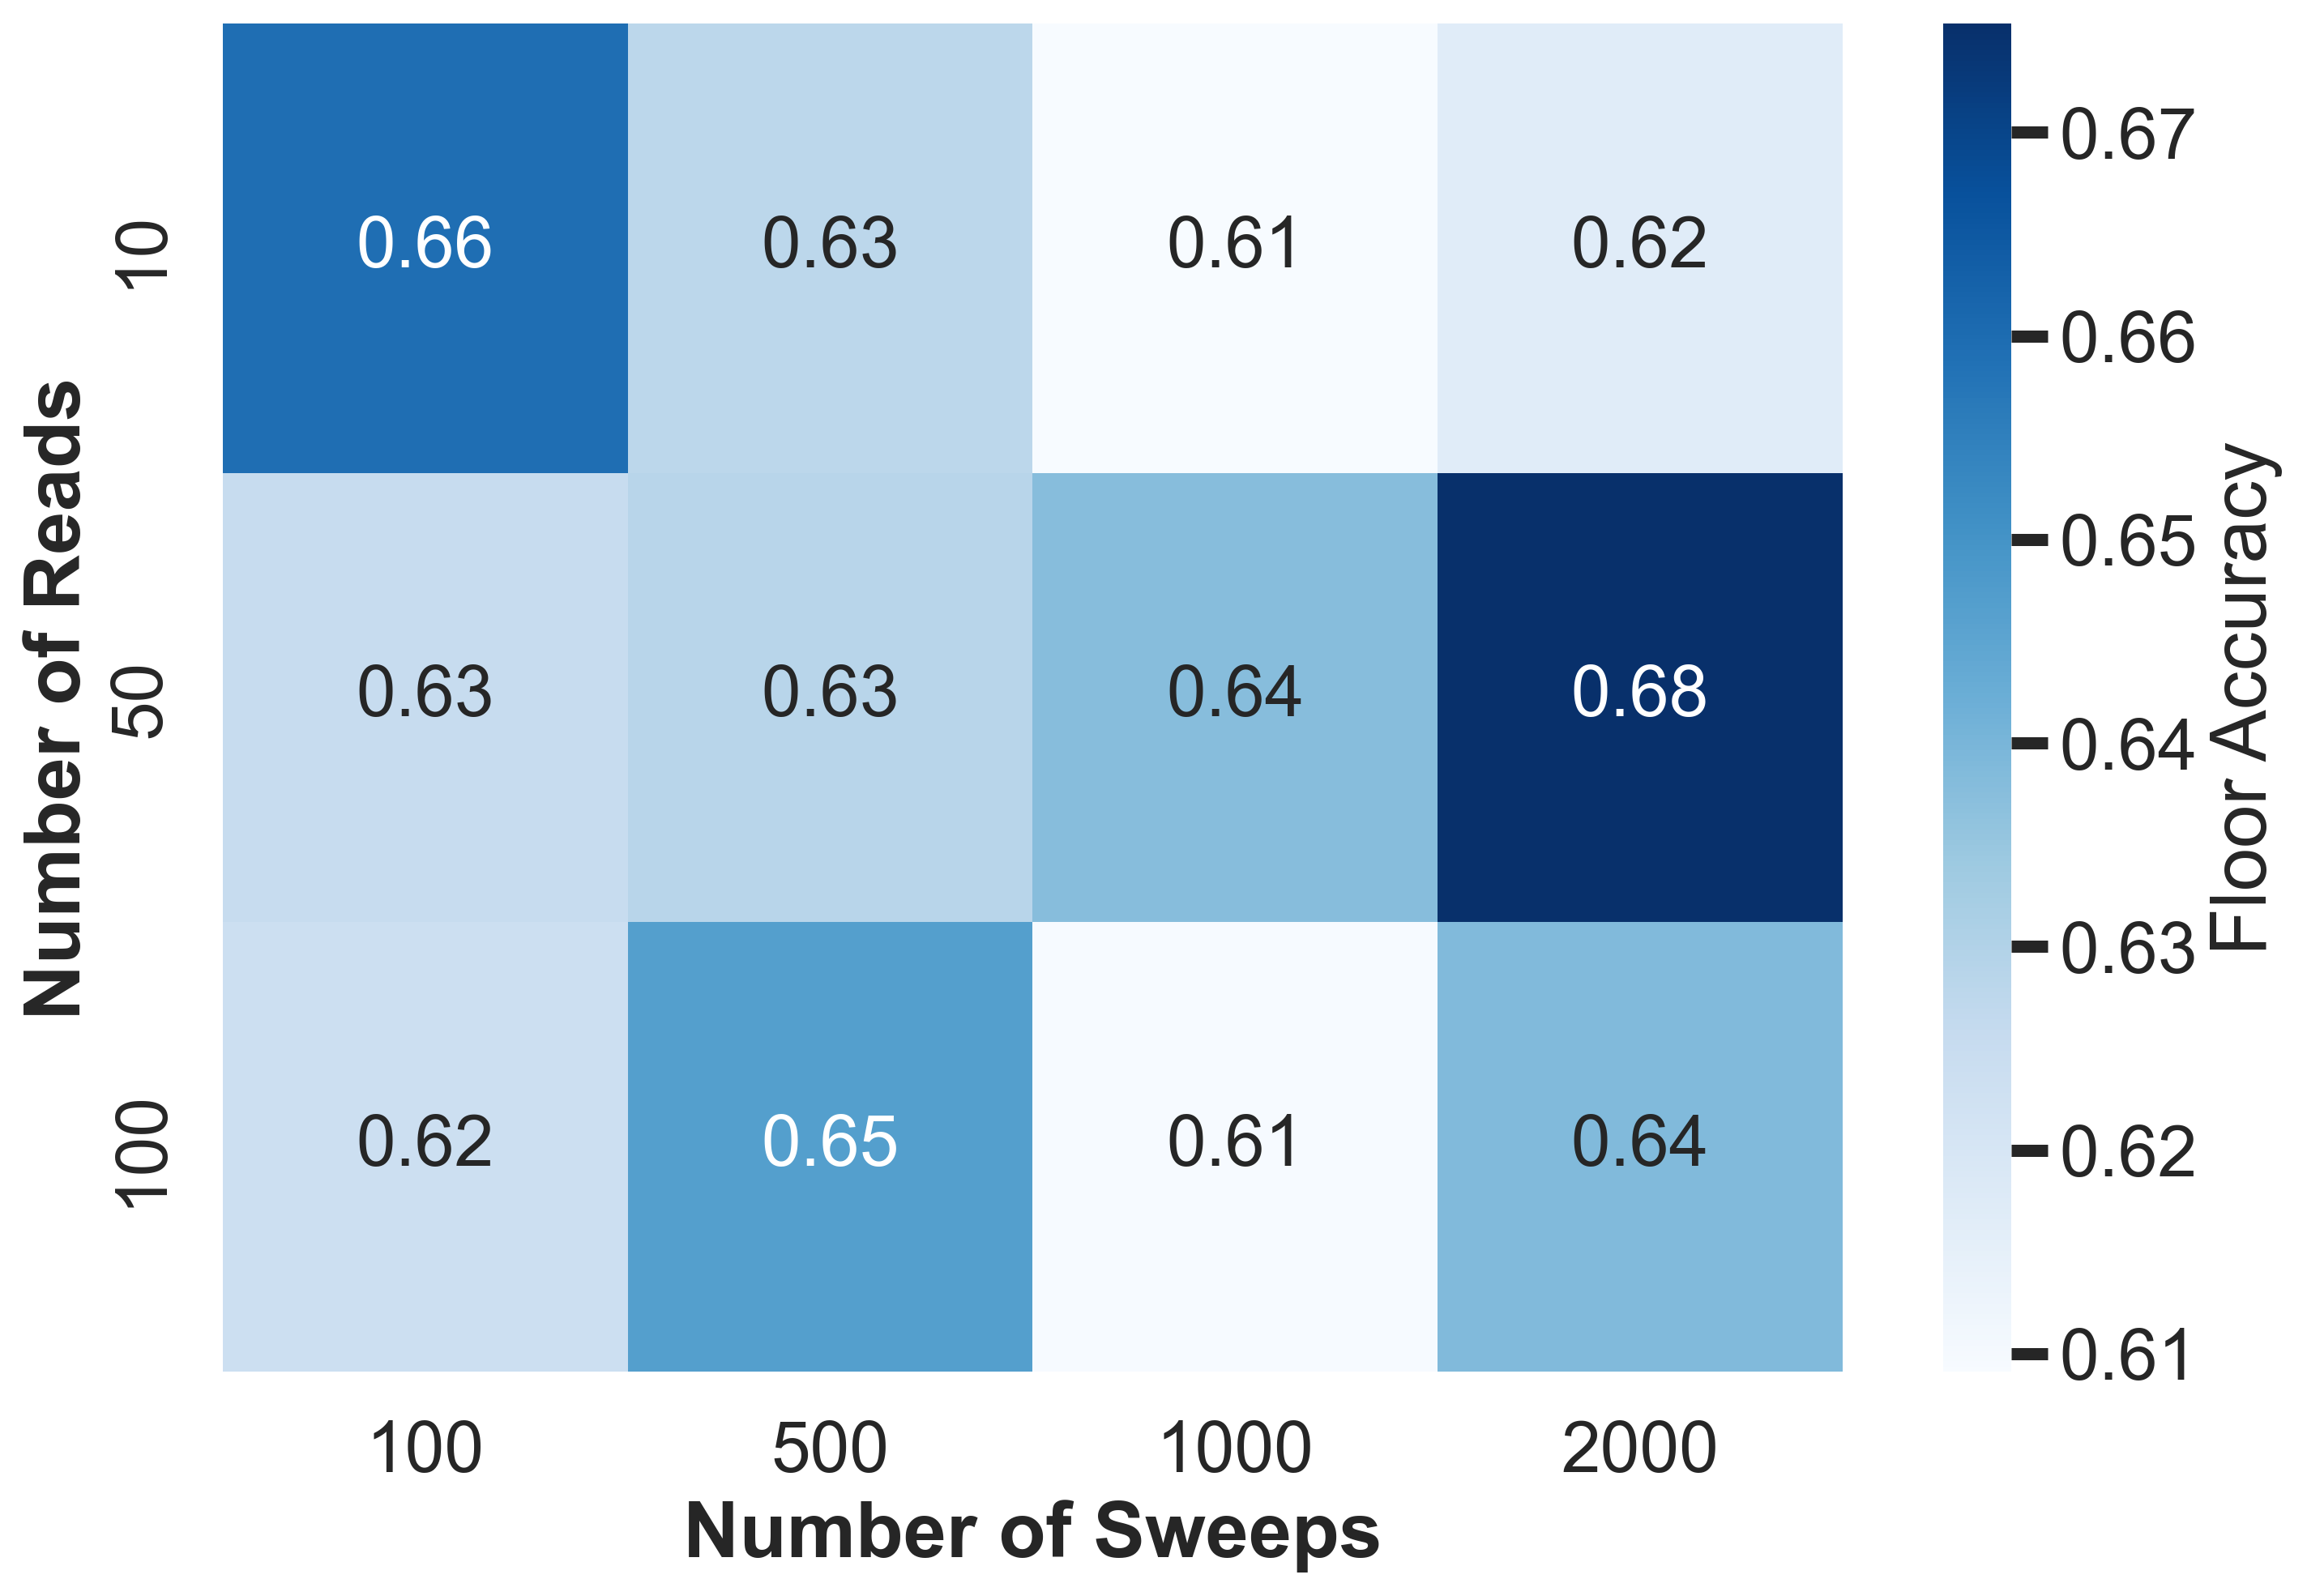

✓ Heatmap 4 saved: heatmap4_floor_acc_sweeps_reads.png


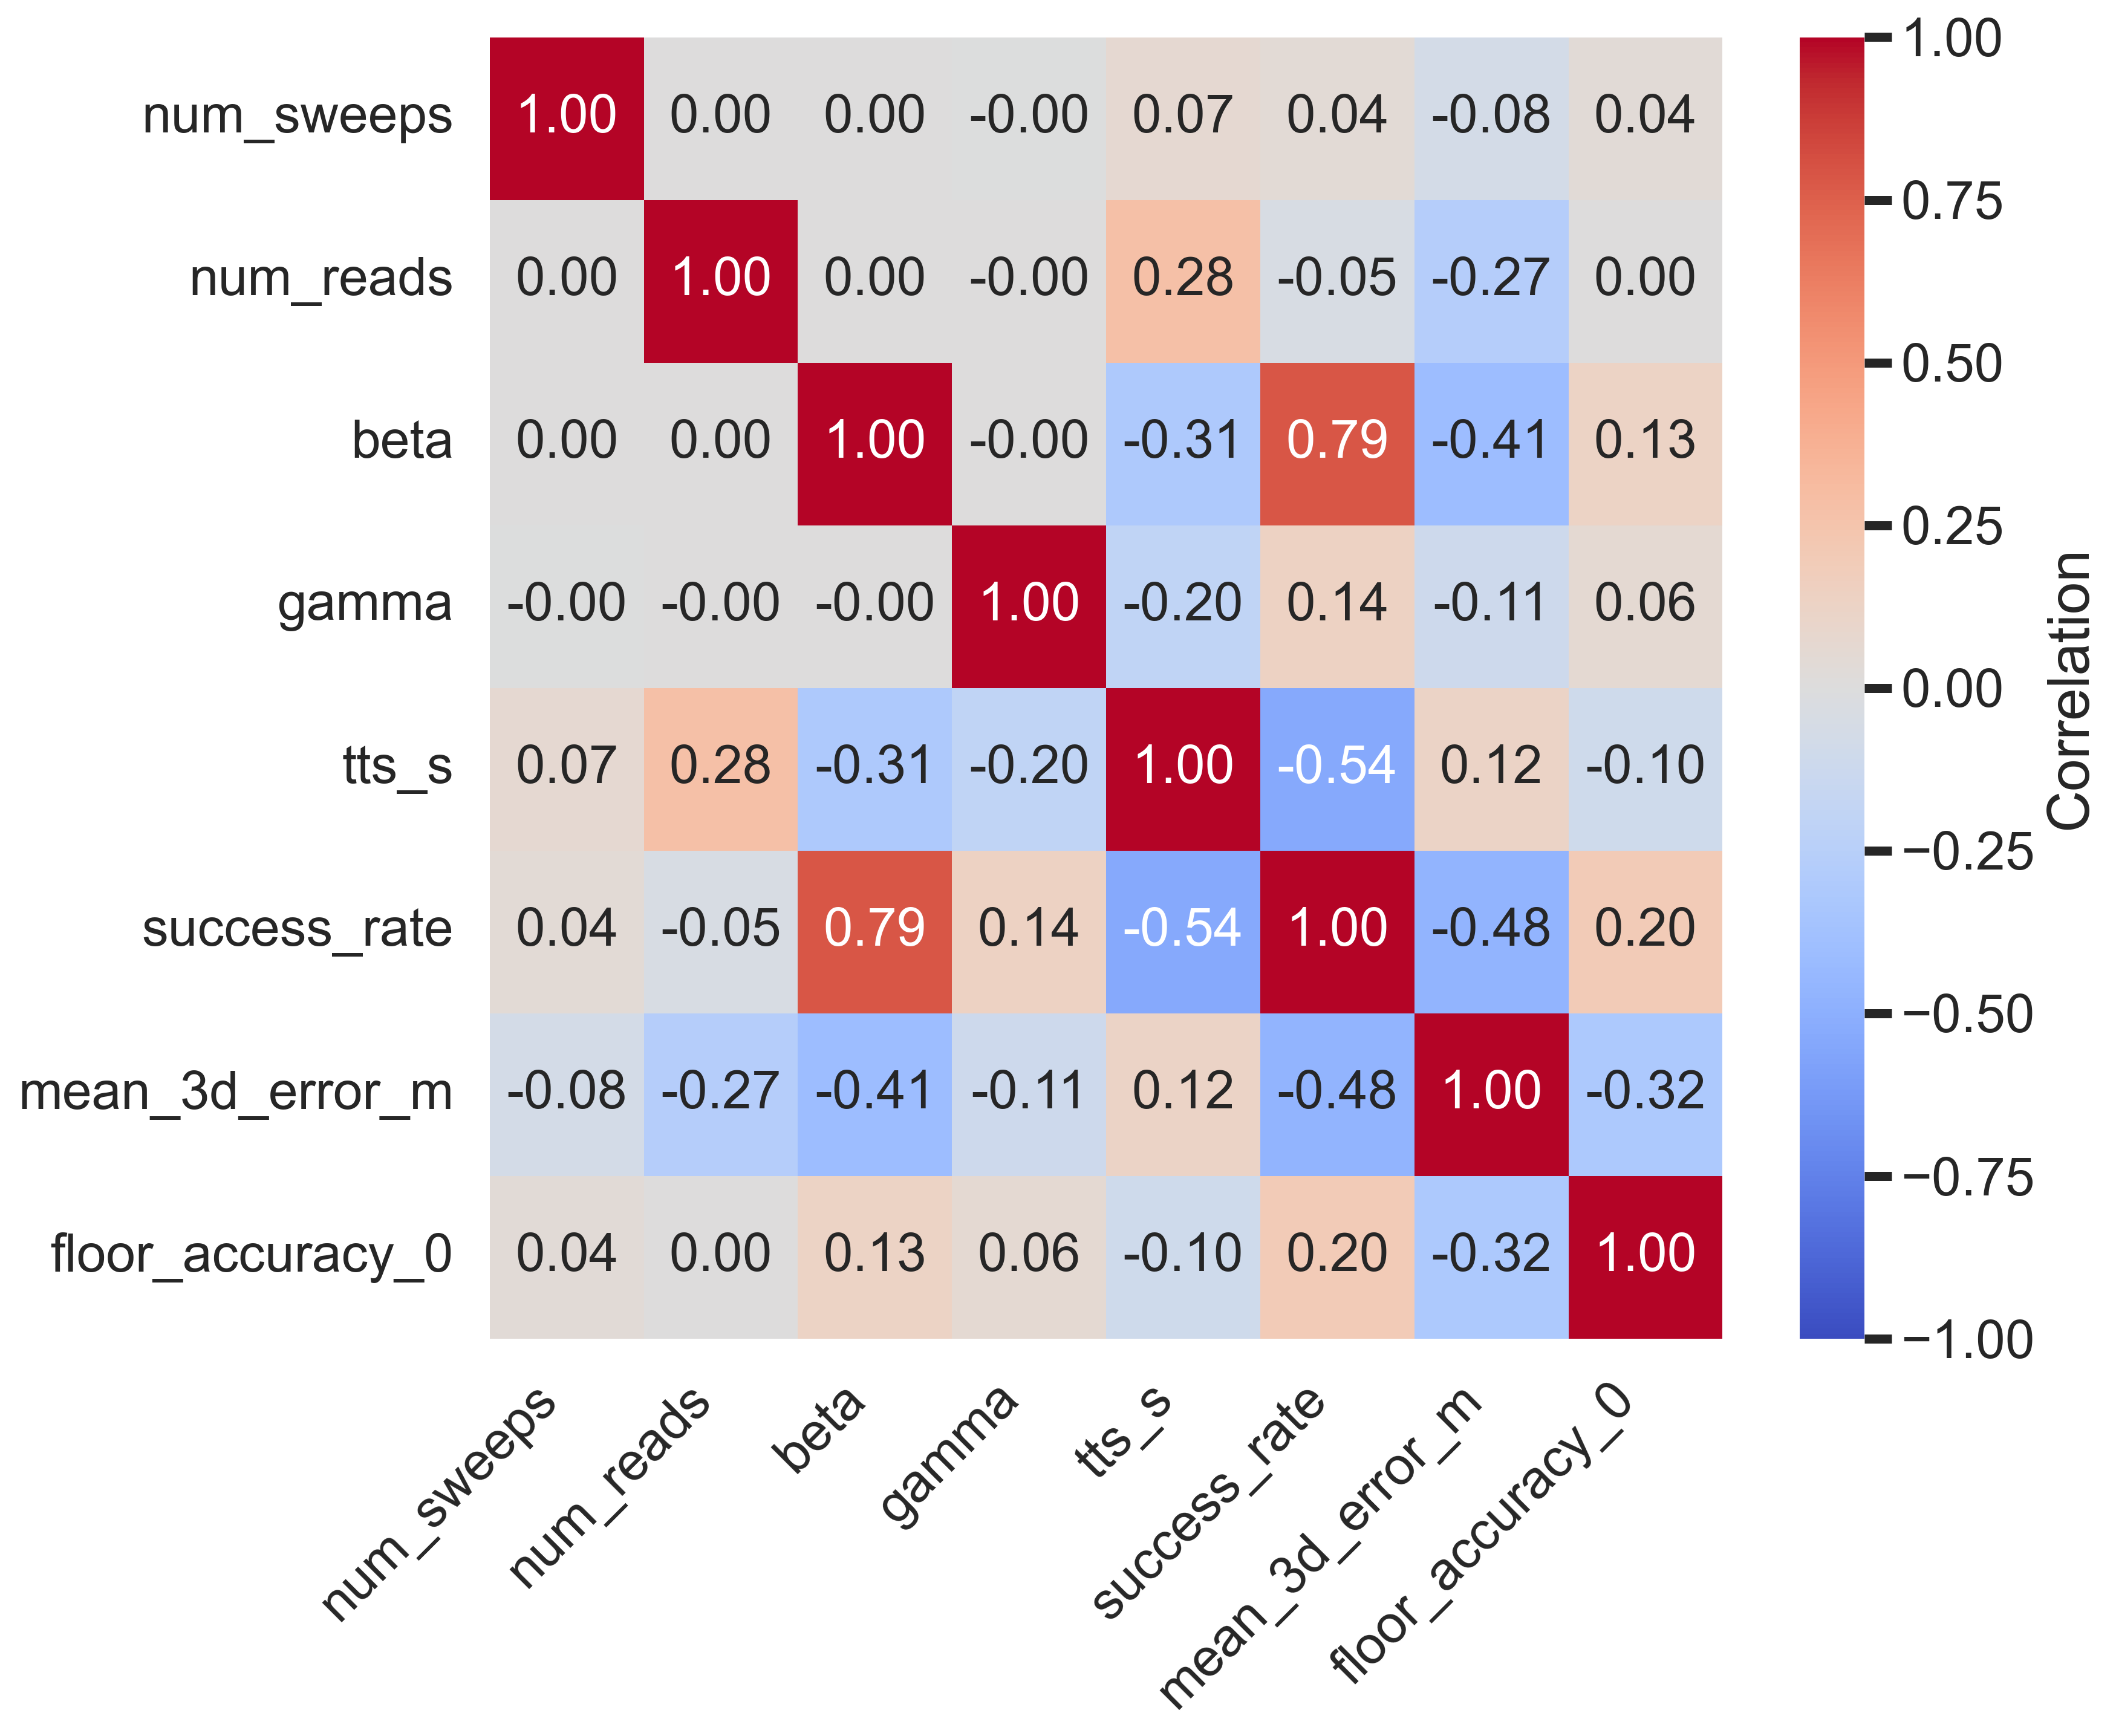

✓ Heatmap 5 saved: heatmap5_correlation_matrix.png


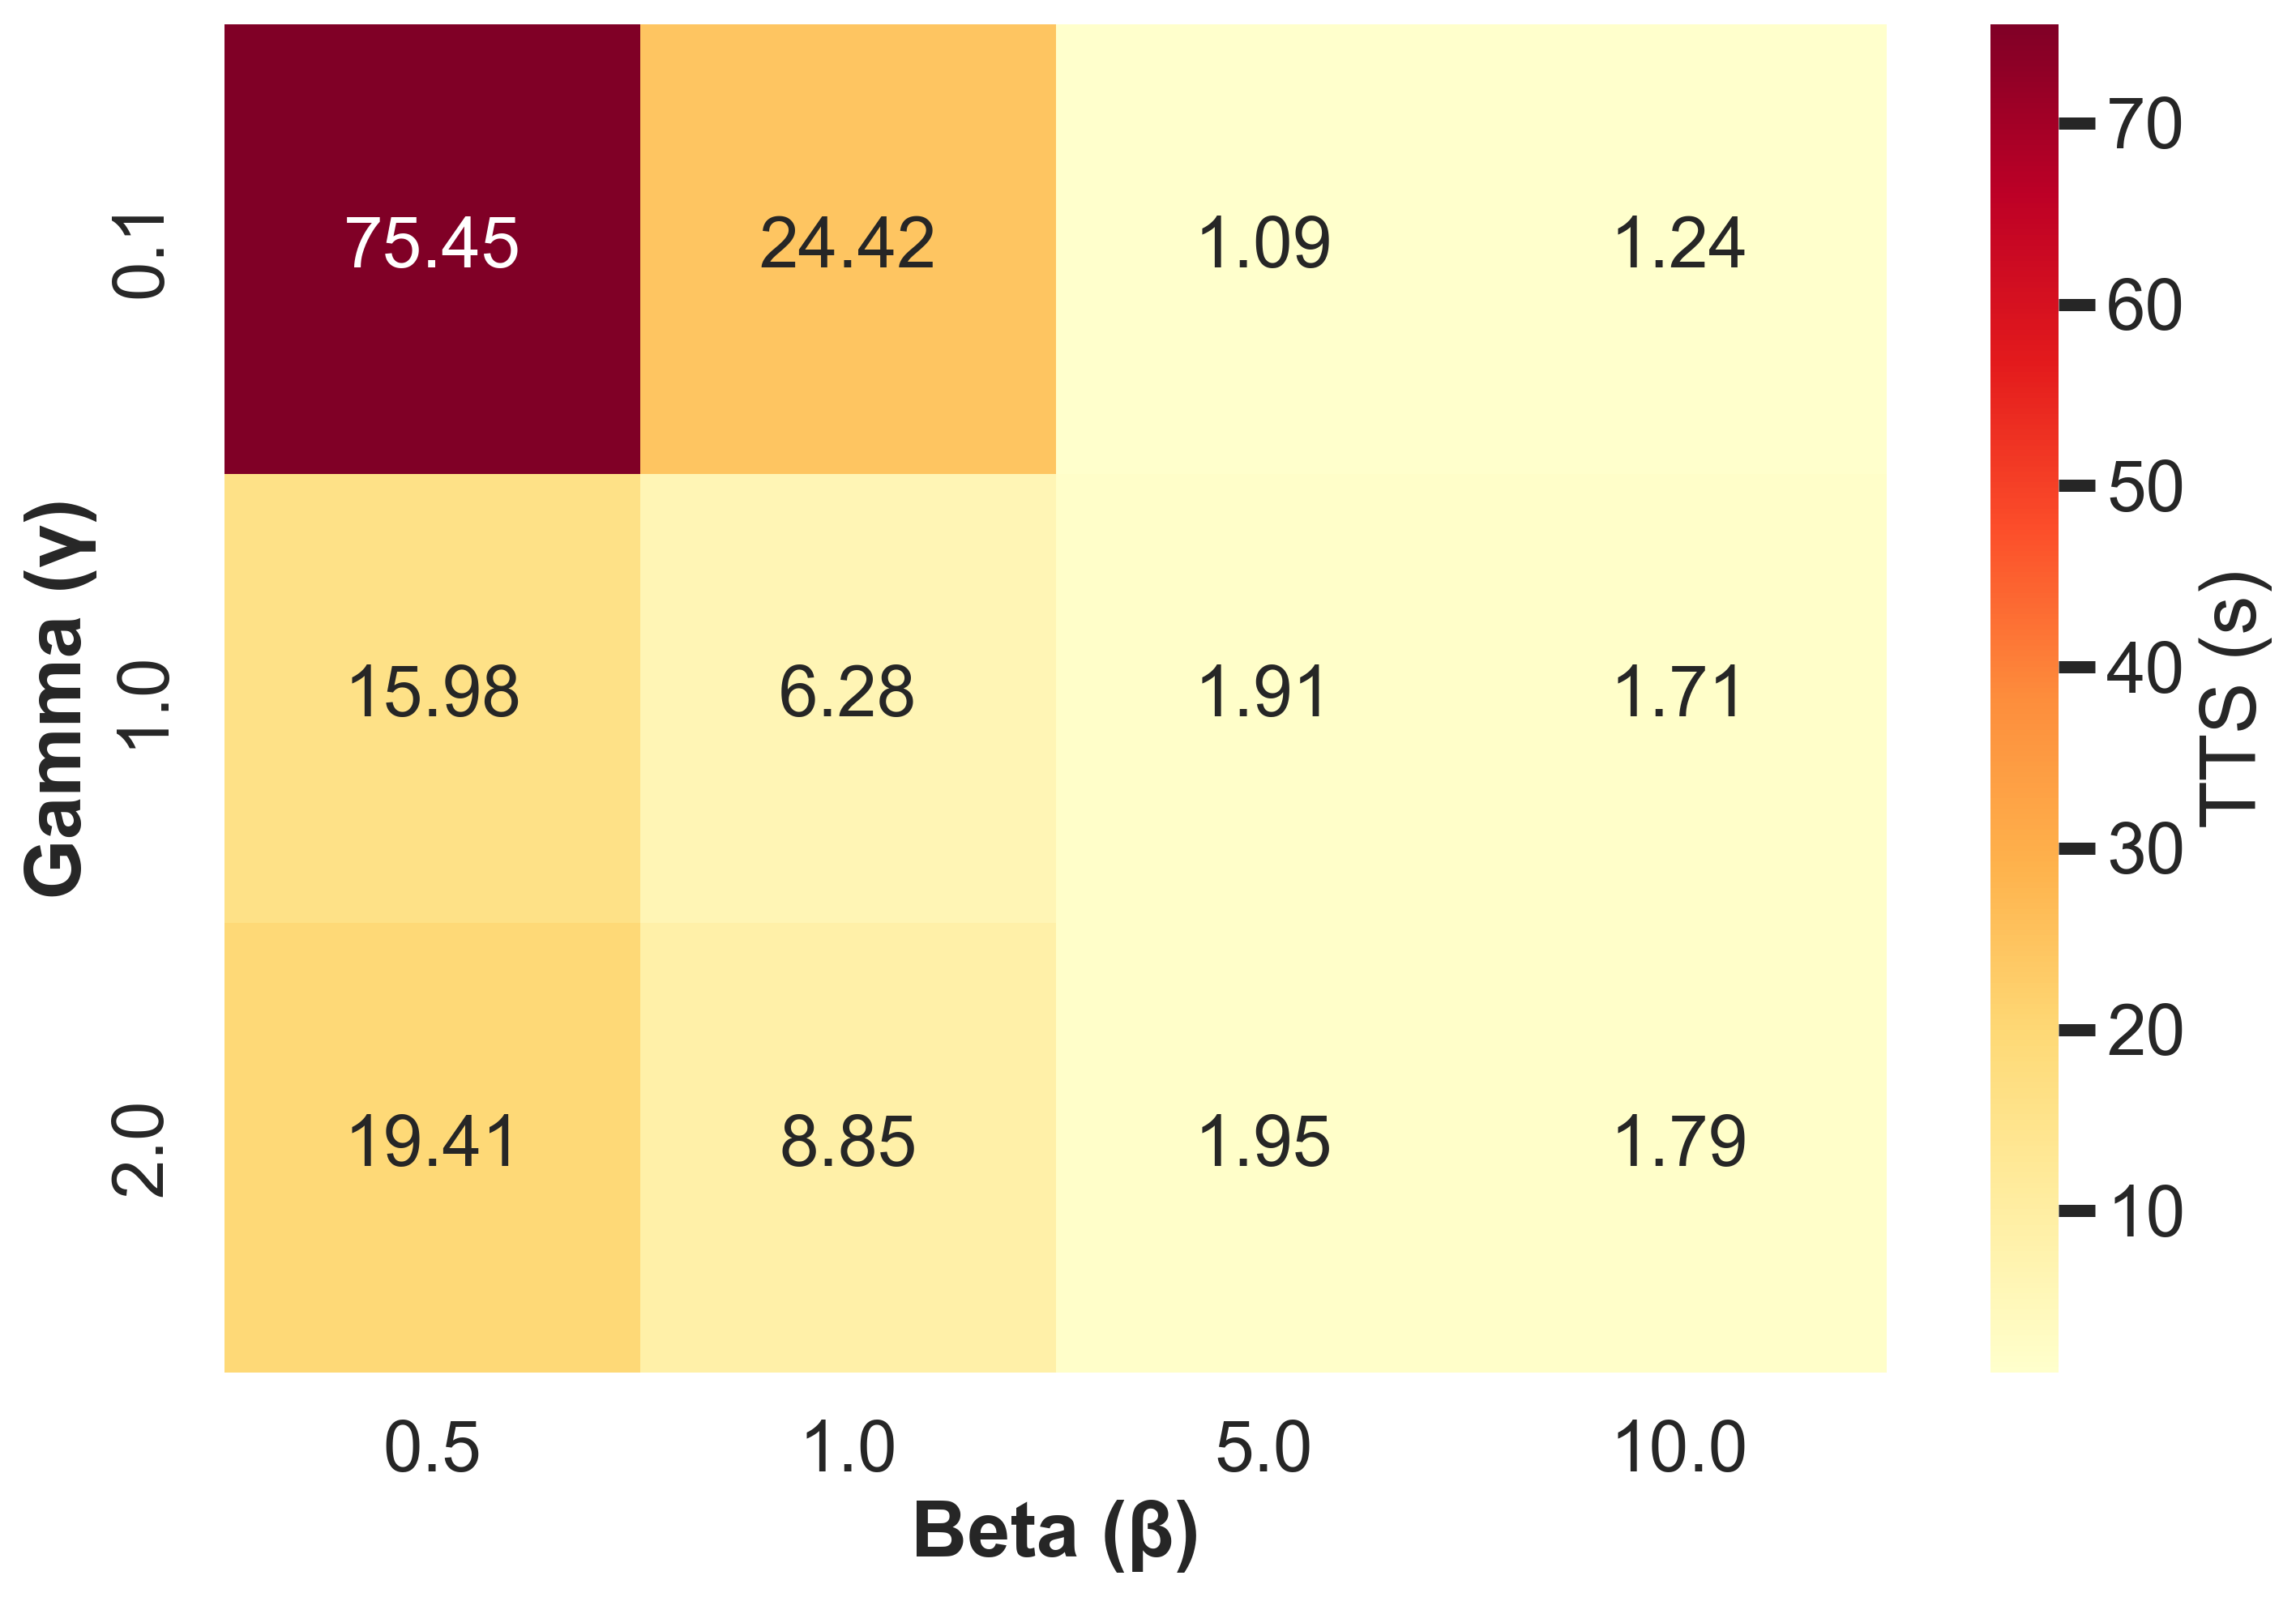

✓ Heatmap 6 saved: heatmap6_tts_beta_gamma.png

✓ All 6 heatmaps saved as individual plots


In [18]:
# ============================================================================
# PHASE 2 PARAMETER INTERACTION HEATMAPS (INDIVIDUAL PLOTS)
# ============================================================================

# Heatmap 1: TTS (sweeps vs reads)
fig1, ax1 = plt.subplots(figsize=(10, 7))
pivot1 = phase2_finite.pivot_table(values='tts_s', index='num_reads', 
                                    columns='num_sweeps', aggfunc='mean')
sns.heatmap(pivot1, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax1,
            cbar_kws={'label': 'TTS (s)'})
ax1.set_xlabel('Number of Sweeps', fontweight='bold')
ax1.set_ylabel('Number of Reads', fontweight='bold')
plt.tight_layout()
plt.savefig(output_dir / 'heatmap1_tts_sweeps_reads.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Heatmap 1 saved: heatmap1_tts_sweeps_reads.png")

# Heatmap 2: Success Rate (beta vs gamma)
fig2, ax2 = plt.subplots(figsize=(10, 7))
pivot2 = phase2_finite.pivot_table(values='success_rate', index='gamma', 
                                    columns='beta', aggfunc='mean')
sns.heatmap(pivot2, annot=True, fmt='.2f', cmap='RdYlGn', ax=ax2,
            cbar_kws={'label': 'Success Rate'}, vmin=0, vmax=1)
ax2.set_title('Success Rate: Beta × Gamma', fontsize=14, fontweight='bold')
ax2.set_xlabel('Beta (β)', fontweight='bold')
ax2.set_ylabel('Gamma (γ)', fontweight='bold')
plt.tight_layout()
plt.savefig(output_dir / 'heatmap2_success_beta_gamma.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Heatmap 2 saved: heatmap2_success_beta_gamma.png")

# Heatmap 3: Mean 3D Error (beta vs gamma)
fig3, ax3 = plt.subplots(figsize=(10, 7))
pivot3 = phase2_finite.pivot_table(values='mean_3d_error_m', index='gamma', 
                                    columns='beta', aggfunc='mean')
sns.heatmap(pivot3, annot=True, fmt='.1f', cmap='RdYlGn_r', ax=ax3,
            cbar_kws={'label': 'Mean 3D Error (m)'})
ax3.set_xlabel('Beta (β)', fontweight='bold')
ax3.set_ylabel('Gamma (γ)', fontweight='bold')
plt.tight_layout()
plt.savefig(output_dir / 'heatmap3_error_beta_gamma.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Heatmap 3 saved: heatmap3_error_beta_gamma.png")

# Heatmap 4: Floor Accuracy (sweeps vs reads)
fig4, ax4 = plt.subplots(figsize=(10, 7))
pivot4 = phase2_finite.pivot_table(values='floor_accuracy_0', index='num_reads', 
                                    columns='num_sweeps', aggfunc='mean')
sns.heatmap(pivot4, annot=True, fmt='.2f', cmap='Blues', ax=ax4,
            cbar_kws={'label': 'Floor Accuracy'})
ax4.set_xlabel('Number of Sweeps', fontweight='bold')
ax4.set_ylabel('Number of Reads', fontweight='bold')
plt.tight_layout()
plt.savefig(output_dir / 'heatmap4_floor_acc_sweeps_reads.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Heatmap 4 saved: heatmap4_floor_acc_sweeps_reads.png")

# Heatmap 5: Correlation matrix
fig5, ax5 = plt.subplots(figsize=(12, 10))
corr_cols = ['num_sweeps', 'num_reads', 'beta', 'gamma', 'tts_s', 
             'success_rate', 'mean_3d_error_m', 'floor_accuracy_0']
corr_matrix = phase2_finite[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=ax5, vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation'})
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')
ax5.set_yticklabels(ax5.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.savefig(output_dir / 'heatmap5_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Heatmap 5 saved: heatmap5_correlation_matrix.png")

# Heatmap 6: TTS (beta vs gamma)
fig6, ax6 = plt.subplots(figsize=(10, 7))
pivot6 = phase2_finite.pivot_table(values='tts_s', index='gamma', 
                                    columns='beta', aggfunc='mean')
sns.heatmap(pivot6, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax6,
            cbar_kws={'label': 'TTS (s)'})
ax6.set_xlabel('Beta (β)', fontweight='bold')
ax6.set_ylabel('Gamma (γ)', fontweight='bold')
plt.tight_layout()
plt.savefig(output_dir / 'heatmap6_tts_beta_gamma.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Heatmap 6 saved: heatmap6_tts_beta_gamma.png")

print("\n✓ All 6 heatmaps saved as individual plots")

## Figure B: Phase 2 Parameter Interaction Heatmaps (6-Panel)

## Figure 8: Gamma (Transverse Field) vs Floor Accuracy

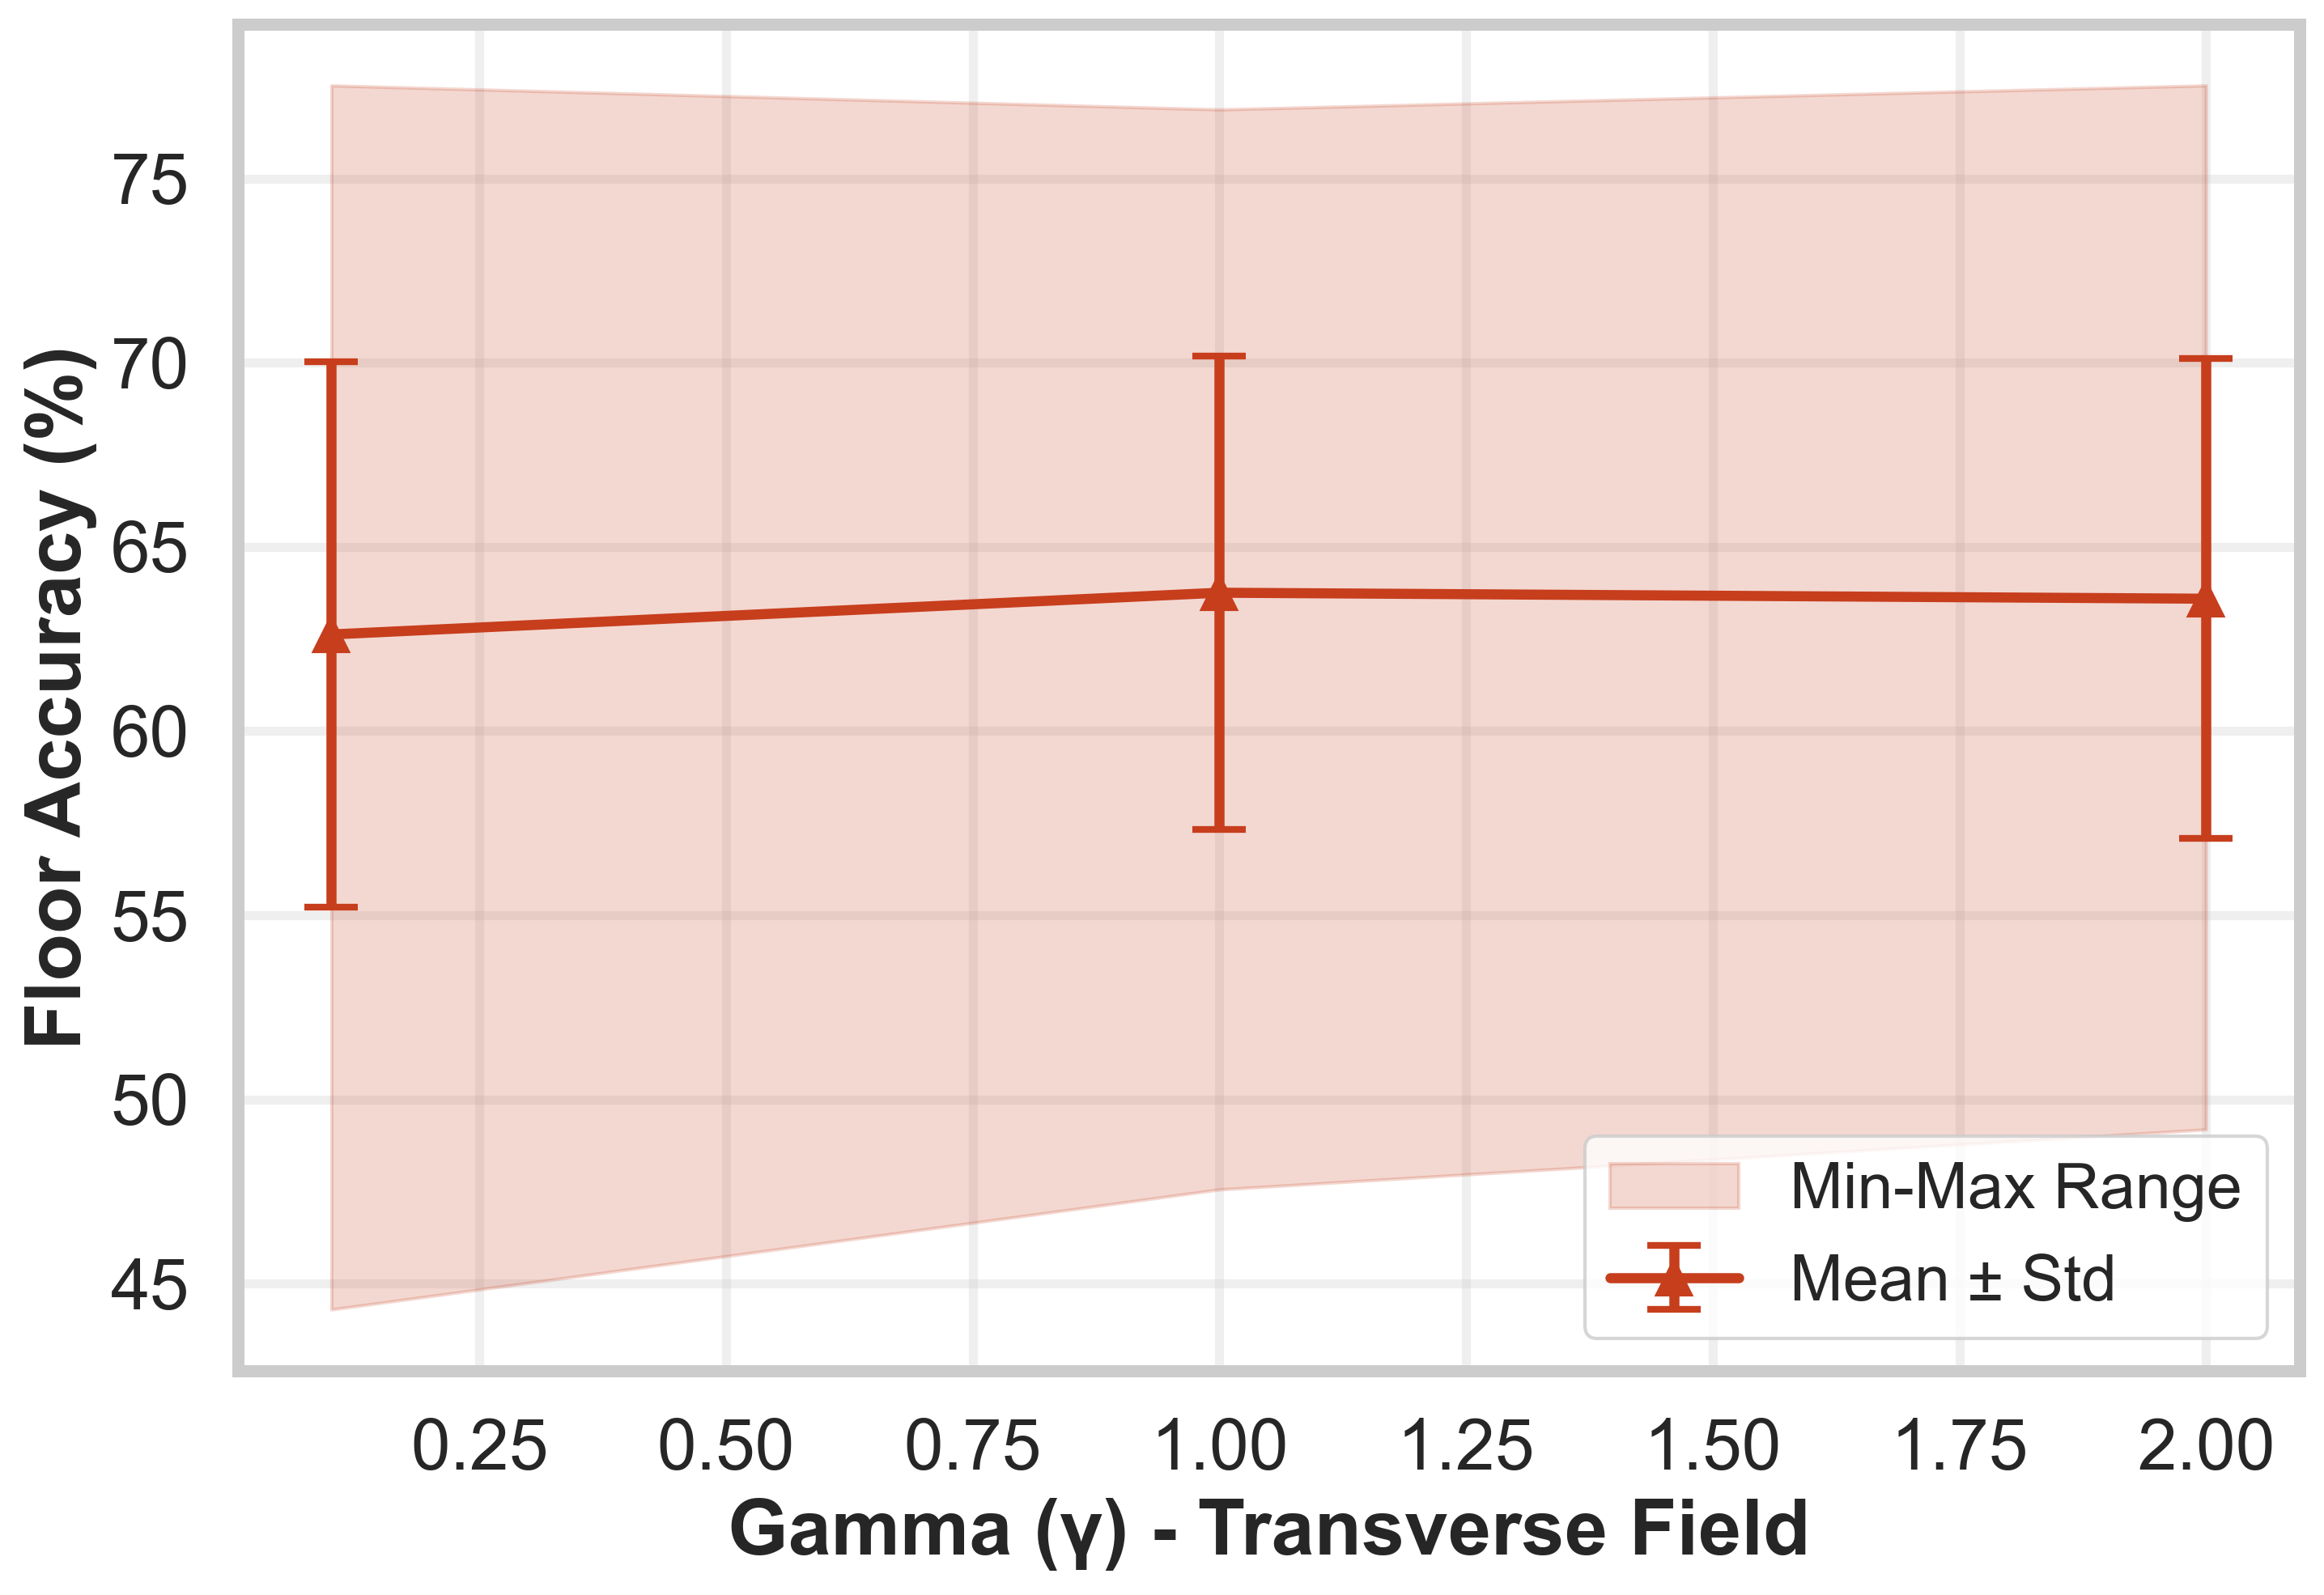

✓ Figure 8 saved: gamma_vs_floor_acc.png (with error bars)


In [19]:
fig, ax = plt.subplots(figsize=(10, 7))

# Aggregate with error bars
grouped = phase2_finite.groupby('gamma').agg({
    'floor_accuracy_0': ['mean', 'std', 'min', 'max']
}).reset_index()
grouped.columns = ['gamma', 'mean', 'std', 'min', 'max']
grouped['mean_pct'] = grouped['mean'] * 100
grouped['std_pct'] = grouped['std'] * 100
grouped['min_pct'] = grouped['min'] * 100
grouped['max_pct'] = grouped['max'] * 100

# Plot with error bars
ax.errorbar(grouped['gamma'], grouped['mean_pct'], yerr=grouped['std_pct'],
            marker='^', linewidth=3, capsize=8, capthick=2, 
            color='#C73E1D', markersize=10, label='Mean ± Std')

# Add shaded region for min/max range
ax.fill_between(grouped['gamma'], grouped['min_pct'], grouped['max_pct'],
                alpha=0.2, color='#C73E1D', label='Min-Max Range')

ax.set_xlabel('Gamma (γ) - Transverse Field', fontweight='bold')
ax.set_ylabel('Floor Accuracy (%)', fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'gamma_vs_floor_acc.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 8 saved: gamma_vs_floor_acc.png (with error bars)")

---
# Importance Metrics Comparison

Comparison of AP selection methods for k=20.

## Figure 9: Importance Method vs Median 3D Error

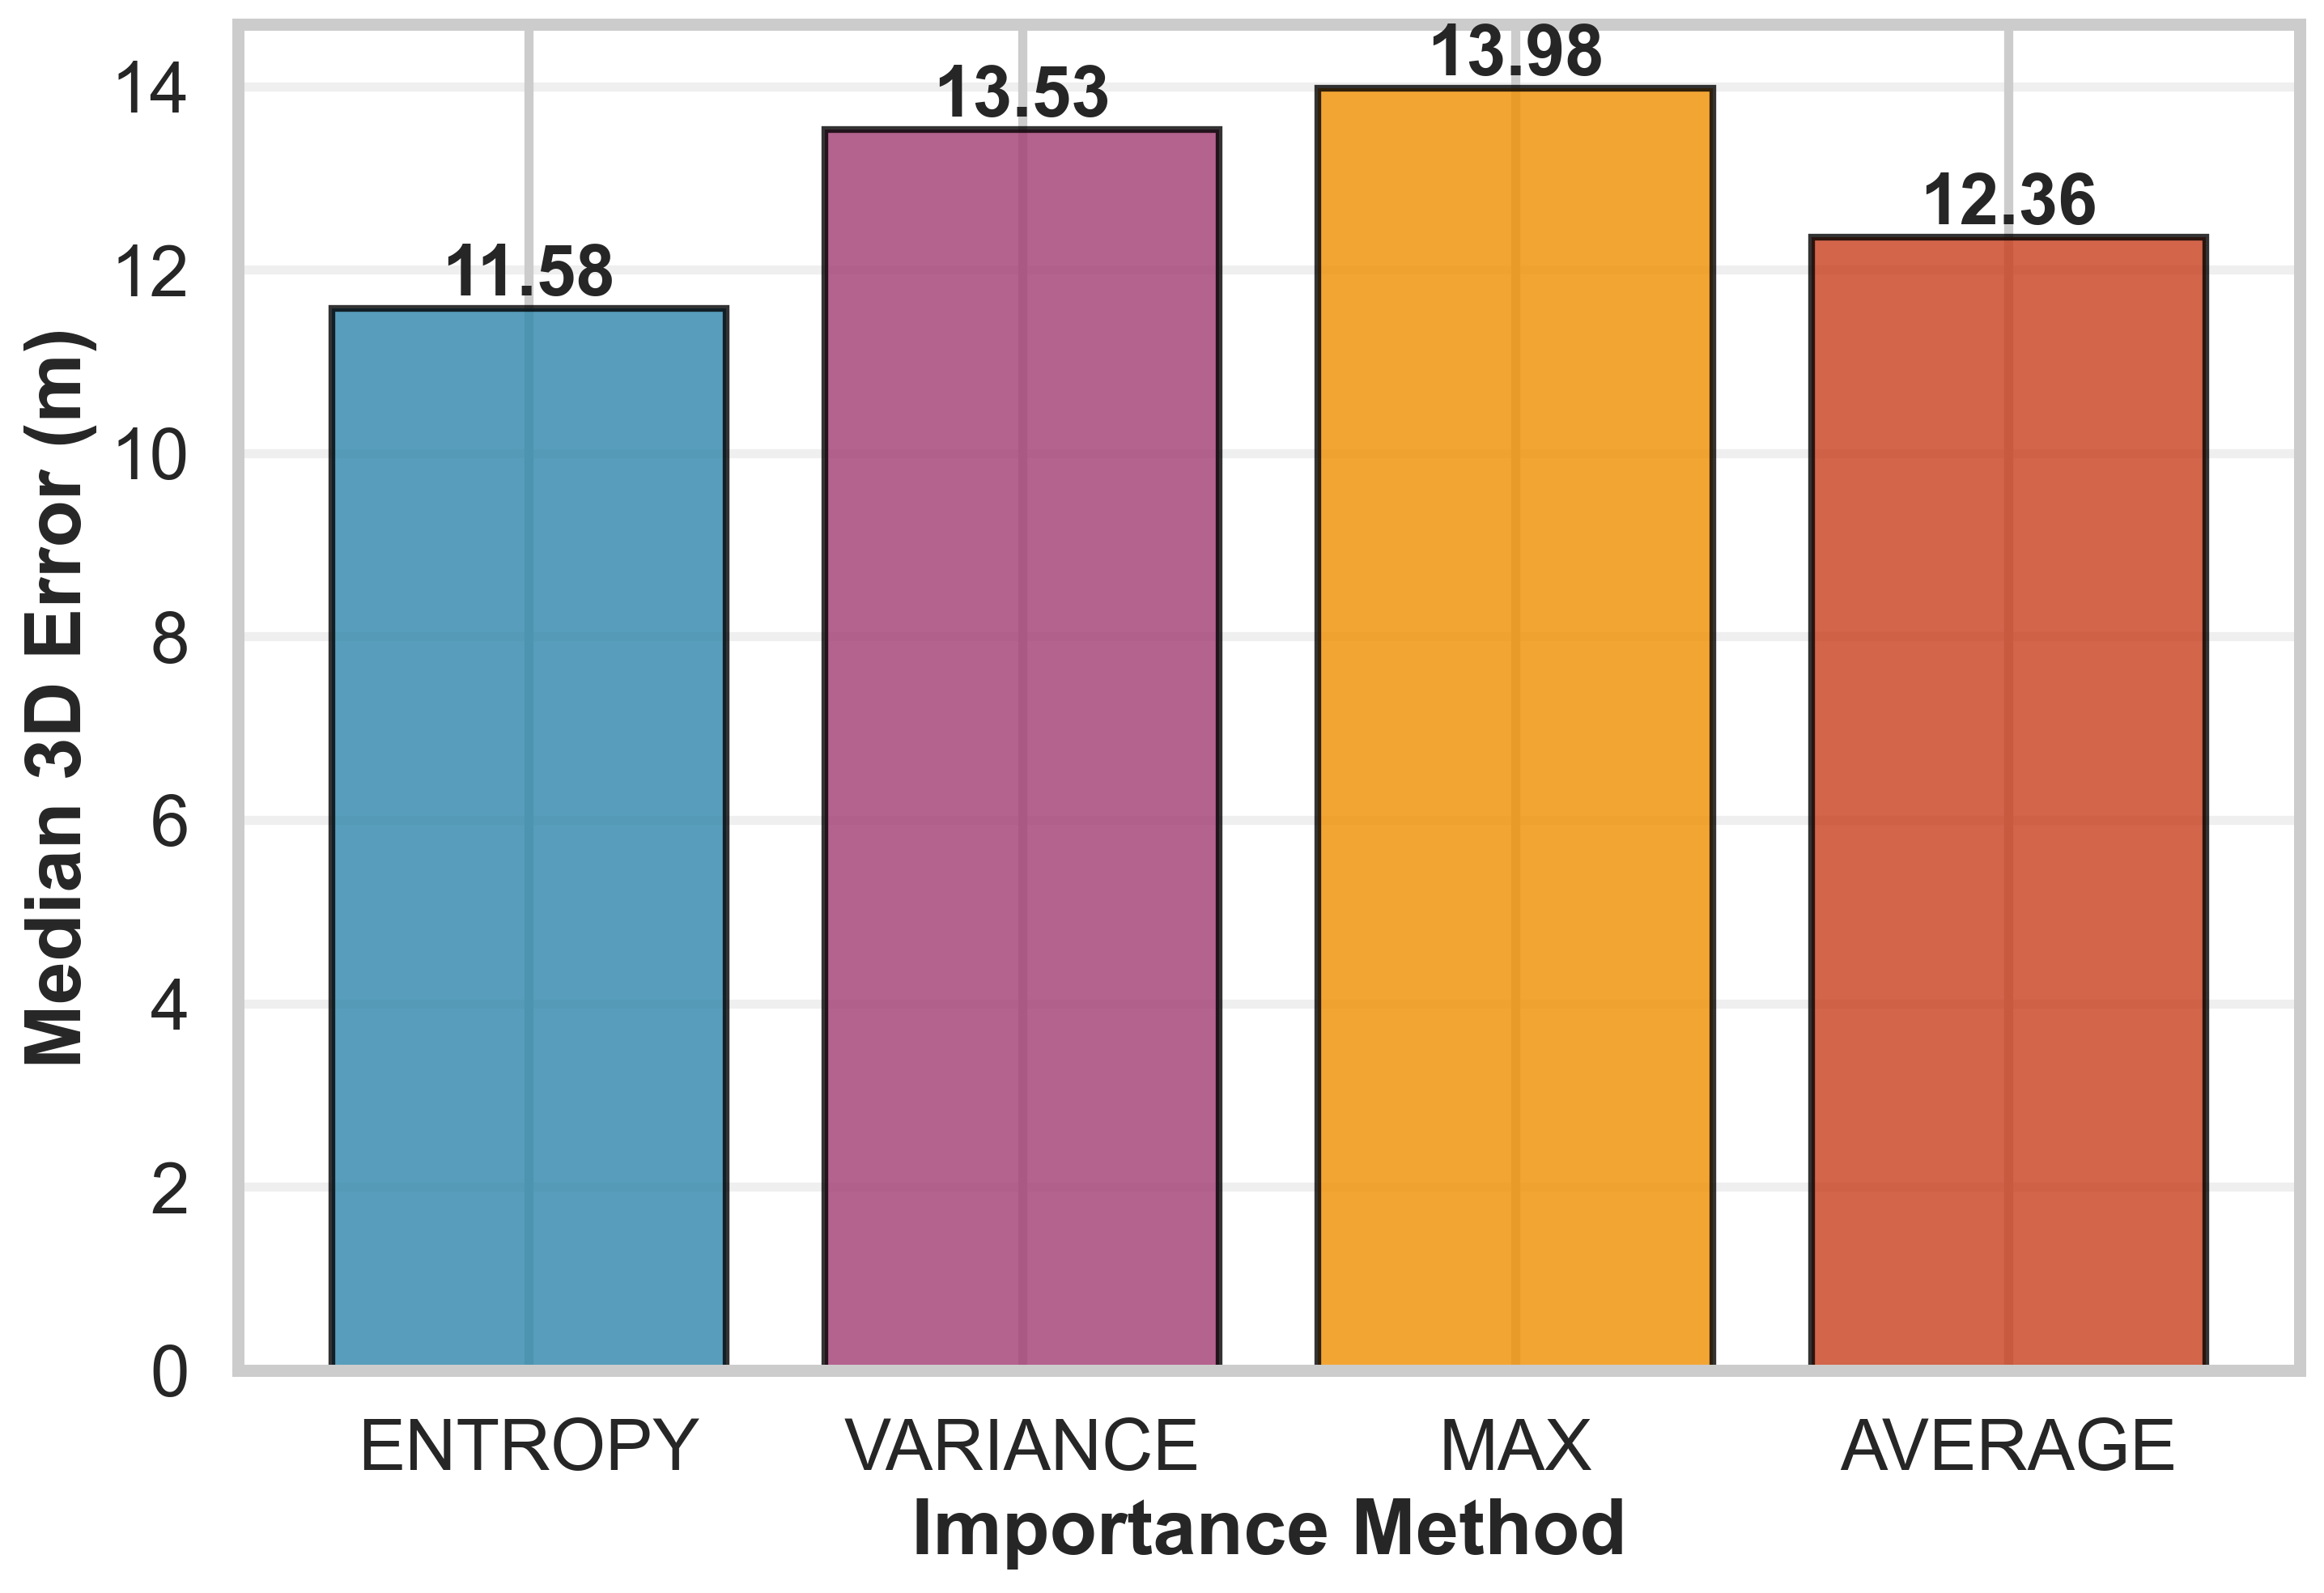

✓ Figure 9 saved: method_vs_error.png


In [20]:
fig, ax = plt.subplots(figsize=(10, 7))

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
bars = ax.bar(k20_df['Importance_Method'], k20_df['Median_3D_Error_m'], 
              color=colors, edgecolor='black', linewidth=2, alpha=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Importance Method', fontweight='bold')
ax.set_ylabel('Median 3D Error (m)', fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(output_dir / 'method_vs_error.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 9 saved: method_vs_error.png")

## Figure 10: Importance Method vs Floor Accuracy

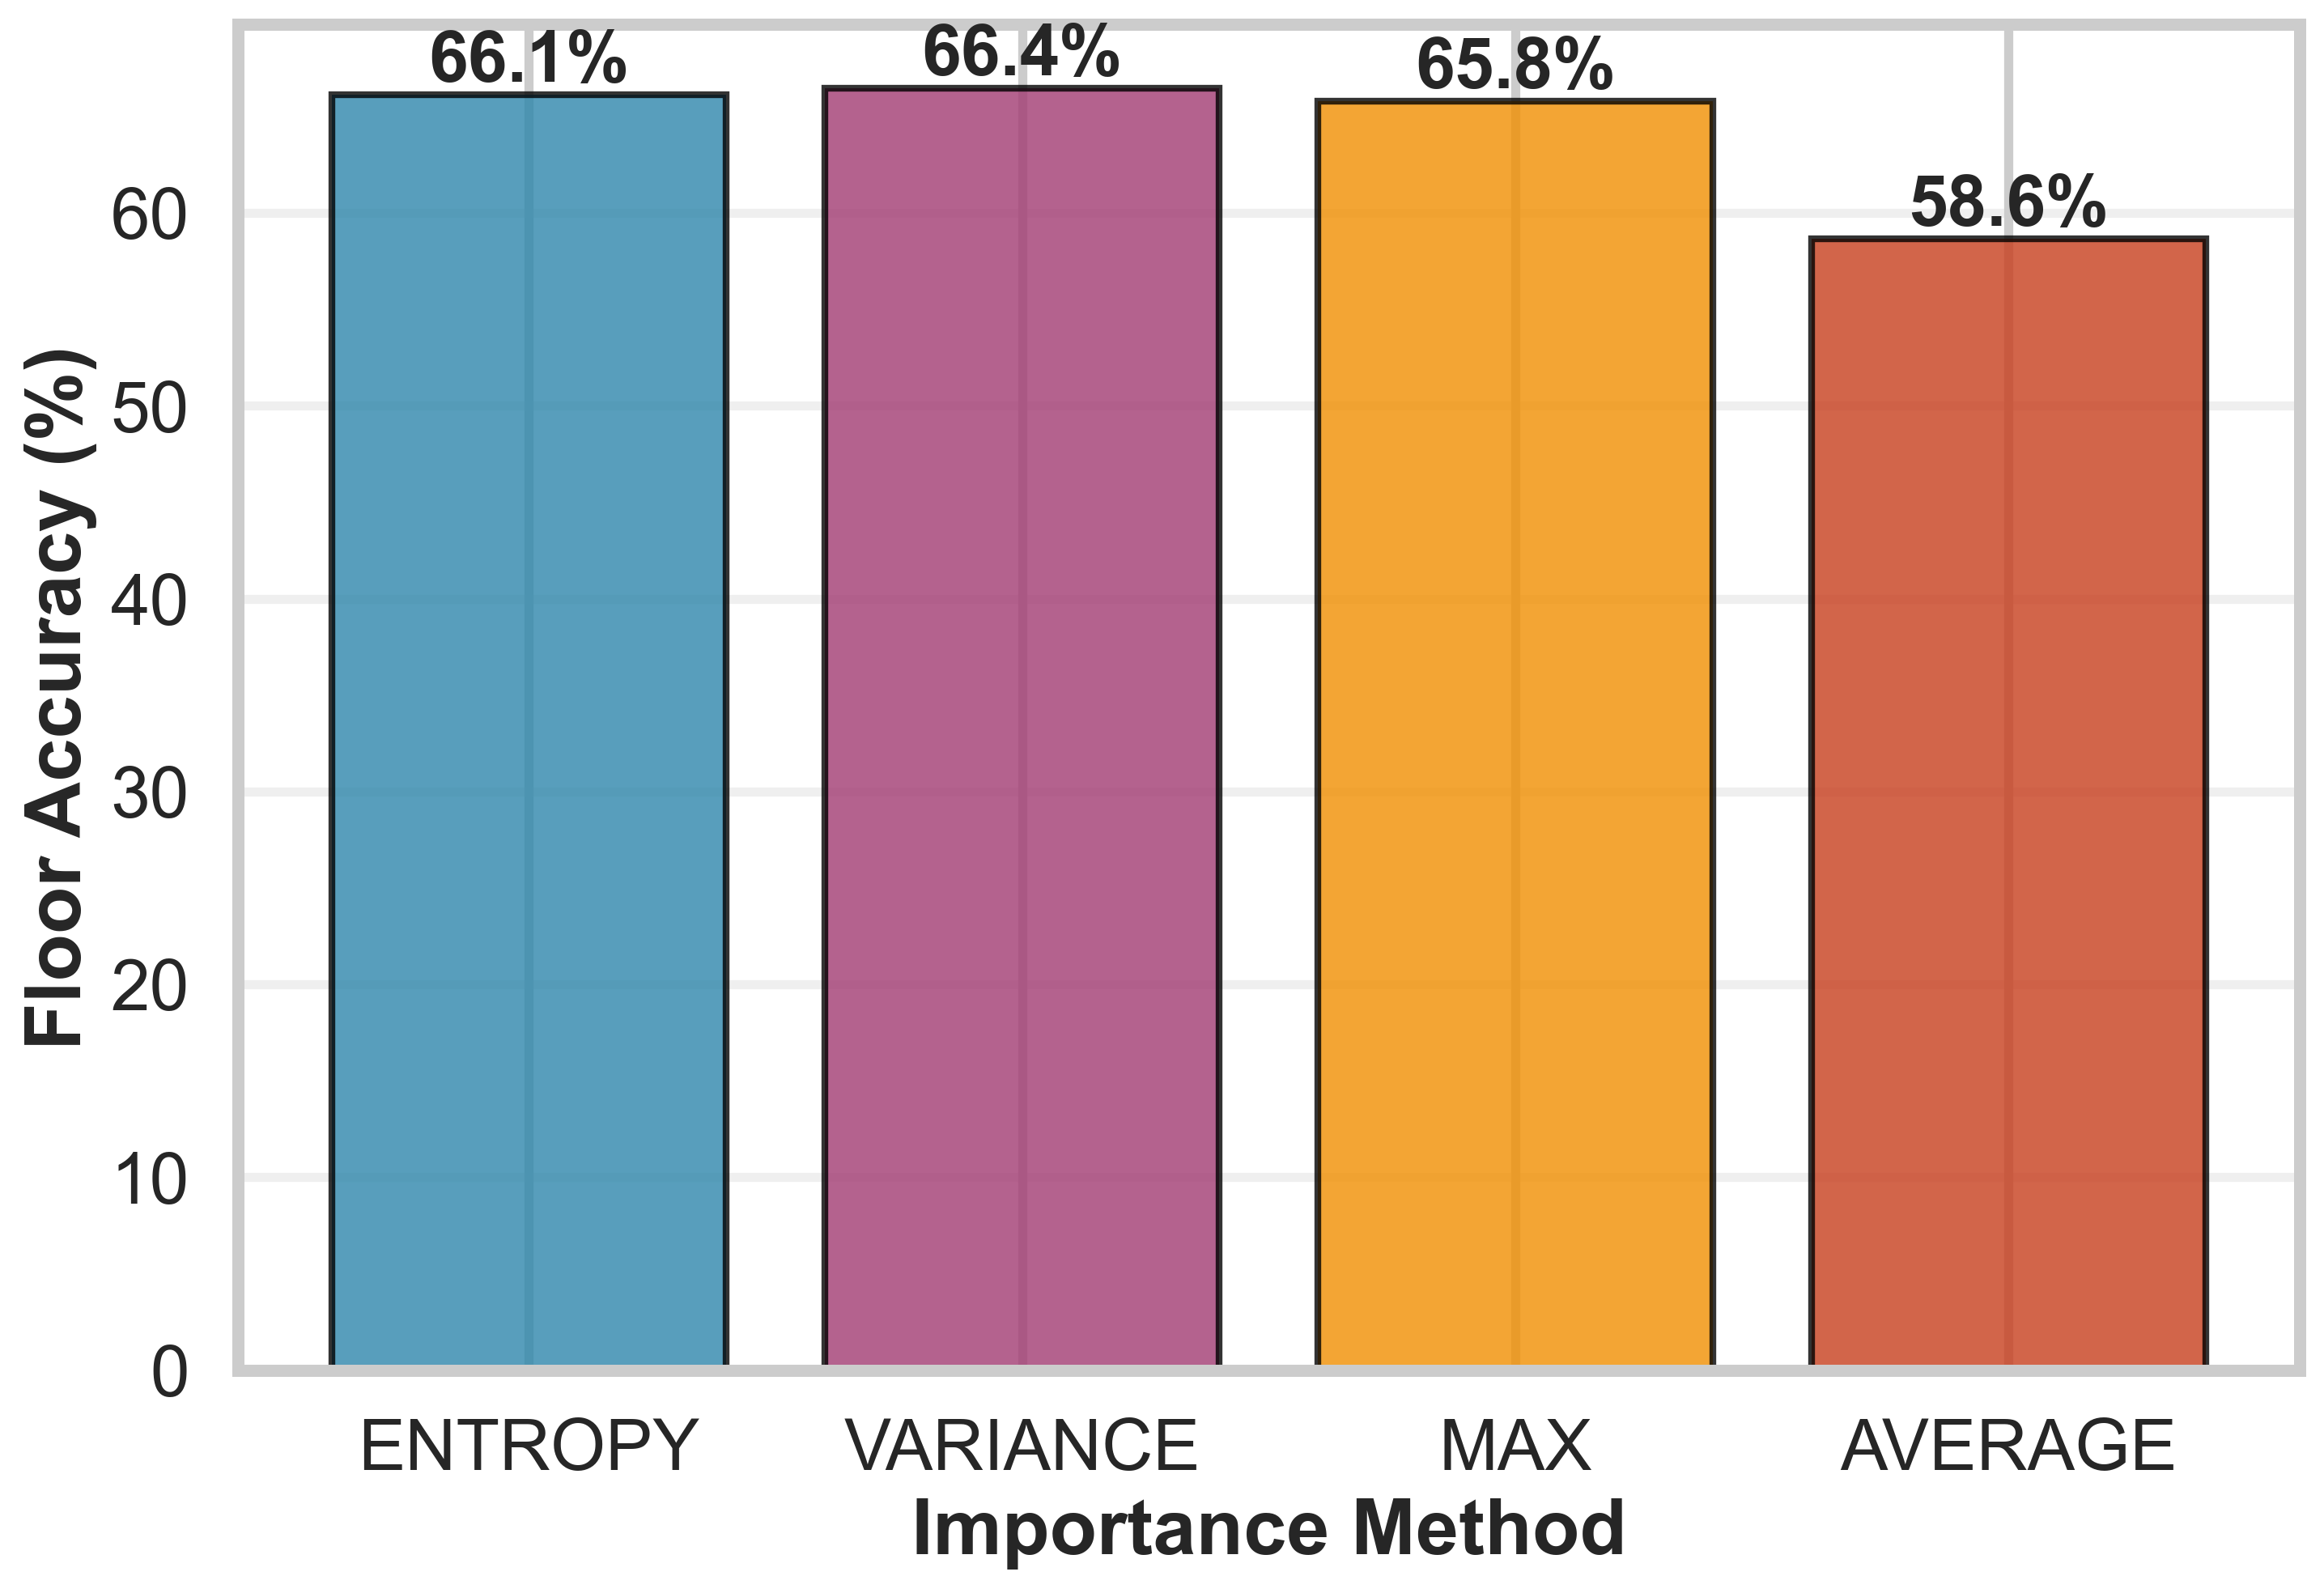

✓ Figure 10 saved: method_vs_floor_acc.png


In [21]:
fig, ax = plt.subplots(figsize=(10, 7))

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
bars = ax.bar(k20_df['Importance_Method'], k20_df['Floor_Accuracy_Exact_Pct'], 
              color=colors, edgecolor='black', linewidth=2, alpha=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Importance Method', fontweight='bold')
ax.set_ylabel('Floor Accuracy (%)', fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(output_dir / 'method_vs_floor_acc.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 10 saved: method_vs_floor_acc.png")

---
## Summary

In [22]:
print("="*80)
print("PAPER VISUALIZATION GENERATION COMPLETE")
print("="*80)
print(f"\nAll figures saved to: {output_dir}")
print(f"  Resolution: 300 DPI")
print(f"  Format: PNG (publication-ready)")
print("\n" + "="*80)
print("VISUALIZATION SUMMARY")
print("="*80)
print("\n📊 BASIC FIGURES (with Error Bars & Confidence Intervals):")
print("  ✓ Figure 1: k vs Mean 3D Error")
print("  ✓ Figure 2: k vs Floor Accuracy")
print("  ✓ Figure 3: Alpha vs Mean 3D Error")
print("  ✓ Figure 4: Penalty vs Floor Accuracy")
print("  ✓ Figure 5: Sweeps vs Time-to-Solution (TTS)")
print("  ✓ Figure 6: Reads vs Success Rate")
print("  ✓ Figure 7: Beta vs Mean 3D Error")
print("  ✓ Figure 8: Gamma vs Floor Accuracy")
print("  ✓ Figure 9: Importance Method vs Median Error")
print("  ✓ Figure 10: Importance Method vs Floor Accuracy")
print("\n📈 ADVANCED COMPREHENSIVE FIGURES:")
print("  ✓ Figure A: Comprehensive 4-Panel Phase 1 Analysis")
print("     - Error trends with uncertainty")
print("     - Parameter interaction heatmap (k × α)")
print("     - Error distribution violin plots")
print("     - Error vs Accuracy correlation")
print("\n🔥 ADVANCED HEATMAP ANALYSIS:")
print("  ✓ Figure B: Phase 2 Parameter Interaction (6-Panel)")
print("     - TTS: Sweeps × Reads")
print("     - Success Rate: Beta × Gamma")
print("     - Positioning Error: Beta × Gamma")
print("     - Floor Accuracy: Sweeps × Reads")
print("     - Full correlation matrix")
print("     - TTS: Beta × Gamma")
print("\n📊 STATISTICAL ANALYSIS:")
print("  ✓ Figure C: Statistical Comparison (2-Panel)")
print("     - Performance comparison with significance annotations")
print("     - Multi-metric normalized comparison")
print("\n⚡ PARETO FRONT ANALYSIS:")
print("  ✓ Figure D: Multi-Objective Optimization (2-Panel)")
print("     - Phase 2: TTS vs Accuracy trade-off")
print("     - Phase 1: Error vs Accuracy trade-off")
print("\n" + "="*80)
print(f"TOTAL: 18 publication-ready figures generated")
print("  - 10 Basic parameter analysis figures (with error bars)")
print("  - 4 Comprehensive multi-panel figures")
print("  - 4 Advanced analysis figures")
print("="*80)

PAPER VISUALIZATION GENERATION COMPLETE

All figures saved to: c:\Users\AUC\Desktop\Thesis\Quantum-Optimization-In-AP-Selection\data\results\visualizations\paper
  Resolution: 300 DPI
  Format: PNG (publication-ready)

VISUALIZATION SUMMARY

📊 BASIC FIGURES (with Error Bars & Confidence Intervals):
  ✓ Figure 1: k vs Mean 3D Error
  ✓ Figure 2: k vs Floor Accuracy
  ✓ Figure 3: Alpha vs Mean 3D Error
  ✓ Figure 4: Penalty vs Floor Accuracy
  ✓ Figure 5: Sweeps vs Time-to-Solution (TTS)
  ✓ Figure 6: Reads vs Success Rate
  ✓ Figure 7: Beta vs Mean 3D Error
  ✓ Figure 8: Gamma vs Floor Accuracy
  ✓ Figure 9: Importance Method vs Median Error
  ✓ Figure 10: Importance Method vs Floor Accuracy

📈 ADVANCED COMPREHENSIVE FIGURES:
  ✓ Figure A: Comprehensive 4-Panel Phase 1 Analysis
     - Error trends with uncertainty
     - Parameter interaction heatmap (k × α)
     - Error distribution violin plots
     - Error vs Accuracy correlation

🔥 ADVANCED HEATMAP ANALYSIS:
  ✓ Figure B: Phase 2 Pa